<div align="center">
<h5><b></b></h5><br>
</div>

<div align="center">
<h5>PRUEBA TÉCNICA - DATA SCIENTIST</h1>
<h5><b>MYWACC</b></h5><br>
</div>

<div align="center">
<h1><b>ANÁLISIS DE CRIPTOMONEDAS</b></h1><br>
</div>


<div align="center">
<h5>Principales Algoritmos de Machine Learning Usados: Regresión Lineal, Regresión Polinómica, Facebook Prophet, Modelo de Autoregresión ARIMA, K-means y PCA.</h3>
</div>

<div align="center">
    <img src="https://cdn.businessinsider.es/sites/navi.axelspringer.es/public/media/image/2021/12/ilustracion-bitcoin-criptomonedas-2574299.jpg?tf=3840x" alt="criptomonedas"  width="700">
    
</div>

**INTRODUCCIÓN**:
En mi exploración del mundo de las criptomonedas, he profundizado en conceptos como blockchain, minería, wallets y exchanges, comprendiendo su funcionamiento y relevancia. He estudiado la volatilidad del mercado y los factores que influyen en los precios de las criptomonedas, equilibrando inversión y especulación. También he descubierto significativas técnicas de tradding. En el ámbito de negocios, he investigado la tokenización de activos y los contratos inteligentes. Mi estudio teórico, como cientista de datos, abarca principalmente una de las tres categorías de análisis de criptomonedas: Datos del Mercado. Pero también presenta funciones muy versátiles para acceder a datos criptográficos a través de la API de CoinGecko, conclusiones e insights valiosos para tomar decisiones, y en general, un estudio escalable, enfocado a un análisis dirigido y conciso, pero detalladamente codificado como para abordar el tema de manera integral y exhaustiva. En definitiva, este estudio resulta sumamente útil para todas aquellas personas interesadas en invertir en el mundo de las criptomonedas, especialmente, con miras al próximo halving de este 2024."

Requisitos:

1) Obtener conjuntos de datos históricos de múltiples criptomonedas

2) Análisis Exploratorio de Datos

3) Entrenar y evaluar modelos predictivos, de clasificación, agrupamiento u otros

4) Análisis de correlación entre precios de coins

5) Identificación de factores que influyen en precios

6) Detección de outliers y comportamientos anómalos

# **1. OBTENER CONJUNTO DE DATOS HISTÓRICOS DE MÚLTIPLES CRIPTOMONEDAS.**

In [3]:
# Importar las bibliotecas usadas en el estudio
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import plotly.graph_objs as go
from datetime import datetime
from IPython.display import Image

In [4]:
# Configurar la vista máxima de columnas
pd.set_option('display.max_columns',100)

## Funciones para consumir datos de CoinGecko API

### Función Datos Históricos

Esta es la función más importante, ya que sus datos nos permitirán hacer insights valiosos y predicciones mediante los modelos de machine learning.

Este endpoint es muy útil para obtener datos históricos del mercado de una criptomoneda específica, incluyendo su precio, capitalización de mercado y volumen de 24 horas. La granularidad de los datos se ajusta automáticamente según el rango de tiempo solicitado y no puede ser modificada manualmente. Aquí está cómo funciona:

Datos a Diferentes Intervalos de Tiempo:

Para 1 día: Los datos se proporcionan en intervalos de 5 minutos. Esto es útil para análisis de corto plazo y para observar fluctuaciones más detalladas en el mercado a lo largo de un día.

De 2 a 90 días: Los datos se proporcionan en intervalos de una hora. Esto es adecuado para análisis de tendencias a mediano plazo.

Más de 90 días: Los datos se proporcionan en intervalos diarios, registrados a las 00:00 UTC. Estos datos son valiosos para análisis a largo plazo y para ver tendencias generales en el mercado.


Política de Caché:

1 día: Los datos tienen un caché de 30 segundos, lo que significa que se actualizan con mucha frecuencia, adecuado para datos en tiempo casi real.

2 a 90 días: El caché dura 30 minutos, proporcionando un equilibrio entre actualización frecuente y estabilidad de los datos.

Más de 90 días: El caché dura 12 horas, lo que es razonable para datos que representan tendencias a largo plazo.

Disponibilidad de Datos: Los datos del último día completo UTC (desde las 00:00) están disponibles 35 minutos después de la medianoche del siguiente día UTC (00:35). El caché para estos datos expira a las 00:40 UTC.

Este endpoint es particularmente útil para traders, inversores y analistas que necesitan acceso a datos históricos de mercado para realizar análisis técnico, estudiar tendencias de precios a largo plazo, o para estrategias de trading basadas en datos históricos. La capacidad de obtener datos con diferentes niveles de granularidad lo hace versátil para diferentes tipos de análisis y necesidades de investigación.

Las variables de esta función son:

timestamp: Esta variable representa la fecha y hora exactas de cuando se obtuvieron los datos de CoinGecko, expresada en milisegundos desde la época Unix (1 de enero de 1970 a las 00:00 UTC). Este formato permite una precisión de milisegundos y es útil para sincronizar y comparar datos a lo largo del tiempo.

price: Indica el valor actual de la criptomoneda en dólares estadounidenses (USD). Esta variable es crucial para entender el valor de mercado de la criptomoneda en un momento dado y es comúnmente utilizada para análisis de precios y comparaciones de mercado.

market_cap: La capitalización de mercado se calcula multiplicando el precio actual de la criptomoneda por su suministro circulante. Proporciona una medida del valor total de mercado de la criptomoneda y es un indicador clave utilizado por los inversores para determinar la dominancia y la relevancia de una criptomoneda en el mercado.

total_volume: Refleja el volumen total de transacciones realizadas con esa criptomoneda durante un período específico ("x"), que varía según la granularidad de los datos (puede ser cada 5 minutos, cada hora o diario). Este volumen incluye la cantidad total de la criptomoneda que ha sido negociada (comprada y vendida) en diferentes intercambios durante el período indicado. Es un indicador importante de la actividad y la liquidez del mercado para esa criptomoneda.

In [5]:
# Definir la función para obtener datos historicos de una criptomoneda
def datos_historicos(coin_id, days):

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = "https://api.coingecko.com/api/v3/coins/{}/market_chart".format(coin_id)
  params = {
      'vs_currency': 'usd',
      'days': days
  }
  response = requests.get(url, params=params)

  # Transformar json de respuesta a dataframe
  data = response.json()
  prices = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
  market_caps = pd.DataFrame(data['market_caps'], columns=['timestamp', 'market_cap'])
  total_volumes = pd.DataFrame(data['total_volumes'], columns=['timestamp', 'total_volume'])

  # Convertir timestamp a datetime de milisegundos
  prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
  market_caps['timestamp'] = pd.to_datetime(market_caps['timestamp'], unit='ms')
  total_volumes['timestamp'] = pd.to_datetime(total_volumes['timestamp'], unit='ms')

  # Concatenar dataframes
  df = pd.concat([prices, market_caps['market_cap'], total_volumes['total_volume']], axis=1)

  return df

# Crear variable criptomoneda y days ya que se usará a lo largo del estudio
criptomoneda = 'bitcoin'
days = 1825

# Llamar a esta función ya que es la que usaremos en breve
df = datos_historicos(criptomoneda,days)
df.head()

timestamp        price    market_cap  total_volume
0 2019-01-06  3787.307857  6.607097e+10  2.763832e+09
1 2019-01-07  4013.520091  7.008417e+10  3.435733e+09
2 2019-01-08  3989.668718  6.960213e+10  3.360164e+09
3 2019-01-09  3973.591255  6.941869e+10  3.482431e+09
4 2019-01-10  3982.225913  6.960928e+10  3.230523e+09

### Función Propiedades Básicas de Criptomonedas

Este endpoint es útil para obtener una lista completa y actualizada de todas las criptomonedas soportadas, incluyendo su identificador único (id), nombre (name) y símbolo (symbol). No requiere paginación, lo que significa que puedes obtener una lista completa en una sola solicitud. Algunos de los usos principales de este endpoint incluyen:

Referencia Rápida: Proporciona una manera fácil y rápida de referenciar cualquier criptomoneda soportada por su nombre o símbolo.

Integración de Datos: Es útil para desarrolladores y analistas que necesitan integrar datos de criptomonedas en aplicaciones, sitios web o plataformas de análisis.

Verificación de Criptomonedas Activas: Dado que solo incluye criptomonedas activas y listadas por el equipo de CoinGecko, te permite saber qué monedas están actualmente activas y reconocidas en el mercado.

Actualización de Bases de Datos: Puede ser utilizado para mantener actualizada una base de datos local de criptomonedas, asegurándose de incluir solo monedas que están activas y eliminando aquellas que han sido desactivadas.

Creación de Herramientas de Trading: Útil para el desarrollo de herramientas de trading que necesitan una lista completa y actualizada de criptomonedas.

Investigación y Análisis de Mercado: Permite a los investigadores y analistas de mercado tener un punto de partida para estudios más detallados sobre criptomonedas específicas.

La información se actualiza cada 5 minutos, lo que garantiza que la lista sea reciente y refleje el estado actual del mercado de criptomonedas.

Las variables que entrega esta función son:

id: id de la criptomoneda.

symbol: abreviación de la criptomoneda.
id: Esta es una identificación única asignada a cada criptomoneda. Funciona como un identificador clave en bases de datos y sistemas de información, permitiendo a usuarios y aplicaciones diferenciar y acceder a datos específicos de cada criptomoneda. Por ejemplo, el id de Bitcoin podría ser "bitcoin".

symbol: Es una abreviatura o código corto que representa a la criptomoneda. Estos símbolos son utilizados comúnmente en mercados y plataformas de trading para referirse de manera rápida y fácil a las criptomonedas. Por ejemplo, el símbolo de Bitcoin es "BTC" y el de Ethereum es "ETH".

name: El nombre de la criptomoneda es su designación completa y oficial. Este nombre es cómo se conoce comúnmente la moneda en el mercado y entre el público. Ejemplos incluyen "Bitcoin" y "Ethereum".

platforms: Esta variable indica las plataformas de blockchain o infraestructuras tecnológicas en las que opera la criptomoneda. Por ejemplo, muchas criptomonedas se basan en la plataforma Ethereum y utilizan su tecnología de contrato inteligente. En este contexto, "platforms" se refiere a estas bases tecnológicas subyacentes que soportan el funcionamiento y la integración de la criptomoneda en el ecosistema digital.
name: nombre de la criptomoneda.

platforms: plataforma de internet de la criptomoneda.

In [6]:
# Definir la función para obtener las propiedades básicas de todas las criptomonedas
def propiedades_basicas():

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = f"https://api.coingecko.com/api/v3/coins/list?include_platform=true"
  response = requests.get(url)

  # Transformar json de respuesta a dataframe
  data = response.json()
  df = pd.DataFrame(data)
  df.columns = ['id', 'symbol', 'name','platforms']

  return df

df_propiedades_basicas = propiedades_basicas()
df_propiedades_basicas. head() # son 11943 registros

id symbol                 name  \
0               01coin    zoc               01coin   
1               0chain    zcn                  Zus   
2  0-knowledge-network    0kn  0 Knowledge Network   
3                0-mee    ome                O-MEE   
4        0vix-protocol    vix        0VIX Protocol   

                                           platforms  
0                                                 {}  
1  {'ethereum': '0xb9ef770b6a5e12e45983c5d8054525...  
2  {'ethereum': '0x4594cffbfc09bc5e7ecf1c2e1c1e24...  
3  {'ethereum': '0xbd89b8d708809e7022135313683663...  
4                                                 {}

### Función Propiedades Avanzadas de Criptomonedas

Este endpoint proporciona una lista de todas las criptomonedas soportadas junto con datos relacionados con el mercado como el precio, la capitalización de mercado, el volumen y otros datos relevantes. Se utiliza para obtener datos de mercado de todas las monedas (precio, capitalización de mercado, volumen) por página. La información se actualiza cada 45 segundos.

Esta función solo la utilicé para analizar la correlación de precios entre criptomonedas que se explica en el requisito 4, por lo tanto, estas variables no fueron estudiadas.

***Todas las Variables:***

id: Identificador único de la criptomoneda.

symbol: Símbolo corto de la criptomoneda, como BTC para Bitcoin.

name: Nombre completo de la criptomoneda.

image: URL de la imagen de la criptomoneda.

current_price: Precio actual de la criptomoneda.

market_cap: Capitalización de mercado total, calculada multiplicando el precio actual por el suministro circulante.

market_cap_rank: Rango de la criptomoneda basado en su capitalización de mercado.

fully_diluted_valuation: Valoración totalmente diluida, calculada usando el precio actual y el suministro máximo.

total_volume: Volumen total de trading en las últimas 24 horas.

high_24h: El precio más alto en las últimas 24 horas.

low_24h: El precio más bajo en las últimas 24 horas.

price_change_24h: Cambio en el precio en las últimas 24 horas.

price_change_percentage_24h: Cambio porcentual en el precio en las últimas 24 horas.

market_cap_change_24h: Cambio en la capitalización de mercado en las últimas 24 horas.

market_cap_change_percentage_24h: Cambio porcentual en la capitalización de mercado en las últimas 24 horas.

circulating_supply: Cantidad de monedas en circulación.

total_supply: Cantidad total de monedas que existirán en total.

max_supply: Máximo número de monedas que existirán.

ath (All-Time High): Precio más alto de todos los tiempos de la criptomoneda.

ath_change_percentage: Cambio porcentual desde el precio más alto de todos los tiempos.

ath_date: Fecha en que se alcanzó el precio más alto de todos los tiempos.

atl (All-Time Low): Precio más bajo de todos los tiempos de la criptomoneda.

atl_change_percentage: Cambio porcentual desde el precio más bajo de todos los tiempos.

atl_date: Fecha en que se alcanzó el precio más bajo de todos los tiempos.

roi (Return on Investment): Retorno de la inversión desde la fecha de lanzamiento de la moneda.

last_updated: Última vez que se actualizó la información de la moneda.

price_change_percentage_1h_in_currency: Cambio porcentual del precio en la última hora en una moneda específica.

Frecuencia de caché/actualización: cada 45 segundos.

In [7]:
# Definir la función para obtener las propiedades avanzadas de cada criptomoneda
def propiedades_avanzadas():

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = f"https://api.coingecko.com/api/v3/coins/markets"
  params = {
      'vs_currency': 'usd',
      # 'locale': 'en',
      'per_page': 250,
      'price_change_percentage': '1h, 24h, 7d, 14d, 30d, 200d, 1y' #< 1h, 24h, 7d, 14d, 30d, 200d, 1y
  }

  response = requests.get(url, params = params)

  # Transformar json de respuesta a dataframe
  data = response.json()
  df = pd.DataFrame(data)

  return df

df_propiedades_avanzadas = propiedades_avanzadas() # son 27 características de cada criptomoneda, hay mucho material para revisar
df_propiedades_avanzadas

id symbol           name  \
0                  bitcoin    btc        Bitcoin   
1                 ethereum    eth       Ethereum   
2                   tether   usdt         Tether   
3              binancecoin    bnb            BNB   
4                   solana    sol         Solana   
..                     ...    ...            ...   
245  jito-governance-token    jto           Jito   
246              swissborg   borg      SwissBorg   
247          vulcan-forged    pyr  Vulcan Forged   
248                   blox    cdt           Blox   
249            bitkub-coin    kub    Bitkub Coin   

                                                 image  current_price  \
0    https://assets.coingecko.com/coins/images/1/la...   43110.000000   
1    https://assets.coingecko.com/coins/images/279/...    2231.360000   
2    https://assets.coingecko.com/coins/images/325/...       1.002000   
3    https://assets.coingecko.com/coins/images/825/...     315.430000   
4    https://assets.coingecko.com/coins/images/4128...     100.640000   
..                                                 ...            ...   
245  https://assets.coingecko.com/coins/images/3322...       1.570000   
246  https://assets.coingecko.com/coins/images/2117...       0.181451   
247  https://assets.coingecko.com/coins/images/1477...       7.450000   
248  https://assets.coingecko.com/coins/images/1231...       0.264309   
249  https://assets.coingecko.com/coins/images/1576...       2.000000   

       market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0    844199488770                1             9.050057e+11  3.718944e+10   
1    267960604858                2             2.679606e+11  3.374988e+10   
2     92252485891                3             9.225249e+10  6.824140e+10   
3     48490435084                4             4.849044e+10  3.056279e+09   
4     43247805100                5             5.693276e+10  5.361597e+09   
..            ...              ...                      ...           ...   
245     180508009              246             1.569635e+09  1.240698e+08   
246     178619729              247             1.786197e+08  3.942992e+06   
247     177984947              249             3.723893e+08  2.558326e+07   
248     177854111              248             2.636519e+08  1.768090e+05   
249     177715708              250             2.200194e+08  1.666269e+06   

         high_24h       low_24h  price_change_24h  \
0    45469.000000  41805.000000      -2149.135767   
1     2383.280000   2148.360000       -138.304393   
2        1.008000      0.988917          0.001919   
3      332.710000    301.090000          2.320000   
4      109.780000     93.680000         -7.131896   
..            ...           ...               ...   
245      1.930000      1.510000         -0.348342   
246      0.190775      0.174415         -0.003972   
247      8.250000      7.310000         -0.783758   
248      0.281856      0.215434          0.003285   
249      2.120000      1.950000         -0.100334   

     price_change_percentage_24h  market_cap_change_24h  \
0                       -4.74851          -4.228993e+10   
1                       -5.83645          -1.651862e+10   
2                        0.19180           1.578077e+08   
3                        0.74191           3.325182e+08   
4                       -6.61769          -3.126606e+09   
..                           ...                    ...   
245                    -18.15597          -4.028433e+07   
246                     -2.14235          -3.893299e+06   
247                     -9.52140          -1.867533e+07   
248                      1.25868           1.687406e+06   
249                     -4.77411          -8.417785e+06   

     market_cap_change_percentage_24h  circulating_supply  total_supply  \
0                            -4.77049        1.958904e+07  2.100000e+07   
1                            -5.80662        1.201855e+08  1.201855e+08   
2                         

### Función Tickers



Este endpoint proporciona información actualizada sobre los "tickers" de criptomonedas, limitando los resultados a 100 elementos por página.

Un "ticker", es un código corto o símbolo que representa una criptomoneda específica en los mercados financieros y plataformas de trading. Por ejemplo, BTC representa a Bitcoin y ETH a Ethereum. Estos tickers son utilizados para identificar y referenciar rápidamente las distintas criptomonedas. Esta función no se utiliza en el estudio.

Los detalles clave de su funcionamiento y de los datos proporcionados incluyen:

is_stale: Este campo indica si la información del ticker no se ha actualizado o ha permanecido sin cambios en la bolsa de intercambio durante más de 8 horas.

is_anomaly: Muestra si el precio del ticker es considerado una anomalía (fuera de lo común) por el sistema.

Datos del Ticker: Incluye información como el último precio no convertido (last), el volumen de trading de 24 horas no convertido (volume), el último precio convertido en monedas como BTC, ETH y USD (converted_last), y el volumen de trading de 24 horas convertido en estas monedas (converted_volume).

Timestamps: Proporciona varios sellos de tiempo, como la última vez que el precio cambió (timestamp, last_traded_at) y la última vez que se llamó a la API (last_fetch_at).

In [8]:
# Definir la función para obtener los tickers de una criptomoneda:
def tickers(coin_id, days):

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
  params = {
      'vs_currency': 'usd',
      'days': days
  }

  response = requests.get(url, params=params)

  # Transformar json de respuesta a dataframe
  data = response.json()
  df = pd.DataFrame(data['tickers'])

  return df

df_tickers = tickers('bitcoin',30) # solo 100 registros
df_tickers

base target                                             market  \
0    BTC   USDT  {'name': 'Hotcoin Global', 'identifier': 'hotc...   
1    BTC   USDT  {'name': 'OrangeX', 'identifier': 'orangex', '...   
2    BTC   USDT  {'name': 'Binance', 'identifier': 'binance', '...   
3    BTC  FDUSD  {'name': 'Binance', 'identifier': 'binance', '...   
4    BTC    USD  {'name': 'Coinbase Exchange', 'identifier': 'g...   
..   ...    ...                                                ...   
95   ETH    BTC  {'name': 'Coinbase Exchange', 'identifier': 'g...   
96  AVAX    BTC  {'name': 'C-Patex', 'identifier': 'c_patex', '...   
97   BTC    EUR  {'name': 'Bitvavo', 'identifier': 'bitvavo', '...   
98   ETH    BTC  {'name': 'DigiFinex', 'identifier': 'digifinex...   
99   SOL    BTC  {'name': 'XT.COM', 'identifier': 'xt', 'has_tr...   

            last        volume  \
0   43010.360000  23116.608500   
1   42976.308000  27309.825780   
2   43073.690000  81255.482070   
3   43096.000000  60020.410370   
4   43103.940000  31828.496115   
..           ...           ...   
95      0.051790  14042.170657   
96      0.000856  12881.969955   
97  39542.000000   1292.193820   
98      0.051760   7449.981400   
99      0.002337  15334.700000   

                                       converted_last  \
0   {'btc': 1.001076, 'eth': 19.337664, 'usd': 43023}   
1   {'btc': 1.000283, 'eth': 19.322884, 'usd': 42980}   
2   {'btc': 1.000023, 'eth': 19.324186, 'usd': 43092}   
3    {'btc': 1.002008, 'eth': 19.36254, 'usd': 43178}   
4   {'btc': 1.000296, 'eth': 19.329457, 'usd': 43104}   
..                                                ...   
95       {'btc': 1.0, 'eth': 19.317907, 'usd': 42963}   
96       {'btc': 1.0, 'eth': 19.312357, 'usd': 42991}   
97    {'btc': 1.00193, 'eth': 19.35953, 'usd': 43174}   
98       {'btc': 1.0, 'eth': 19.312357, 'usd': 42991}   
99       {'btc': 1.0, 'eth': 19.314957, 'usd': 43070}   

                                     converted_volume trust_score  \
0     {'btc': 23141, 'eth': 447021, 'usd': 994555655}       green   
1    {'btc': 27426, 'eth': 529796, 'usd': 1178429968}       green   
2   {'btc': 81270, 'eth': 1570445, 'usd': 3502032107}       green   
3   {'btc': 60550, 'eth': 1170056, 'usd': 2609180112}       green   
4    {'btc': 31838, 'eth': 615228, 'usd': 1371933587}       green   
..                                                ...         ...   
95    {'btc': 727.244, 'eth': 14049, 'usd': 31244823}       green   
96  {'btc': 11.033407, 'eth': 213.081, 'usd': 474342}       green   
97       {'btc': 1295, 'eth': 25016, 'usd': 55789072}       green   
98     {'btc': 385.611, 'eth': 7447, 'usd': 16577974}       green   
99  {'btc': 35.439855, 'eth': 684.519, 'usd': 1526...       green   

    bid_ask_spread_percentage                  timestamp  \
0                    0.012021  2024-01-04T02:46:40+00:00   
1                    0.011028  2024-01-04T02:45:44+00:00   
2                    0.010023  2024-01-04T02:51:49+00:00   
3                    0.010093  2024-01-04T02:51:51+00:00   
4                    0.011835  2024-01-04T02:51:48+00:00   
..                        ...                        ...   
95                   0.038617  2024-01-04T02:45:03+00:00   
96                   0.021014  2024-01-04T02:47:17+00:00   
97                   0.027811  2024-01-04T02:50:37+00:00   
98                   0.038662  2024-01-04T02:47:42+00:00   
99                   0.076956  2024-01-04T02:48:48+00:00   

               last_traded_at              last_fetch_at  is_anomaly  \
0   2024-01-04T02:46:40+00:00  2024-01-04T02:46:40+00:00       False   
1   2024-01-04T02:45:44+00:00  2024-01-04T02:45:44+00:00       False   
2   2024-01-04T02:51:49+00:00  2024-01-04T02:51:49+00:00       False   
3   2024-01-04T02:51:51+00:00  2024-01-04T02:51:51+00:00       False   
4   2024-01-04T02:51:48+00:00  2024-01-04T02:51:48+00:00       False   
..                        ...                        ...         ...   
95  2024-01-04T

### Función History:

El endpoint history, ofrece datos históricos de una criptomoneda específica en una fecha dada. Esta información es crucial para análisis retrospectivos y estudios de mercado. Veamos en detalle:


Funcionalidad del Endpoint:

Proporciona datos históricos como el precio, la capitalización de mercado y el volumen de 24 horas en una fecha específica.

Los datos se presentan a partir de las 00:00:00 UTC del día solicitado.
Los datos del último día completo UTC están disponibles 35 minutos después de la medianoche del siguiente día UTC.


Variables Incluidas:

id: Identificador único de la criptomoneda.

symbol: Símbolo corto de la criptomoneda, como BTC para Bitcoin.

name: Nombre completo de la criptomoneda.

localization: Información localizada, posiblemente incluyendo traducciones del nombre de la moneda.

image: URLs de las imágenes de la criptomoneda, como logos.

market_data: Datos de mercado históricos incluyendo precio, volumen, capitalización de mercado, etc., en la fecha especificada.

community_data: Datos históricos relacionados con la comunidad de la criptomoneda, como la actividad en redes sociales.

developer_data: Información histórica sobre la actividad del desarrollo, como recuentos de commits en repositorios.

public_interest_stats: Estadísticas históricas sobre el interés público en la criptomoneda, que podría incluir datos de búsquedas en internet.

Este endpoint es especialmente útil para analistas financieros, inversores y entusiastas de las criptomonedas que buscan entender cómo ha evolucionado una criptomoneda específica en términos de valor de mercado, percepción pública y actividad de desarrollo en un día en particular. Permite realizar un análisis detallado de cómo eventos específicos o condiciones del mercado han influido en esa criptomoneda, sin embargo, en esta oportunidad, los datos tienen muchos registros nulos.









In [9]:
# Definir la función para obtener el history de una criptomoneda
def history(coin_id):

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/history?date=30-1-2022"
  params = {
      'vs_currency': 'usd'
  }

  response = requests.get(url, params=params)

  # Transformar json de respuesta a dataframe
  data = response.json()
  df = pd.DataFrame(data)

  return df

df_history = history('ethereum')
df_history

id symbol      name localization  \
en                                ethereum    eth  Ethereum     Ethereum   
de                                ethereum    eth  Ethereum     Ethereum   
es                                ethereum    eth  Ethereum     Ethereum   
fr                                ethereum    eth  Ethereum     Ethereum   
it                                ethereum    eth  Ethereum     Ethereum   
pl                                ethereum    eth  Ethereum     Ethereum   
ro                                ethereum    eth  Ethereum     Ethereum   
hu                                ethereum    eth  Ethereum     Ethereum   
nl                                ethereum    eth  Ethereum     Ethereum   
pt                                ethereum    eth  Ethereum     Ethereum   
sv                                ethereum    eth  Ethereum     Ethereum   
vi                                ethereum    eth  Ethereum     Ethereum   
tr                                ethereum    eth  Ethereum     Ethereum   
ru                                ethereum    eth  Ethereum      Эфириум   
ja                                ethereum    eth  Ethereum       イーサリアム   
zh                                ethereum    eth  Ethereum          以太坊   
zh-tw                             ethereum    eth  Ethereum          以太幣   
ko                                ethereum    eth  Ethereum         이더리움   
ar                                ethereum    eth  Ethereum       يثريوم   
th                                ethereum    eth  Ethereum     Ethereum   
id                                ethereum    eth  Ethereum     Ethereum   
cs                                ethereum    eth  Ethereum     Ethereum   
da                                ethereum    eth  Ethereum     Ethereum   
el                                ethereum    eth  Ethereum     Ethereum   
hi                                ethereum    eth  Ethereum     Ethereum   
no                                ethereum    eth  Ethereum     Ethereum   
sk                                ethereum    eth  Ethereum     Ethereum   
uk                                ethereum    eth  Ethereum     Ethereum   
he                                ethereum    eth  Ethereum     Ethereum   
fi                                ethereum    eth  Ethereum     Ethereum   
bg                                ethereum    eth  Ethereum     Ethereum   
hr                                ethereum    eth  Ethereum     Ethereum   
lt                                ethereum    eth  Ethereum     Ethereum   
sl                                ethereum    eth  Ethereum     Ethereum   
thumb                             ethereum    eth  Ethereum          NaN   
small                             ethereum    eth  Ethereum          NaN   
current_price                     ethereum    eth  Ethereum          NaN   
market_cap                        ethereum    eth  Ethereum          NaN   
total_volume                      ethereum    eth  Ethereum          NaN   
facebook_likes                    ethereum    eth  Ethereum          NaN   
twitter_followers                 ethereum    eth  Ethereum          NaN   
reddit_average_posts_48h          ethereum    eth  Ethereum          NaN   
reddit_average_comments_48h       ethereum    eth  Ethereum          NaN   
reddit_subscribers                ethereum    eth  Ethereum          NaN   
reddit_accounts_active_48h        ethereum    eth  Ethereum          NaN   
forks                             ethereum    eth  Ethereum          NaN   
stars                             ethereum    eth  Ethereum          NaN   
subscribers                       ethereum    eth  Ethereum          NaN   
total_issues                      ethereum    eth  Ethereum          NaN   
closed_issues                     ethereum    eth  Ethereum          NaN   
pull_requests_merged              ethereum    eth  Ethereum          NaN   
pull_request_contributors         ethereum    eth  Ethereum          NaN   
code_additio

### Función OHLC

Este endpoint ofrece datos históricos de una criptomoneda específica en una fecha dada. Esta información es crucial para análisis retrospectivos y estudios de mercado. Veamos en detalle:

Funcionalidad del Endpoint:

Proporciona datos históricos como el precio, la capitalización de mercado y el volumen de 24 horas en una fecha específica.
Los datos se presentan a partir de las 00:00:00 UTC del día solicitado.
Los datos del último día completo UTC están disponibles 35 minutos después de la medianoche del siguiente día UTC.

Variables Incluidas:

date: La fecha y hora del registro de datos.

open (apertura): El precio de la criptomoneda al inicio del intervalo de tiempo.

high (máximo): El precio más alto alcanzado por la criptomoneda durante el intervalo de tiempo.

low (mínimo): El precio más bajo de la criptomoneda durante el intervalo.

close (cierre): El precio de la criptomoneda al final del intervalo de tiempo.


Este endpoint es especialmente útil para analistas financieros, inversores y entusiastas de las criptomonedas que buscan entender cómo ha evolucionado una criptomoneda específica en términos de valor de mercado, percepción pública y actividad de desarrollo en un día en particular. Permite realizar un análisis detallado de cómo eventos específicos o condiciones del mercado han influido en esa criptomoneda.

In [11]:
# Definir la función para obtener los datos ohlc de una criptomoneda
def ohlc(coin_id, days):

  # Crear la url de la API, definir un diccionario con los parámetros que nos pide la API y hacer una llamada
  url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/ohlc"
  params = {
      'vs_currency': 'usd',
      'days': days
  }

  response = requests.get(url, params=params)

  # Transformar json a dataframe
  data = response.json()
  df = pd.DataFrame(data)
  df.columns = ['date','open','high','low','close']
  df['date'] = pd.to_datetime(df['date'], unit = 'ms')

  return df

df_ohlc = ohlc('bitcoin',7)
df_ohlc

date     open     high      low    close
0  2023-12-28 04:00:00  43422.0  43422.0  43422.0  43422.0
1  2023-12-28 08:00:00  43400.0  43400.0  43126.0  43126.0
2  2023-12-28 12:00:00  43057.0  43123.0  43016.0  43123.0
3  2023-12-28 16:00:00  43066.0  43066.0  42573.0  42573.0
4  2023-12-28 20:00:00  42450.0  42544.0  42450.0  42472.0
5  2023-12-29 00:00:00  42632.0  42632.0  42442.0  42619.0
6  2023-12-29 04:00:00  42601.0  42623.0  42343.0  42623.0
7  2023-12-29 08:00:00  42761.0  42761.0  42564.0  42564.0
8  2023-12-29 12:00:00  42328.0  42742.0  42328.0  42742.0
9  2023-12-29 16:00:00  42880.0  42983.0  42835.0  42983.0
10 2023-12-29 20:00:00  42323.0  42323.0  41829.0  42061.0
11 2023-12-30 00:00:00  42124.0  42124.0  41733.0  41733.0
12 2023-12-30 04:00:00  42075.0  42172.0  41896.0  41896.0
13 2023-12-30 08:00:00  41946.0  42123.0  41946.0  42056.0
14 2023-12-30 12:00:00  41952.0  41952.0  41692.0  41775.0
15 2023-12-30 16:00:00  41907.0  42204.0  41907.0  42204.0
16 2023-12-30 20:00:00  42402.0  42504.0  42402.0  42410.0
17 2023-12-31 00:00:00  42357.0  42357.0  42164.0  42164.0
18 2023-12-31 04:00:00  42197.0  42336.0  42073.0  42073.0
19 2023-12-31 08:00:00  42164.0  42242.0  42164.0  42242.0
20 2023-12-31 12:00:00  42553.0  42739.0  42452.0  42651.0
21 2023-12-31 16:00:00  42501.0  42523.0  42483.0  42493.0
22 2023-12-31 20:00:00  42466.0  42638.0  42466.0  42638.0
23 2024-01-01 00:00:00  42626.0  42626.0  42321.0  42321.0
24 2024-01-01 04:00:00  42261.0  42654.0  42261.0  42573.0
25 2024-01-01 08:00:00  42343.0  42418.0  42245.0  42418.0
26 2024-01-01 12:00:00  42471.0  42695.0  42471.0  42695.0
27 2024-01-01 16:00:00  42699.0  42723.0  42618.0  42618.0
28 2024-01-01 20:00:00  42800.0  43113.0  42725.0  43113.0
29 2024-01-02 00:00:00  43496.0  43677.0  43496.0  43552.0
30 2024-01-02 04:00:00  44148.0  45276.0  44148.0  45276.0
31 2024-01-02 08:00:00  45465.0  45465.0  45220.0  45278.0
32 2024-01-02 12:00:00  45523.0  45822.0  45523.0  45597.0
33 2024-01-02 16:00:00  45450.0  45655.0  45333.0  45393.0
34 2024-01-02 20:00:00  45204.0  45354.0  45001.0  45140.0
35 2024-01-03 00:00:00  45119.0  45119.0  44833.0  45034.0
36 2024-01-03 04:00:00  44952.0  45320.0  44952.0  45288.0
37 2024-01-03 08:00:00  45273.0  45366.0  45170.0  45366.0
38 2024-01-03 12:00:00  45036.0  45340.0  45036.0  45158.0
39 2024-01-03 16:00:00  43731.0  43731.0  42253.0  42253.0
40 2024-01-03 20:00:00  42989.0  43031.0  42263.0  42263.0
41 2024-01-04 00:00:00  42595.0  42916.0  42595.0  42771.0
42 2024-01-04 04:00:00  42822.0  42899.0  42713.0  42713.0

# **2. ANÁLISIS EXPLORATORIO DE DATOS: Análisis de los Últimos 5 Años del Bitcoin.**

## 2.1 Comprensión del Problema y del Conjunto de Datos.

*Descripción*: El objetivo del siguiente estudio, es desarrollar modelos de aprendizaje automático que permitan analizar y extraer insights de datos históricos relacionados con las criptomonedas. Este análisis se centrará en aspectos clave como los precios históricos, la capitalización de mercado y otras métricas relevantes de las principales criptomonedas. El propósito es entender mejor las tendencias del mercado, y, potencialmente, predecir futuros movimientos de precios.

## 2.2 Preparación de los Datos.

### 2.2.1 Visión general de los datos.

In [12]:
df.head()

timestamp        price    market_cap  total_volume
0 2019-01-06  3787.307857  6.607097e+10  2.763832e+09
1 2019-01-07  4013.520091  7.008417e+10  3.435733e+09
2 2019-01-08  3989.668718  6.960213e+10  3.360164e+09
3 2019-01-09  3973.591255  6.941869e+10  3.482431e+09
4 2019-01-10  3982.225913  6.960928e+10  3.230523e+09

In [13]:
df.shape

(1826, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     1826 non-null   datetime64[ns]
 1   price         1826 non-null   float64       
 2   market_cap    1826 non-null   float64       
 3   total_volume  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 57.2 KB


In [15]:
df.describe()

price    market_cap  total_volume
count   1826.000000  1.826000e+03  1.826000e+03
mean   24690.478570  4.667106e+11  2.888226e+10
std    16085.875352  3.060422e+11  1.708654e+10
min     3394.014653  5.948240e+10  4.048064e+08
25%     9693.745089  1.770920e+11  1.806640e+10
50%    22344.000209  4.266453e+11  2.494366e+10
75%    36937.420268  6.999212e+11  3.626366e+10
max    67617.015545  1.278798e+12  1.788941e+11

### 2.2.2 Hallar datos nulos o duplicados.

In [16]:
# buscamos si es que existen datos nulos:
df.isna().sum().sort_values(ascending = False)

timestamp       0
price           0
market_cap      0
total_volume    0
dtype: int64

In [17]:
# buscamos si existen datos duplicados:
df.duplicated().sum()

0

No existen datos nulos o duplicados.

### 2.2.3 Hallar puntos atípicos.

#### Función para hallar puntos atípicos.

Para analizar los puntos aislados usaremos 2 métodos. Estos son el IQR y el Z-SCORE. El boxplot, solo muestra gráficamente el resultado del IQR. Para optimizar recursos usaremos la siguiente función:

In [18]:
def outliers(metrica):
  # Calculamos el IQR
  Q1 = df[metrica].quantile(0.25)
  Q2 = df[metrica].quantile(0.5)
  Q3 = df[metrica].quantile(0.75)

  IQR = Q3 - Q1

  # Definimos el límite inferior y superior para los outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identificamos los outliers
  outliers = df[(df[metrica] < lower_bound) | (df[metrica] > upper_bound)]

  # Cantidad de puntos aislados según IQR
  print('MÉTODO IQR: Es el rango intercuartílico, que representa la diferencia entre el cuartil 3 y el cuartil 2. Los puntos que están fuera del \nrango de 1.5 veces el IQR por encima del cuartil 3 o por debajo del cuartil 1, se consideran datos atípicos.')
  print()
  if len(outliers) == 0:
    print(f'Según IQR, no tenemos puntos aislados en la variable {metrica}.')
  if len(outliers) > 0:
    if len(outliers) == 1:
      print(f'Según IQR, tenemos {len(outliers)} punto aislado en la variable {metrica}.')
    else:
      print(f'Según IQR, tenemos {len(outliers)} puntos aislados en la variable {metrica}.')

  # -----------------------------------------------------------------------------------------------------------
  # Boxplot
  print()
  print('Estos puntos se pueden observar en el siguiente gráfico de Caja y Bigotes gracias a las burbujas de color rojo. Si las burbujas rojas no están \npresentes en el gráfico, es porque no existen puntos atípicos.')
  print()
  plt.figure(figsize=(15, 1))
  plt.boxplot(df[metrica], vert=False, patch_artist=True,
              boxprops=dict(facecolor='lightblue', color='blue'),
              whiskerprops=dict(color='blue'),
              capprops=dict(color='green'),
              medianprops=dict(color='green'),
              flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor= 'black', markersize=15),
              widths=0.4)

  plt.title('Boxplot mostrando Outliers')
  plt.xlabel('Precio en USD')
  plt.yticks([1], [criptomoneda.capitalize()])
  plt.show()

  # -----------------------------------------------------------------------------------------------------------
  # Calculamos el Z-SCORE
  z_scores = stats.zscore(df[metrica])

  # Filtrar los puntos de datos que tienen un z-score mayor que 3 o menor que -3 y los guardamos
  outliers = df[metrica][(z_scores > 3) | (z_scores < -3)]

  # Guardamos en una lista los índices de los puntos aislados
  indices_outliers = outliers.index

  # Traemos los puntos aislados del df original con todos sus datos usando la lista de índices:
  outliers = df.loc[indices_outliers]

  # Cantidad de puntos aislados según z-score
  print()
  print('MÉTODO Z-SCORE: mide a cuantas desviaciones estándar se encuentra un dato de la media. Un z-score alto es cuando el dato se \nencuentra a más de 3 desviaciones estándars de la media.')
  print()
  if len(outliers) == 0:
    print(f'Según Z-SCORE, no tenemos puntos aislados en la variable {metrica}.')
  if len(outliers) > 0:
    if len(outliers) == 1:
      print(f'Según Z-SCORE, tenemos {len(outliers)} punto aislado en la variable {metrica}.')
    else:
      print(f'Según Z-SCORE, tenemos {len(outliers)} puntos aislados en la variable {metrica}.')

#### Variable "price".

MÉTODO IQR: Es el rango intercuartílico, que representa la diferencia entre el cuartil 3 y el cuartil 2. Los puntos que están fuera del 
rango de 1.5 veces el IQR por encima del cuartil 3 o por debajo del cuartil 1, se consideran datos atípicos.

Según IQR, no tenemos puntos aislados en la variable price.

Estos puntos se pueden observar en el siguiente gráfico de Caja y Bigotes gracias a las burbujas de color rojo. Si las burbujas rojas no están 
presentes en el gráfico, es porque no existen puntos atípicos.



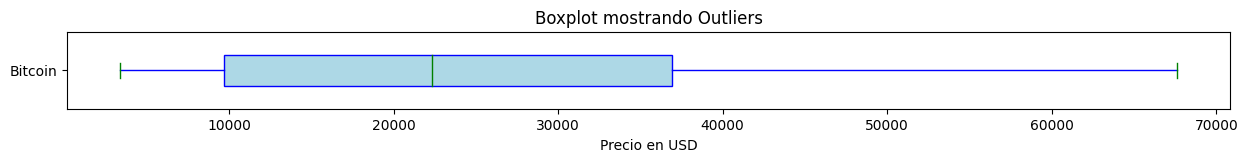


MÉTODO Z-SCORE: mide a cuantas desviaciones estándar se encuentra un dato de la media. Un z-score alto es cuando el dato se 
encuentra a más de 3 desviaciones estándars de la media.

Según Z-SCORE, no tenemos puntos aislados en la variable price.


In [19]:
outliers('price')

#### Variable "market_cap".

MÉTODO IQR: Es el rango intercuartílico, que representa la diferencia entre el cuartil 3 y el cuartil 2. Los puntos que están fuera del 
rango de 1.5 veces el IQR por encima del cuartil 3 o por debajo del cuartil 1, se consideran datos atípicos.

Según IQR, no tenemos puntos aislados en la variable market_cap.

Estos puntos se pueden observar en el siguiente gráfico de Caja y Bigotes gracias a las burbujas de color rojo. Si las burbujas rojas no están 
presentes en el gráfico, es porque no existen puntos atípicos.



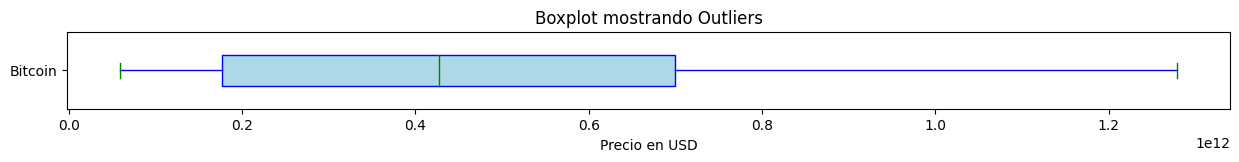


MÉTODO Z-SCORE: mide a cuantas desviaciones estándar se encuentra un dato de la media. Un z-score alto es cuando el dato se 
encuentra a más de 3 desviaciones estándars de la media.

Según Z-SCORE, no tenemos puntos aislados en la variable market_cap.


In [20]:
outliers("market_cap")

#### Variable "total_volume".

MÉTODO IQR: Es el rango intercuartílico, que representa la diferencia entre el cuartil 3 y el cuartil 2. Los puntos que están fuera del 
rango de 1.5 veces el IQR por encima del cuartil 3 o por debajo del cuartil 1, se consideran datos atípicos.

Según IQR, tenemos 81 puntos aislados en la variable total_volume.

Estos puntos se pueden observar en el siguiente gráfico de Caja y Bigotes gracias a las burbujas de color rojo. Si las burbujas rojas no están 
presentes en el gráfico, es porque no existen puntos atípicos.



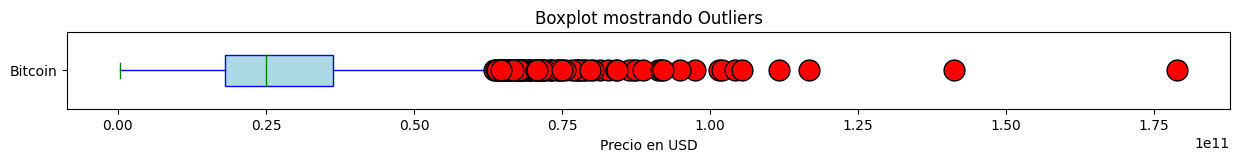


MÉTODO Z-SCORE: mide a cuantas desviaciones estándar se encuentra un dato de la media. Un z-score alto es cuando el dato se 
encuentra a más de 3 desviaciones estándars de la media.

Según Z-SCORE, tenemos 22 puntos aislados en la variable total_volume.


In [21]:
outliers('total_volume')

Conclusiones:

1.- En cuanto a las variables price y merkat_cap, realizaremos conclusiones sobre los siguientes puntos:

Estabilidad Relativa: Aunque las criptomonedas son conocidas por su volatilidad, la falta de outliers significativos indica que no hubo movimientos de precios o cambios en la capitalización de mercado extremadamente inusuales o inesperados durante ese período.

Consistencia del Mercado: Los precios y la capitalización de mercado han mostrado una consistencia, sin eventos extremos que hayan causado picos o caídas abruptas en los valores.

Distribución de Datos: Puede implicar que la distribución de los datos de precios y capitalización de mercado es menos sesgada y más simétrica, especialmente si el análisis de Z-Score no muestra outliers. Esto podría indicar que los datos siguen una distribución que se asemeja a la normal, sin colas pesadas que podrían indicar riesgos extremos.

Modelos Predictivos: Para los modelos de aprendizaje automático, la ausencia de outliers podría simplificar la modelación, ya que los modelos pueden no necesitar ser robustos ante valores atípicos extremos.

2.- Sobre la variable total_volume podemos concluir varios aspectos diferentes:

Volatilidad en el Volumen de Transacciones: La presencia de valores atípicos en 'total_volume' indica episodios de volatilidad en el volumen de transacciones. Estos pueden ser días con actividad de mercado muy alta en comparación con el promedio.

Eventos del Mercado: Los outliers podrían correlacionarse con eventos específicos en el mercado o en el mundo real que afectaron el volumen de transacciones de Bitcoin, como anuncios regulatorios, decisiones de grandes inversores, o movimientos de mercado significativos.

Diferencias en la Identificación de Outliers: La discrepancia entre el número de outliers detectados por IQR y Z-Score puede indicar que la distribución de 'total_volume' tiene colas pesadas o que la distribución no es simétrica. Esto es común en datos financieros, donde la presencia de valores extremos puede ser más común y no necesariamente indicativa de un comportamiento anómalo.

Consideraciones Analíticas: Para análisis futuros, especialmente si estos están destinados a predecir el volumen de transacciones, es crucial considerar la presencia de estos valores atípicos. Los modelos de predicción pueden necesitar ser robustos frente a tales valores o, alternativamente, los datos pueden necesitar ser preprocesados para manejar los outliers de manera adecuada.

Potencial de Datos Atípicos: Los valores atípicos no siempre son erróneos o indeseables; a veces pueden proporcionar información valiosa sobre el comportamiento del mercado y deberían ser estudiados en detalle antes de tomar la decisión de excluirlos del análisis por su importancia para alimentar a los modelos de aprendizaje automático, para que aprendan de las anomalías y descubran patrones o relaciones valiosas.

## 2.3 Análisis Univariable.

### 2.3.1 Función para aplicar el análisis univariable a cada variable.

In [22]:
def analisis_univariable(metrica):

  # Medidas de tendencia central

  if np.mean(df[metrica]) >= 1000000000:
    moneda = 'B'
    # Transformar la variable de dólares a billones de dólares
    df[metrica] = df[metrica].apply(lambda x: round(x/1000000000,1))

    mean = round(df.describe().loc['mean',metrica],1)
    std = round(df.describe().loc['std',metrica],1)
    min = round(df.describe().loc['min',metrica],1)
    max = round(df.describe().loc['max',metrica],1)

    print(f'Se puede observar que el promedio de la variable {metrica} de {criptomoneda.capitalize()} de los últimos {days} días, es de {mean}{moneda} de dólares.')
    print(f'La desviación estándar es de {std}{moneda}, lo que significa que la fluctuación promedio está entre {round(mean - std,1)}{moneda} y {round(mean + std,1)}{moneda} de dólares.')
    print(f'El valor mínimo del periodo es de {min}{moneda} de dólares y el máximo es de {max}{moneda} de dólares.')

  elif np.mean(df[metrica]) >= 1000000:
    moneda = 'M'
    # Transformamos la variable de dólares a millones de dólares
    df[metrica] = df[metrica].apply(lambda x: round(x/1000000,1))

    mean = round(df.describe().loc['mean',metrica],1)
    std = round(df.describe().loc['std',metrica],1)
    min = round(df.describe().loc['min',metrica],1)
    max = round(df.describe().loc['max',metrica],1)

    print(f'Se puede observar que el promedio de la variable {metrica} de {criptomoneda.capitalize()} de los últimos {days} días, es de {mean}{moneda} de dólares.')
    print(f'La desviación estándar es de {std}{moneda}, lo que significa que la fluctuación promedio está entre {round(mean - std,1)}{moneda} y {round(mean + std,1)}{moneda} de dólares.')
    print(f'El valor mínimo del periodo es de {min}{moneda} de dólares y el máximo es de {max}{moneda} de dólares.')

  elif np.mean(df[metrica]) >= 1000:
    moneda = 'K'
    # Transformamos la variable de dólares a miles de dólares
    df[metrica] = df[metrica].apply(lambda x: round(x/1000,1))

    mean = round(df.describe().loc['mean',metrica],1)
    std = round(df.describe().loc['std',metrica],1)
    min = round(df.describe().loc['min',metrica],1)
    max = round(df.describe().loc['max',metrica],1)

    print(f'Se puede observar que el promedio de la variable {metrica} de {criptomoneda.capitalize()} de los últimos {days} días, es de {mean}{moneda} dólares.')
    print(f'La desviación estándar es de {std}{moneda}, lo que significa que la fluctuación promedio está entre {round(mean - std,1)}{moneda} y {round(mean + std,1)}{moneda} dólares.')
    print(f'El valor mínimo del periodo es de {min}{moneda} dólares y el máximo es de {max}{moneda} dólares.')


  else:
    # Mantener la variable en dólares
    mean = round(df.describe().loc['mean',metrica],)
    std = round(df.describe().loc['std',metrica],)
    min = round(df.describe().loc['min',metrica],)
    max = round(df.describe().loc['max',metrica],)

    print(f'Se puede observar que el promedio de la variable {metrica} de {criptomoneda.capitalize()} de los últimos {days} días, es de {mean} dólares.')
    print(f'La desviación estándar es de {std} dólares, lo que significa que la fluctuación promedio está entre {round(mean - std,1)} y {round(mean + std,1)} dólares.')
    print(f'El valor mínimo del periodo es de {min} dólares y el máximo es de {max} dólares.')

  # Crear coeficiente de variación
  coef_variacion = round(std * 100 / mean,)
  if coef_variacion <= 10:
    print(f'El coeficiente de variación es de un {coef_variacion}%. Este valor indica homogeneidad, es decir, que los datos son muy consistentes con el promedio.')
  elif coef_variacion >= 20:
    print(f'El coeficiente de variación es de un {coef_variacion}%. Este valor indica heterogeneidad, es decir, que los datos no son consistentes con el promedio.')
  else:
    print(f'El coeficiente de variación es de un {coef_variacion}%. Este valor no indica precisamente homogeneidad o heterogeneidad, es decir, no es posible \nafirmar o negar la consistencia de los datos con el promedio.')

  print()


  # ----------------------------------------------------------------------------------------------------------------------------------
  # histograma:
  plt.figure(figsize=(15, 5))
  plt.hist(df[metrica], bins=30, color='lightblue', edgecolor='blue')
  plt.title(f'Frecuencia Absoluta de la Variable {metrica.capitalize()} de {criptomoneda.capitalize()} en los Últimos {days} Días')
  # condicicional para la etiqueta x del gráfico
  if moneda == 'B':
    plt.xlabel(f'Valor en Billones de Dólares')
  elif moneda == 'M':
    plt.xlabel(f'Valor en Millones de Dólares')
  elif moneda == 'K':
    plt.xlabel(f'Valor en Miles de Dólares')
  else:
    plt.xlabel(f'Valor Dólares')
  plt.ylabel('Frecuencia')
  plt.show()

  # ---------------------------------------------------------------------------------------------------------------------------------------
  # kernel density gráfico de densidad
  plt.figure(figsize=(15, 5))
  sns.kdeplot(df[metrica], shade=True, color="skyblue")
  plt.title(f'Gráfico de Densidad de la Variable {metrica.capitalize()} de {criptomoneda.capitalize()} en los Últimos {days} Días')
  # condicicional para la etiqueta x del gráfico
  if moneda == 'B':
    plt.xlabel(f'Valor en Billones de Dólares')
  elif moneda == 'M':
    plt.xlabel(f'Valor en Millones de Dólares')
  elif moneda == 'K':
    plt.xlabel(f'Valor en Miles de Dólares')
  else:
    plt.xlabel(f'Valor Dólares')
  plt.ylabel('Densidad')
  plt.grid(True, linestyle='--', linewidth=0.5)
  plt.show()

  # ---------------------------------------------------------------------------------------------------------------------------------------
  # Diagrama de caja y bigotes: muestra las medidas de posición Q1, Q2 y Q3, necesarias para ver la concentración de datos a lo largo del rango.

  Q1 = df[metrica].quantile(0.25)
  Q2 = df[metrica].quantile(0.5)
  Q3 = df[metrica].quantile(0.75)

  plt.figure(figsize=(15, 1))
  plt.boxplot(df[metrica], vert=False, patch_artist=True,
              boxprops=dict(facecolor='lightblue', color='blue'),
              whiskerprops=dict(color='blue'),
              capprops=dict(color='green'),
              medianprops=dict(color='green'),
              flierprops=dict(marker='o', markerfacecolor='red', markeredgecolor= 'black', markersize=15),
              widths=0.4)
  plt.title(f'Concentración de la Variable {metrica.capitalize()} de {criptomoneda.capitalize()} en los Últimos {days} Días')
  # condicicional para la etiqueta x del gráfico
  if moneda == 'B':
    plt.xlabel(f'Valor en Billones de Dólares')
  elif moneda == 'M':
    plt.xlabel(f'Valor en Millones de Dólares')
  elif moneda == 'K':
    plt.xlabel(f'Valor en Miles de Dólares')
  else:
    plt.xlabel(f'Valor Dólares')
  plt.yticks([1], [criptomoneda.capitalize()])
  plt.show()

  print()

  if Q2 - Q1 < Q3 - Q2:
    print('Observación: \nLa mediana, línea verde dentro de la caja, está más cerca del borde inferior de ésta. Esto indica que una mayor proporción \nde los datos se agrupa en el extremo inferior del rango de precios. Esto puede sugerir que, aunque hubo picos de precios más altos, \nla mayoría de las transacciones se realizaron a precios más bajos, lo que podría interpretarse como una tendencia bajista o \nuna acumulación de valor a niveles inferiores.')
  elif Q2 - Q1 > Q3 - Q2:
    print('Observación: \nLa mediana, línea verde dentro de la caja, está más cerca del borde superior de ésta. Esto indica que una mayor proporción de \nlos datos se agrupa en el extremo superior del rango de precios. Esto puede sugerir que, aunque hubo caídas en los precios, la \nmayoría de las transacciones se realizaron a precios más altos, lo que podría ser señal de una tendencia alcista o una disposición \ndel mercado a pagar más por la criptomoneda.')
  else:
    print('Observación: \nLa mediana (línea verde dentro de la caja) está centrada entre el primer y tercer cuartil (Q1 y Q3). Esto sugiere que la distribución de precios durante el periodo analizado es bastante simétrica. En términos de precios de criptomonedas, esto podría significar que no hay una tendencia clara hacia precios más altos o más bajos y que los movimientos de precios alrededor de la mediana son relativamente estables y consistentes.')
  print()

  # ---------------------------------------------------------------------------------------------------------------------------------------
  # Gráfico de línea con media móvil y bandas de bollinger
  # media móvil simple
  sma = df[metrica].rolling(window=20).mean()  # window puede ajustarse según la necesidad

  # Bandas de Bollinger
  std = df[metrica].rolling(window=20).std()
  upper_band = sma + (std * 2)  # Banda superior
  lower_band = sma - (std * 2)  # Banda inferior

  # Crea un gráfico con la media móvil y las Bandas de Bollinger
  plt.figure(figsize=(30, 20))

  # Precio y Media Móvil
  plt.plot(df['timestamp'], df[metrica], color='blue', label=metrica.capitalize())
  plt.plot(df['timestamp'], sma, color='cyan', linestyle='-', label='SMA')
  plt.fill_between(df['timestamp'], upper_band, lower_band, color='lightblue', alpha=0.5, label='Bandas de Bollinger')
  plt.title(f'Gráfico Temporal de la Variable {metrica.capitalize()} de {criptomoneda.capitalize()} en los Últimos {days} Días.')
  plt.legend()
  # condicicional para la etiqueta x del gráfico
  if moneda == 'B':
    plt.xlabel(f'Valor en Billones de Dólares')
  elif moneda == 'M':
    plt.xlabel(f'Valor en Millones de Dólares')
  elif moneda == 'K':
    plt.xlabel(f'Valor en Miles de Dólares')
  else:
    plt.xlabel(f'Valor Dólares')

  plt.tight_layout()
  plt.show()

### 2.3.2 Análisis variable 'price'.

Se puede observar que el promedio de la variable price de Bitcoin de los últimos 1825 días, es de 24.7K dólares.
La desviación estándar es de 16.1K, lo que significa que la fluctuación promedio está entre 8.6K y 40.8K dólares.
El valor mínimo del periodo es de 3.4K dólares y el máximo es de 67.6K dólares.
El coeficiente de variación es de un 65%. Este valor indica heterogeneidad, es decir, que los datos no son consistentes con el promedio.



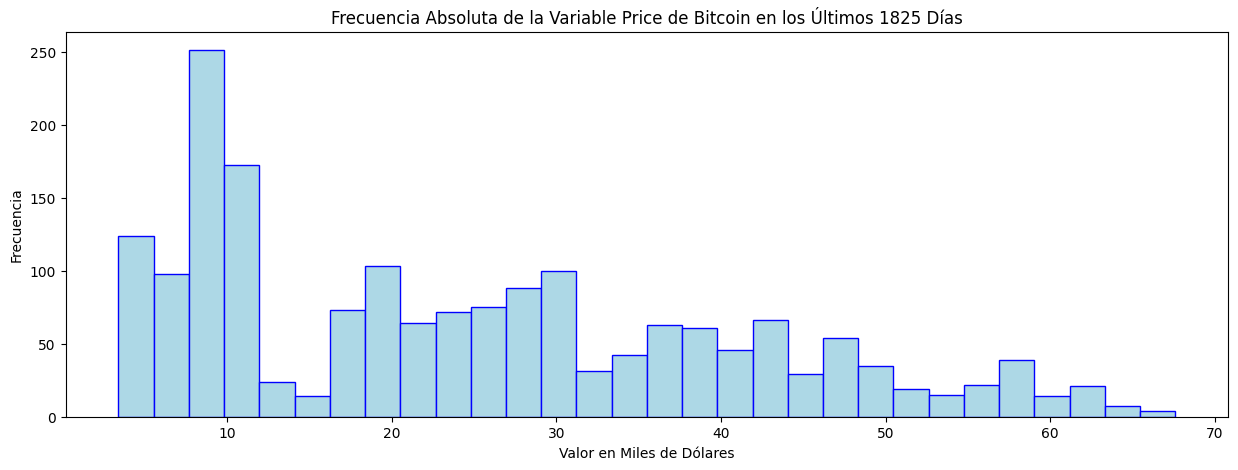

<ipython-input-22-25ae16184cbd>:91: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[metrica], shade=True, color="skyblue")


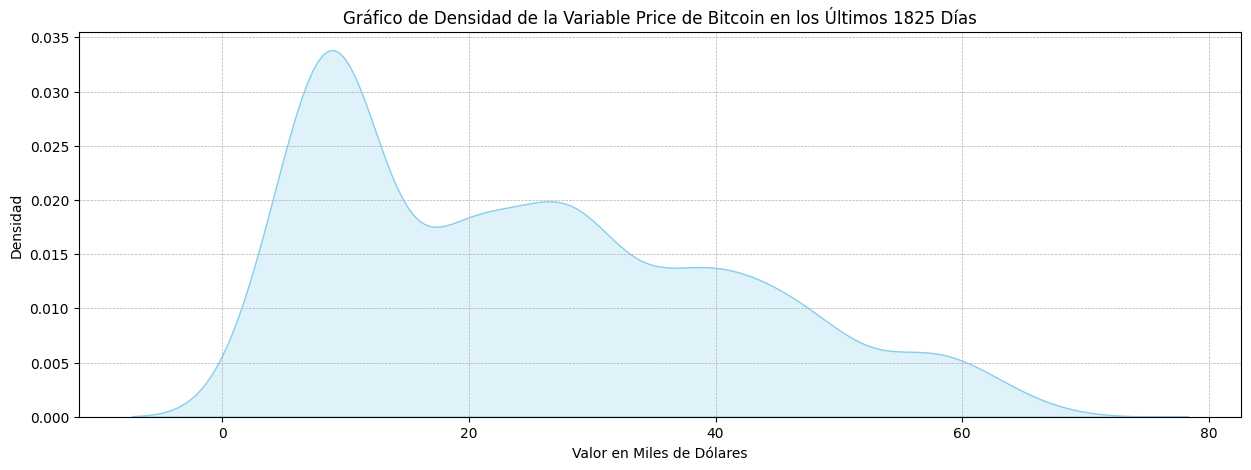

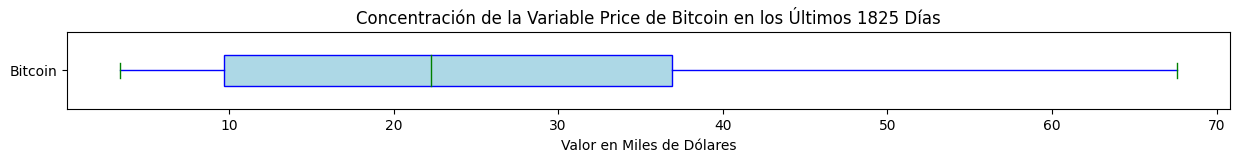


Observación: 
La mediana, línea verde dentro de la caja, está más cerca del borde inferior de ésta. Esto indica que una mayor proporción 
de los datos se agrupa en el extremo inferior del rango de precios. Esto puede sugerir que, aunque hubo picos de precios más altos, 
la mayoría de las transacciones se realizaron a precios más bajos, lo que podría interpretarse como una tendencia bajista o 
una acumulación de valor a niveles inferiores.



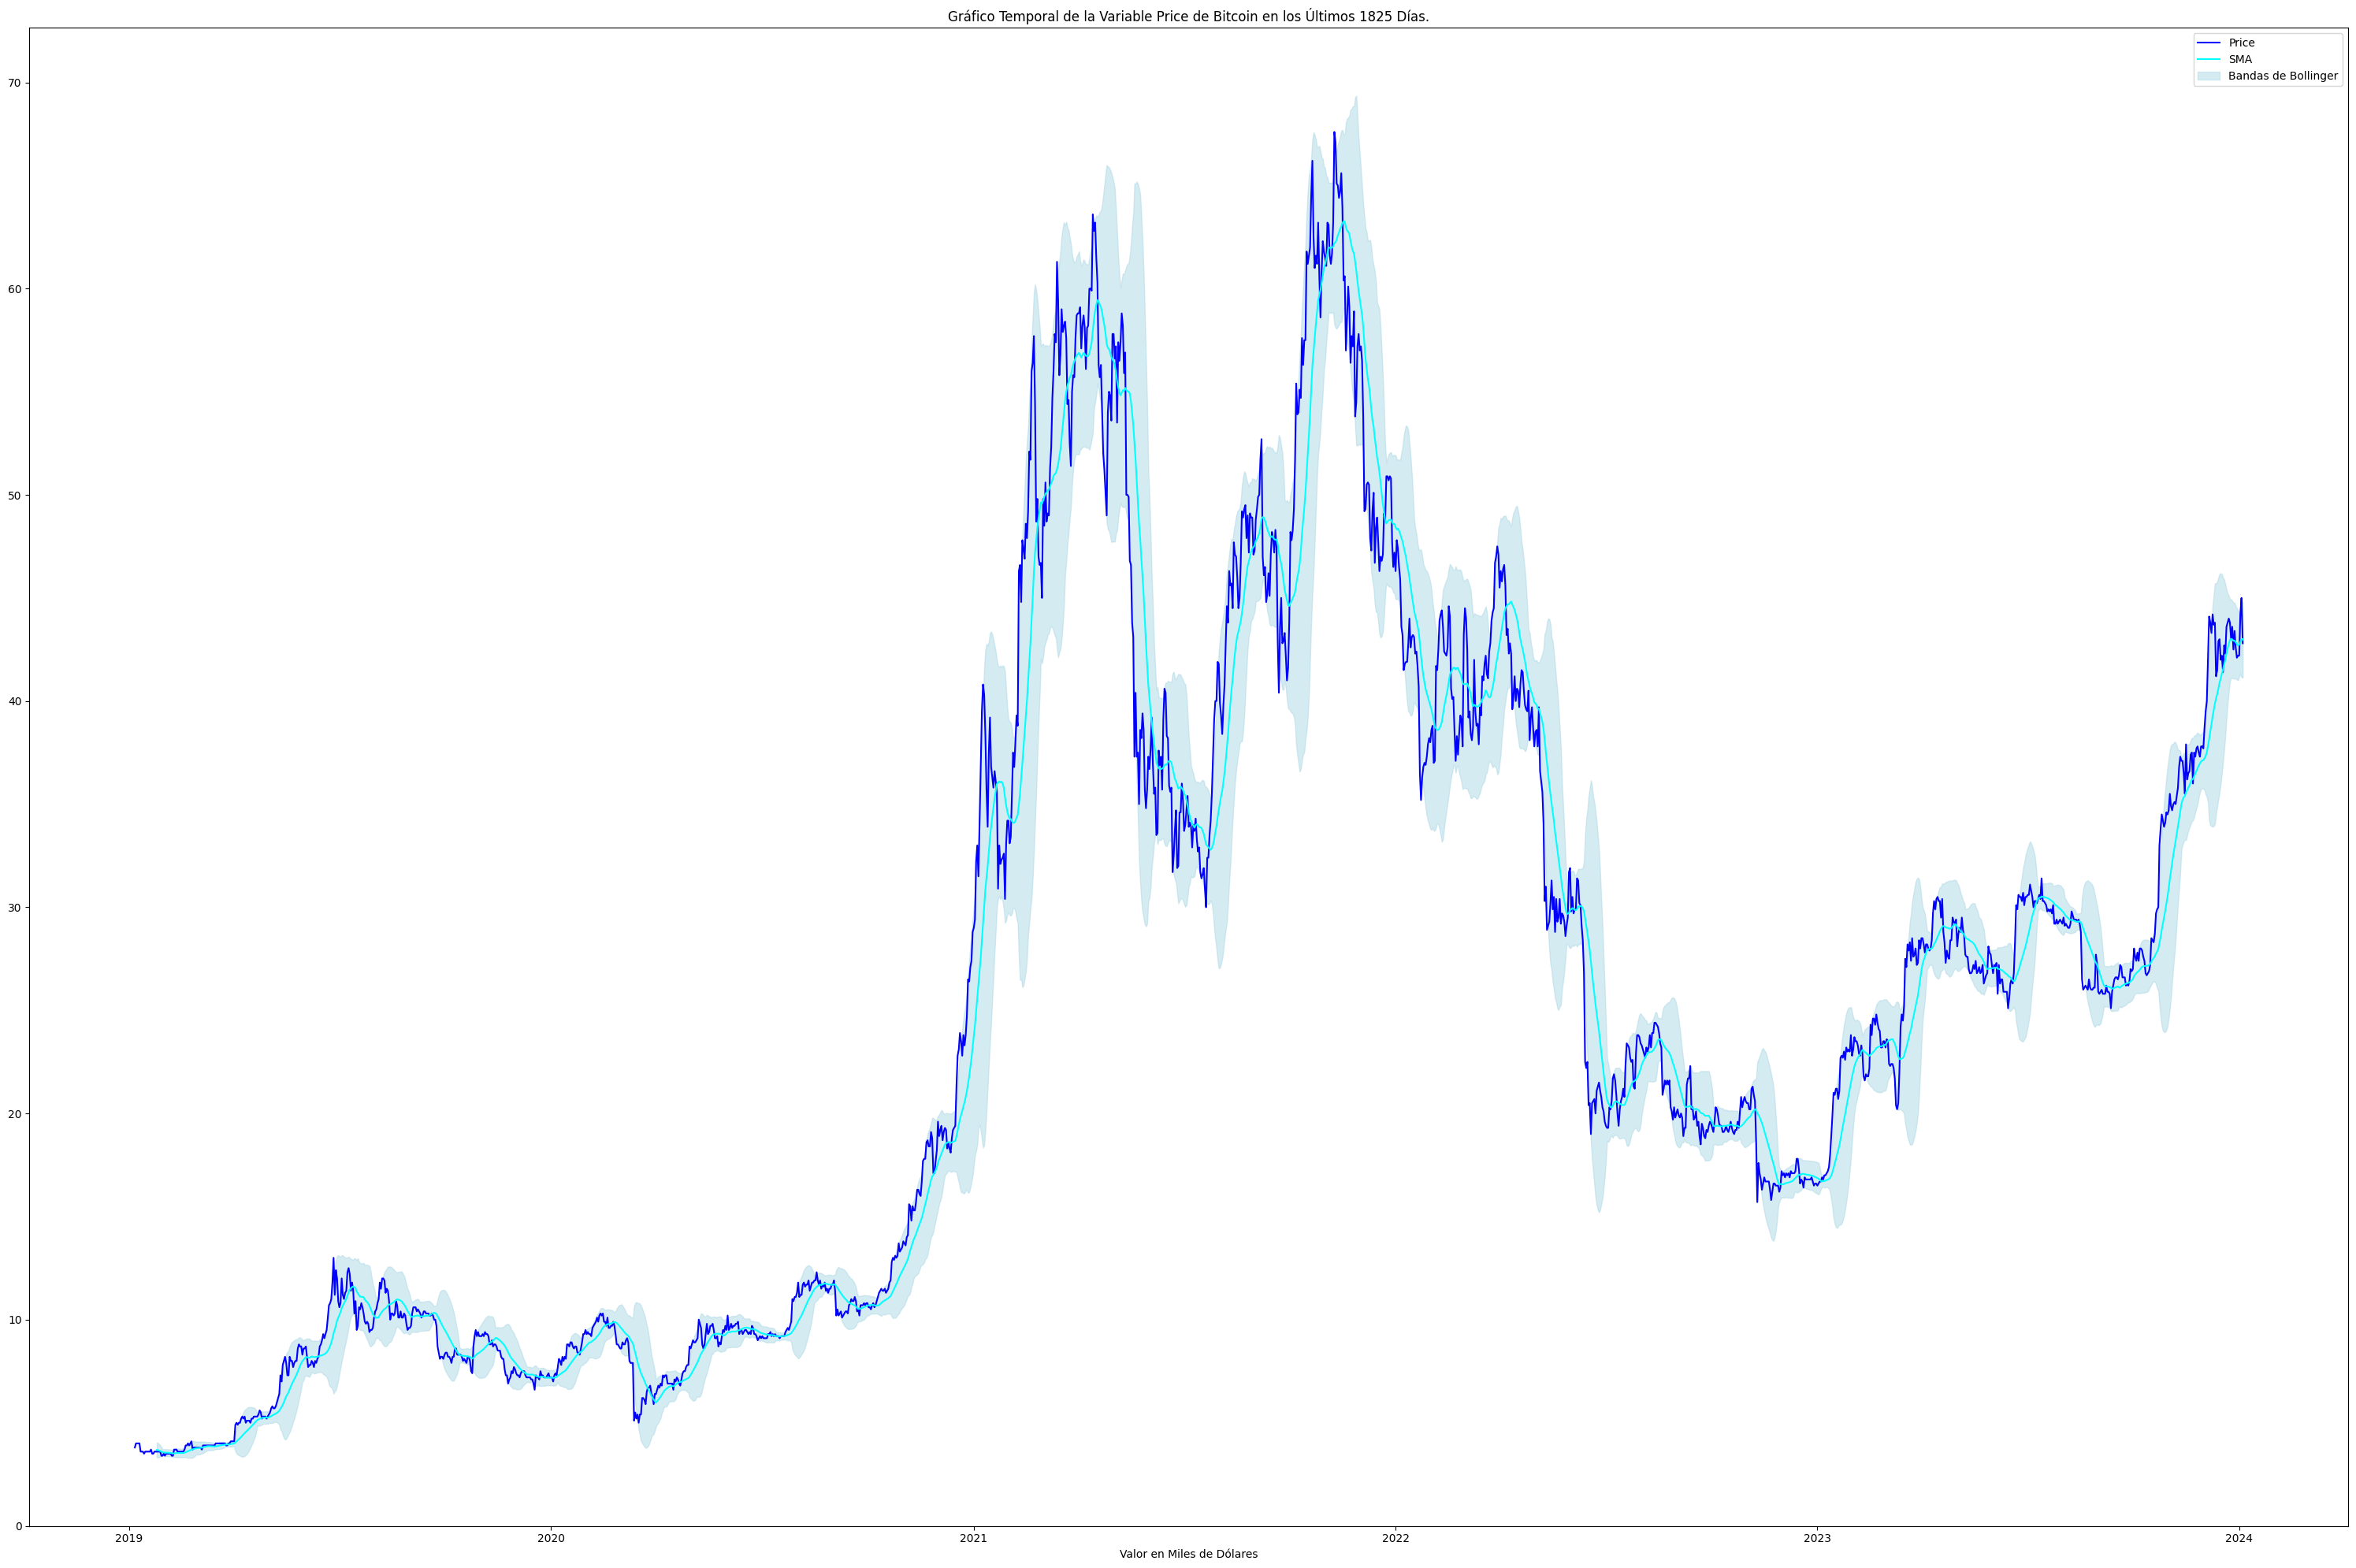

In [23]:
analisis_univariable('price')

***MEDIDAS DE TENDENCIA CENTRAL, DE DISPERSIÓN Y POSICIÓN***

El precio de Bitcoin ha sido altamente volátil en los últimos 5 años, con un promedio de 24.7K USD y una amplia variación de precios, lo que se refleja en una desviación estándar de 16.1K USD y un coeficiente de variación del 65%, indicando una inconsistencia significativa alrededor del promedio.

***HISTOGRAMA***

Rango de Precios Más Común: La mayor frecuencia de precios parece estar en el rango de 10 mil a 20 mil dólares, lo que indica que, durante los últimos 5 años, el precio de Bitcoin ha caído más comúnmente dentro de este rango.

Distribución de Frecuencias: La distribución no es uniforme y muestra varios rangos de precios con diferentes niveles de frecuencia, lo que sugiere que el precio de Bitcoin ha fluctuado significativamente a lo largo del período analizado.

Precios Menos Frecuentes en los Extremos: Los precios en los extremos superiores e inferiores del rango, cerca de 0-5 mil y 60-70 mil dólares, son menos frecuentes, lo que indica que los precios raramente cayeron en estos rangos.

Volatilidad: El histograma refleja la volatilidad en el precio de Bitcoin, con un amplio rango de precios a través del cual se ha movido en los últimos 5 años.

Distribución Asimétrica: La distribución parece ser asimétrica, con una cola más larga hacia la derecha, lo que puede indicar un sesgo positivo en el precio de Bitcoin a lo largo del tiempo.

Ausencia de Distribución Normal: El gráfico no muestra una distribución normal; las frecuencias no forman una campana de gauss.

Estos últimos dos puntos nos indican que:

Precios Bajos Más Frecuentes: Hubo más ocasiones en las que los precios estuvieron en el extremo inferior del rango que en el extremo superior.

Potencial de Crecimiento: El sesgo positivo puede indicar que ha habido un impulso o tendencia al alza en el precio de Bitcoin durante el período observado.

Volatilidad y Retornos: Una distribución con un sesgo positivo podría reflejar períodos de alta volatilidad con posibilidad de altos retornos, pero también con riesgos asociados.

***GRÁFICO DE DENSIDAD***

El gráfico de densidad representa cómo se distribuyen los precios de Bitcoin a lo largo de los últimos 5 años, mostrando la probabilidad de que ocurran en diferentes rangos de precios. Se observa un pico prominente, lo que indica que la mayoría de los precios se concentraron alrededor de ese valor, probablemente en el rango de 5 a 20 mil dólares. La cola derecha alargada sugiere que también hubo precios significativamente más altos, aunque con menor frecuencia. La forma del gráfico indica volatilidad y una distribución de precios con sesgo positivo en el mercado de Bitcoin durante este periodo que afirman los datos obtenidos del histograma.

***DIAGRAMA DE CAJA Y BIGOTES***

Asimetría de la Distribución: La longitud de los 'bigotes' y la posición de la caja pueden sugerir una distribución asimétrica de los precios. Por ejemplo, si el 'bigote' superior es significativamente más largo que el inferior, esto indicaría que hay una tendencia hacia fluctuaciones de precios más extremas en el alza que en la baja, sin embargo, la mediana se encuentra más cerca de Q1 que Q2, lo que significaría que en este periodo, la mayoría de las transacciones se realizaron a precios más bajos, lo que podría interpretarse como una tendencia bajista.

Periodos de Estabilidad versus Volatilidad: La anchura de la caja central representa el rango intercuartílico (IQR), que es donde reside la mitad media de los datos. La caja más estrecha indicaría un período de relativa estabilidad en los precios de Bitcoin, de hecho, si se observa, los 3 primeros sectores juntos tienen igual medida que el último, lo que respalda esta observación e indicaría también, que los extremos superiores comienzan a tomar fuerza.


***GRAFICO TEMPORAL***

El patrón general del gráfico temporal, muestra fluctuaciones con picos y caídas, lo que sugiere una variabilidad significativa en el tiempo, además de una gran alza a inicios de 2021 y una caída estrepitosa a finales del mismo año, hasta inicios de 2023. El gráfico general también muestra periodos de tendencias alcistas, bajistas y mucha volatilidad.

Sin embargo, en el último año, se muestra una tendencia alcista, con una media móvil y bandas de Bollinger moviéndose hacia arriba. También se presentan picos que sobrepasan las bandas de Bollinger, lo que indica que probablemente continue la tendencia alcista.

También se observa desde septiembre de 2023, que los valores del bitcoin casi siempre se mantienen sobre la media móvil, y, además, nos encontramos próximos a cerrar un triángulo, lo que indicaría un periodo alcista al cerrarse este. Se puede observar, que con este, ya se han cerrado 3 triángulos desde octubre, y el de este mes, podría ser uno grande. No hay cabezas y hombros notables, aunque si uno invertido en los últimos días, que sugiere una reversión de una tendencia bajista, exactamente igual que en el gráfico.

Sin embargo, el promedio del volumen de los últimos 7 días, no acompaña el peso de estas afirmaciones, ya que esta a 1.7 billones debajo de la media de los últimos 30 días. Si no hay más volumen de lo normal, podría sugerir una menor confianza o interés en la criptomoneda.

### 2.3.3 Análisis variable 'market_cap'.

Se puede observar que el promedio de la variable market_cap de Bitcoin de los últimos 1825 días, es de 466.7B de dólares.
La desviación estándar es de 306.0B, lo que significa que la fluctuación promedio está entre 160.7B y 772.7B de dólares.
El valor mínimo del periodo es de 59.5B de dólares y el máximo es de 1278.8B de dólares.
El coeficiente de variación es de un 66%. Este valor indica heterogeneidad, es decir, que los datos no son consistentes con el promedio.



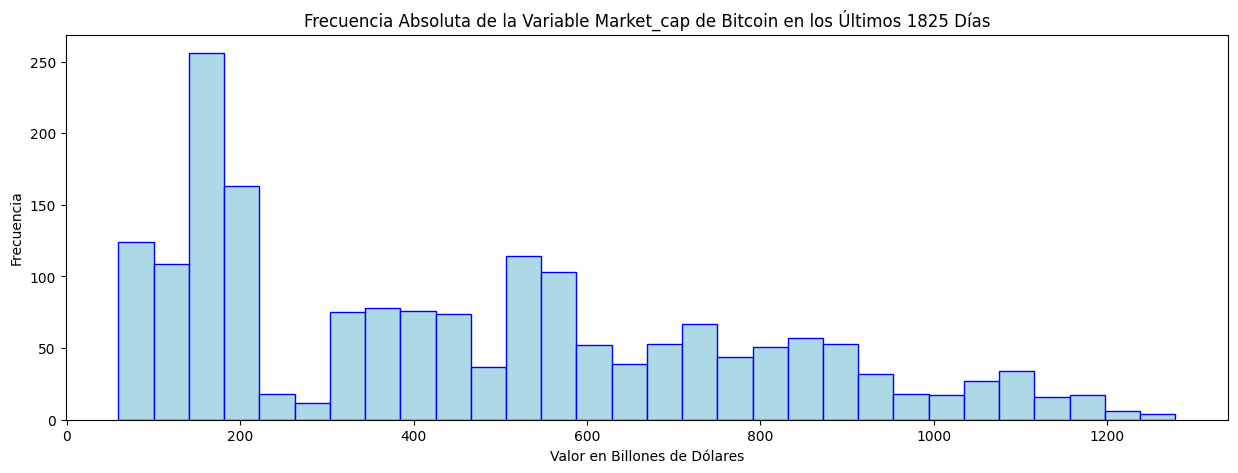

<ipython-input-22-25ae16184cbd>:91: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[metrica], shade=True, color="skyblue")


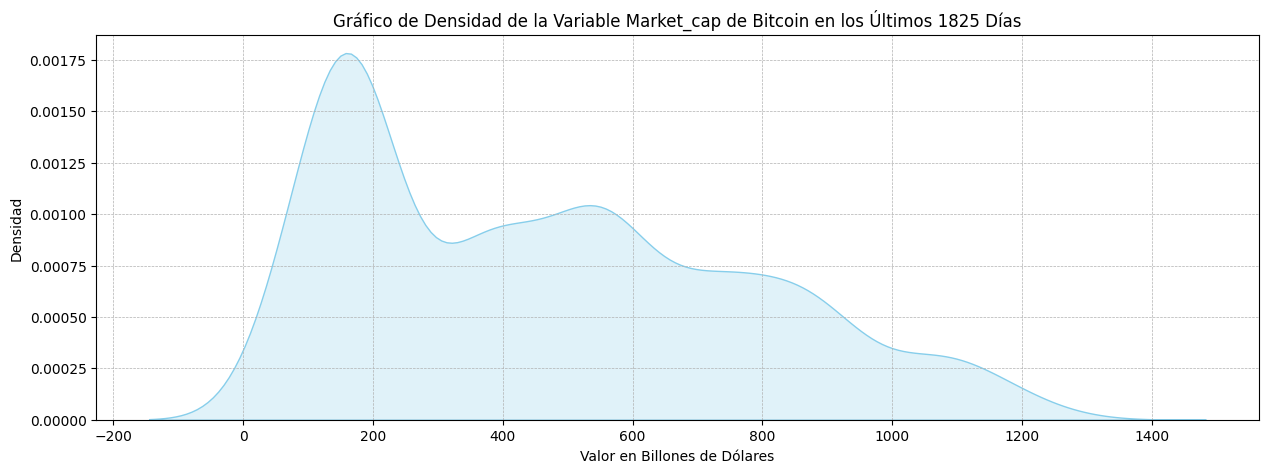

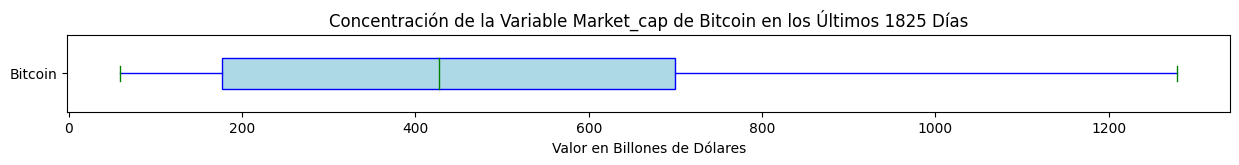


Observación: 
La mediana, línea verde dentro de la caja, está más cerca del borde inferior de ésta. Esto indica que una mayor proporción 
de los datos se agrupa en el extremo inferior del rango de precios. Esto puede sugerir que, aunque hubo picos de precios más altos, 
la mayoría de las transacciones se realizaron a precios más bajos, lo que podría interpretarse como una tendencia bajista o 
una acumulación de valor a niveles inferiores.



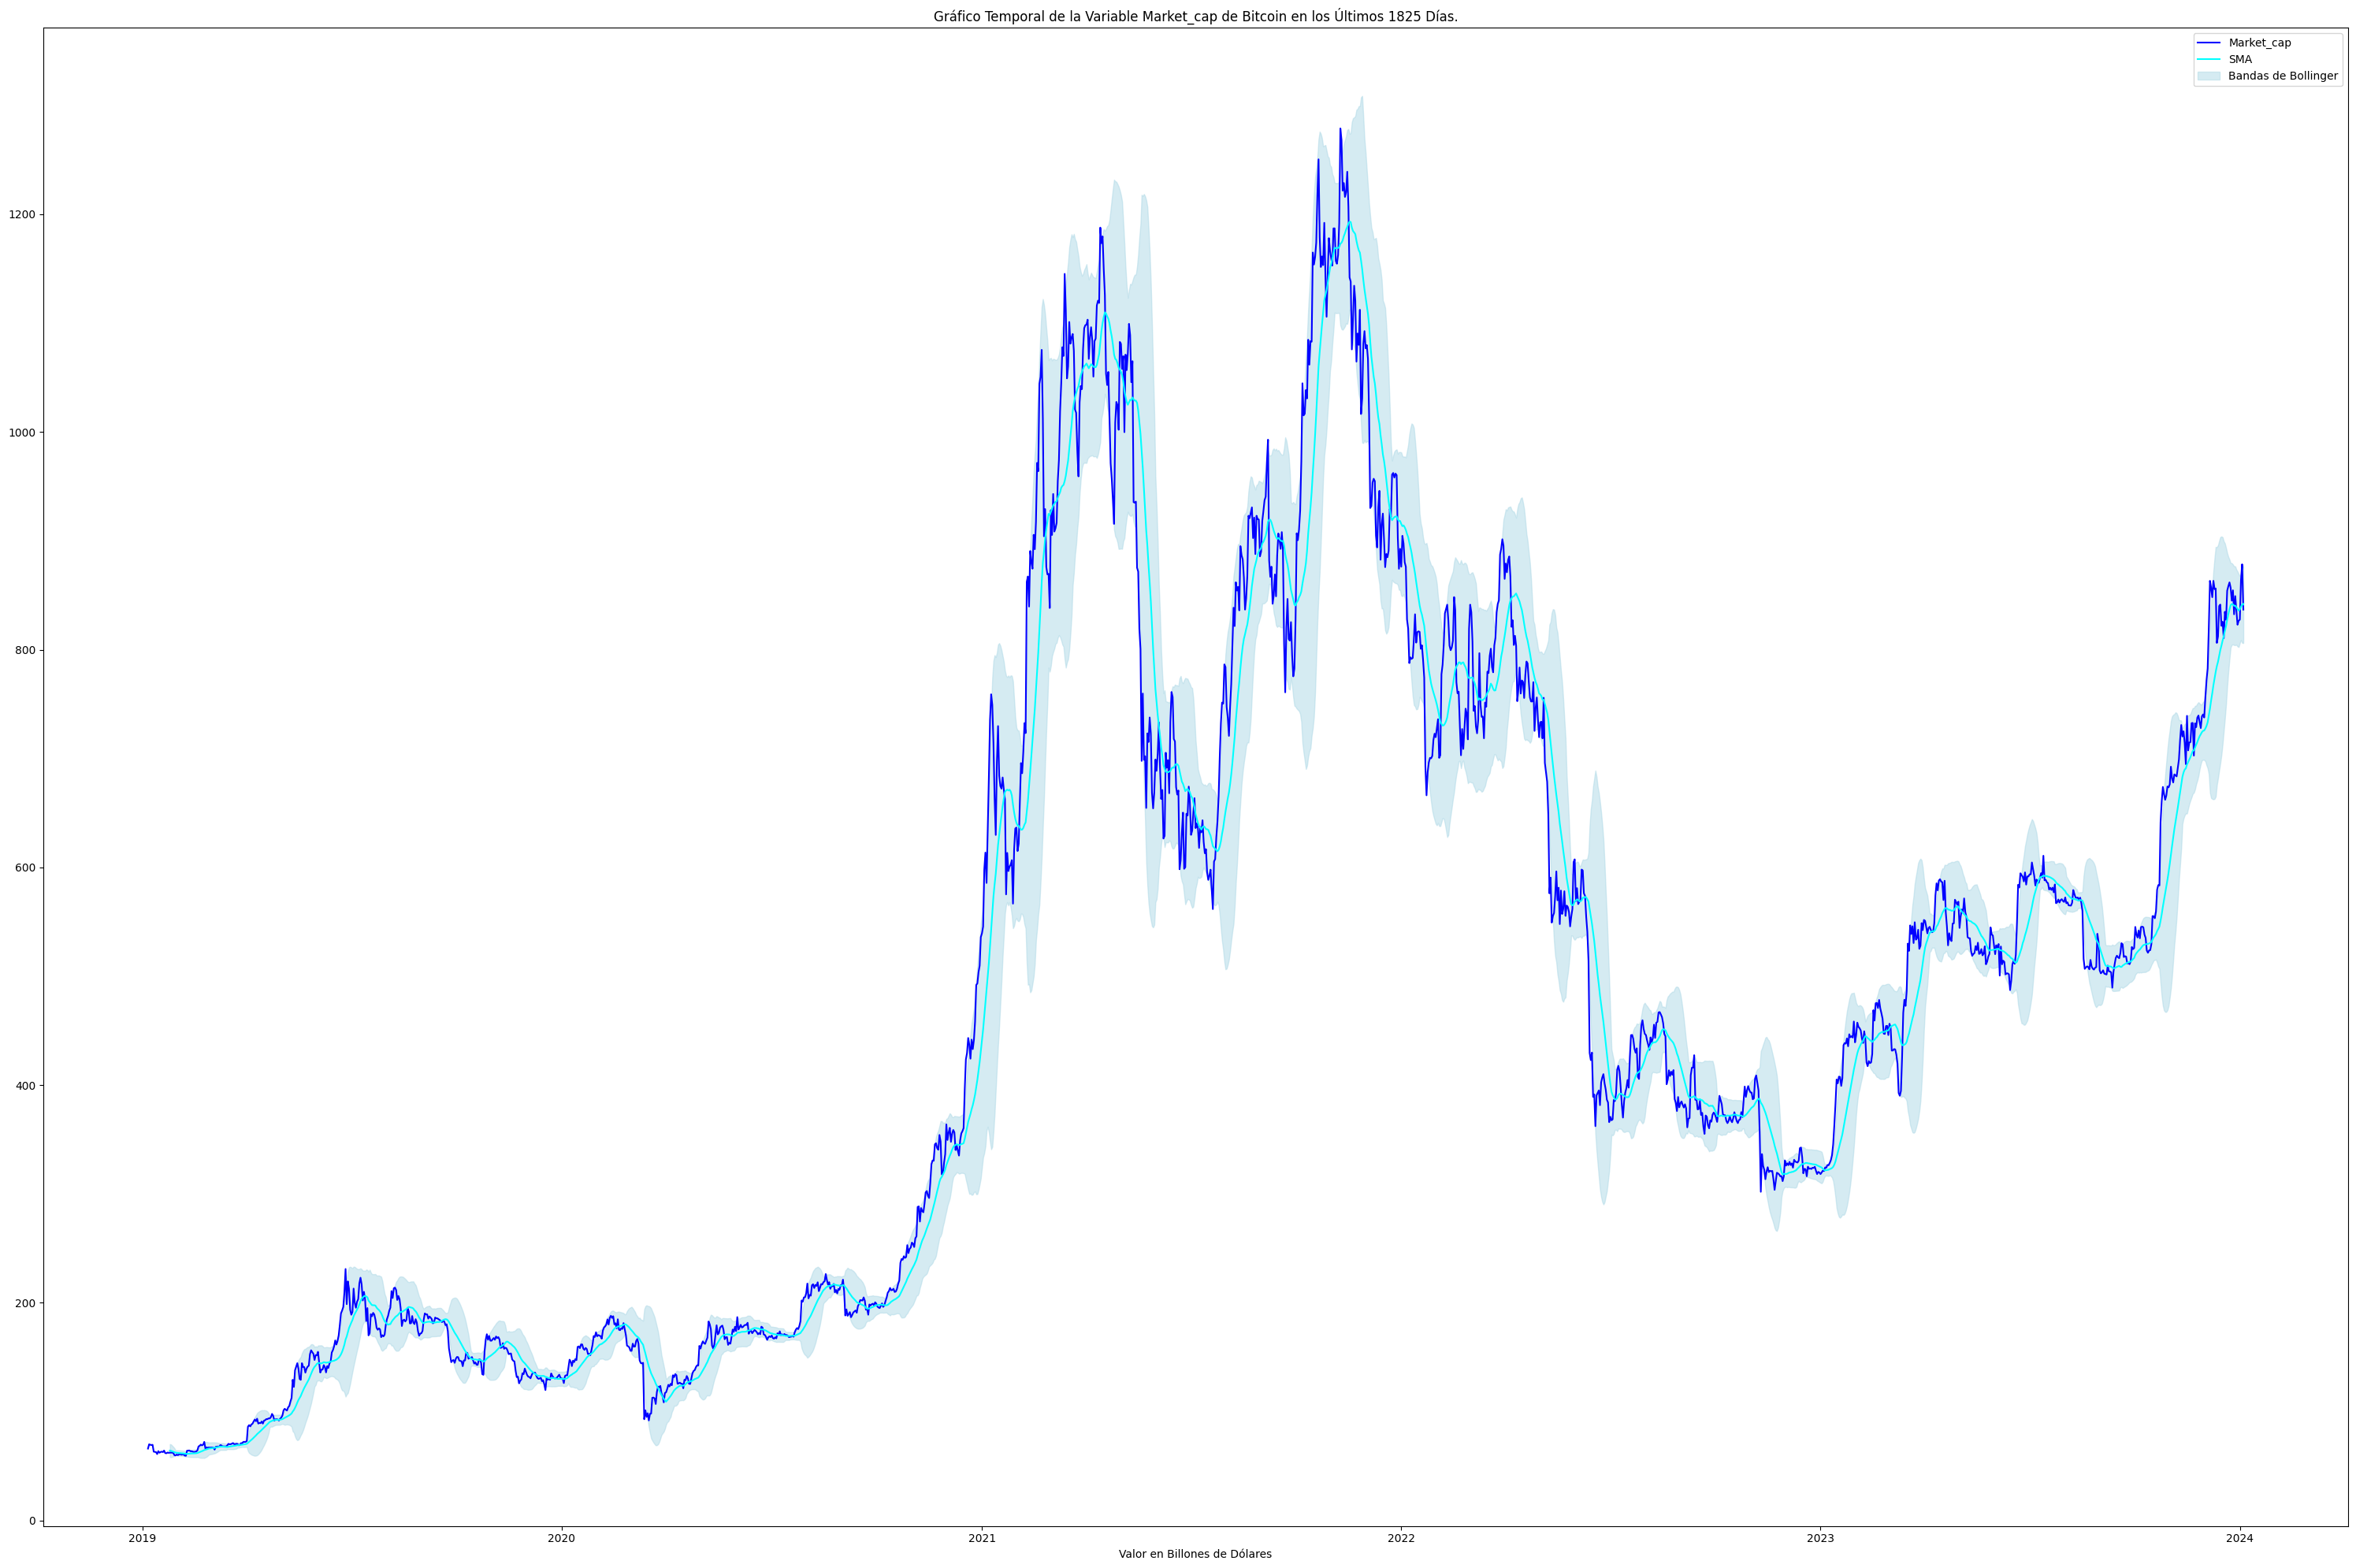

In [24]:
analisis_univariable('market_cap')

***MEDIDAS DE TENDENCIA CENTRAL, DE DISPERSIÓN Y POSICIÓN***

Significativa Variabilidad en la Capitalización de Mercado: La desviación estándar de 306.1B de dólares en relación con un promedio de capitalización de mercado de 466.3B de dólares indica una variabilidad considerable en la valoración de mercado de Bitcoin a lo largo de los años, reflejando la naturaleza dinámica y posiblemente especulativa del mercado de criptomonedas.

Amplitud en la Valoración de Mercado: La gran diferencia entre el valor mínimo y máximo de mercado de Bitcoin, que oscila entre 59.5B y 1278.8B de dólares, evidencia los extremos de valoración que ha alcanzado Bitcoin en un período de cinco años, destacando los ciclos de auge y caída que son característicos del activo.

Implicaciones para Estrategias de Inversión: Un coeficiente de variación del 66% revela una alta heterogeneidad en la capitalización de mercado de Bitcoin. Los inversores deberían tener en cuenta esta heterogeneidad al formular estrategias de inversión, ya que el uso del promedio como indicador único podría no reflejar adecuadamente el riesgo del mercado. Las estrategias deberían entonces considerar la posibilidad de cambios significativos en la valoración a corto plazo.

***HISTOGRAMA***

La mayoría de las observaciones se concentran en el rango inferior, con un pico prominente alrededor de 200 billones de dólares. La presencia de frecuencias significativas en rangos más altos sugiere que Bitcoin ha alcanzado y mantenido valores de mercado elevados varias veces. La distribución desciende progresivamente hacia rangos de capitalización más altos, lo que indica menos frecuencia en esos niveles. Para las predicciones, este patrón sugiere que, aunque Bitcoin puede alcanzar picos de mercado altos, es más común encontrarlo en un rango de capitalización de mercado más moderado. Esto puede ser relevante para estrategias de inversión que consideren la capitalización de mercado habitual y sus fluctuaciones históricas.

***GRÁFICO DE DENSIDAD***

Concentración de Capitalización de Mercado: La capitalización de mercado de Bitcoin ha tenido una concentración significativa alrededor de un rango específico, como lo indica el pico más alto del gráfico. Esto sugiere un valor en el que la capitalización de mercado se ha mantenido con más frecuencia.

Alcance de la Capitalización: Existe una cola larga hacia la derecha, lo que indica que ha habido periodos en los que la capitalización de mercado de Bitcoin alcanzó valores muy altos, aunque con menos frecuencia que el rango de concentración principal.

Posibles Tendencias de Crecimiento: La forma de la distribución y la cola a la derecha sugieren que Bitcoin ha experimentado tendencias de crecimiento que han llevado a aumentos en la capitalización de mercado a lo largo del tiempo, aunque estos periodos de alta valoración son menos comunes en comparación con el rango de concentración principal.

***DIAGRAMA DE CAJA Y BIGOTES***

Rango Principal de Capitalización: La caja central, que representa el rango intercuartílico (IQR), muestra que la mayor parte de la capitalización de mercado de Bitcoin se ha concentrado entre aproximadamente 50 y 700 billones de dólares. Esto indica que cualquier predicción de la capitalización de mercado debería considerar este rango como el más común o 'típico' durante el período observado.

Valores Extremos: La presencia de 'bigotes' que se extienden hasta más allá de los 1200 billones de dólares indica que ha habido valores extremos de capitalización de mercado. Sin embargo, estos son menos comunes. Las predicciones deben tener en cuenta la posibilidad de tales extremos, aunque pueden ser eventos relativamente raros.

Mediana de la Distribución: La línea dentro de la caja indica la mediana de los datos. En este caso, la mediana que no se encuentra en el centro exacto de la caja, lo que podría sugerir una ligera asimetría y concentración hacia los valores inferiores. Las predicciones podrían ajustarse para reflejar una mayor probabilidad de caída en estos rangos.


***GRAFICO TEMPORAL***

Tendencia Alcista General: A lo largo del tiempo, hay una tendencia alcista clara, donde el la capitalización de mercado sube, aunque con fluctuaciones intermedias.

Volatilidad: Las bandas de bollinger, muestran periodos de volatilidad variable. Estos periodos podrían corresponder a eventos específicos del mercado o a cambios en la percepción de los inversores.

Picos y Valles: Hay varios picos y valles a lo largo del gráfico, lo que indica periodos de rápida apreciación de la capitalización de mercado, seguidos de correcciones o caídas. Estos patrones podrían ser útiles para identificar posibles puntos de entrada y salida para estrategias de trading a corto plazo.

Tendencia Alcista: La capitalización de mercado, siguiendo la media móvil, muestra una tendencia alcista clara. La media móvil actúa como un indicador de la tendencia general del mercado, que en este caso es hacia arriba.

Volatilidad: Las bandas de Bollinger se ensanchan significativamente hacia el extremo derecho del gráfico, lo que indica un aumento en la volatilidad. En los mercados financieros, un aumento de la volatilidad puede coincidir con periodos de incertidumbre o de cambios rápidos en el precio.

Potencial de Continuación de la Tendencia: Si el precio está tocando o cruzando la banda superior de Bollinger, esto podría ser interpretado como un mercado potencialmente sobrecomprado, lo que a veces presagia una corrección de precios. Sin embargo, en una tendencia fuertemente alcista, el precio probablemente subirá y se mantendrá en la banda superior durante algún tiempo.

### 2.3.4  Análisis variable 'total_volume'.

Se puede observar que el promedio de la variable total_volume de Bitcoin de los últimos 1825 días, es de 28.9B de dólares.
La desviación estándar es de 17.1B, lo que significa que la fluctuación promedio está entre 11.8B y 46.0B de dólares.
El valor mínimo del periodo es de 0.4B de dólares y el máximo es de 178.9B de dólares.
El coeficiente de variación es de un 59%. Este valor indica heterogeneidad, es decir, que los datos no son consistentes con el promedio.



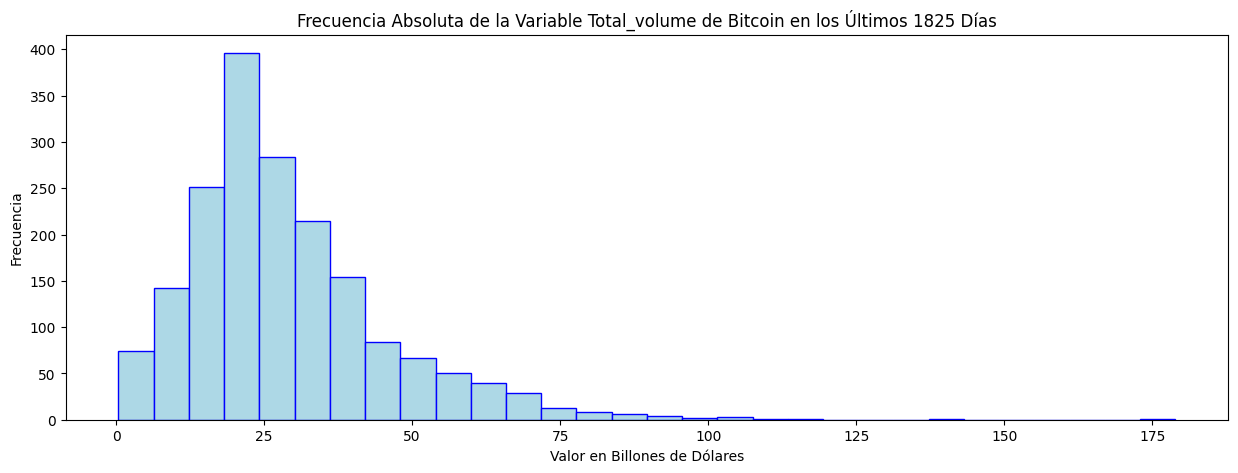

<ipython-input-22-25ae16184cbd>:91: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[metrica], shade=True, color="skyblue")


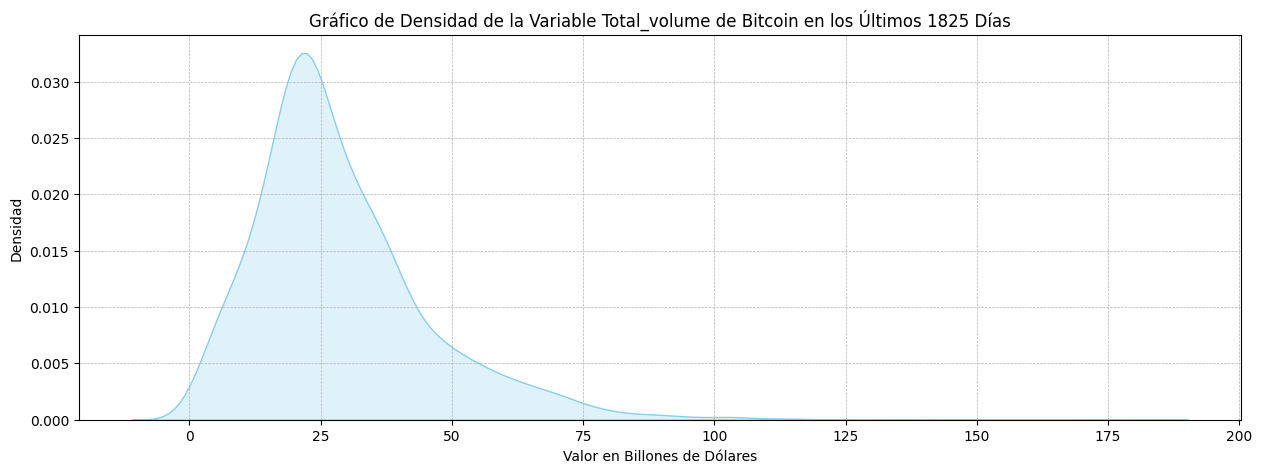

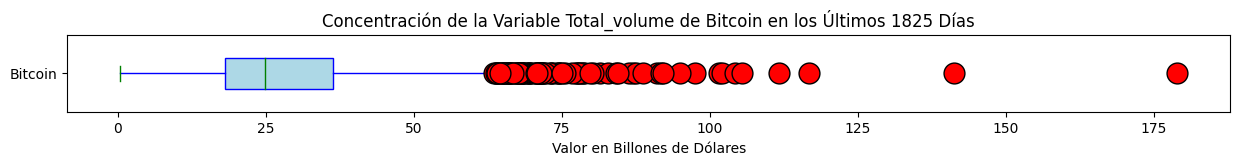


Observación: 
La mediana, línea verde dentro de la caja, está más cerca del borde inferior de ésta. Esto indica que una mayor proporción 
de los datos se agrupa en el extremo inferior del rango de precios. Esto puede sugerir que, aunque hubo picos de precios más altos, 
la mayoría de las transacciones se realizaron a precios más bajos, lo que podría interpretarse como una tendencia bajista o 
una acumulación de valor a niveles inferiores.



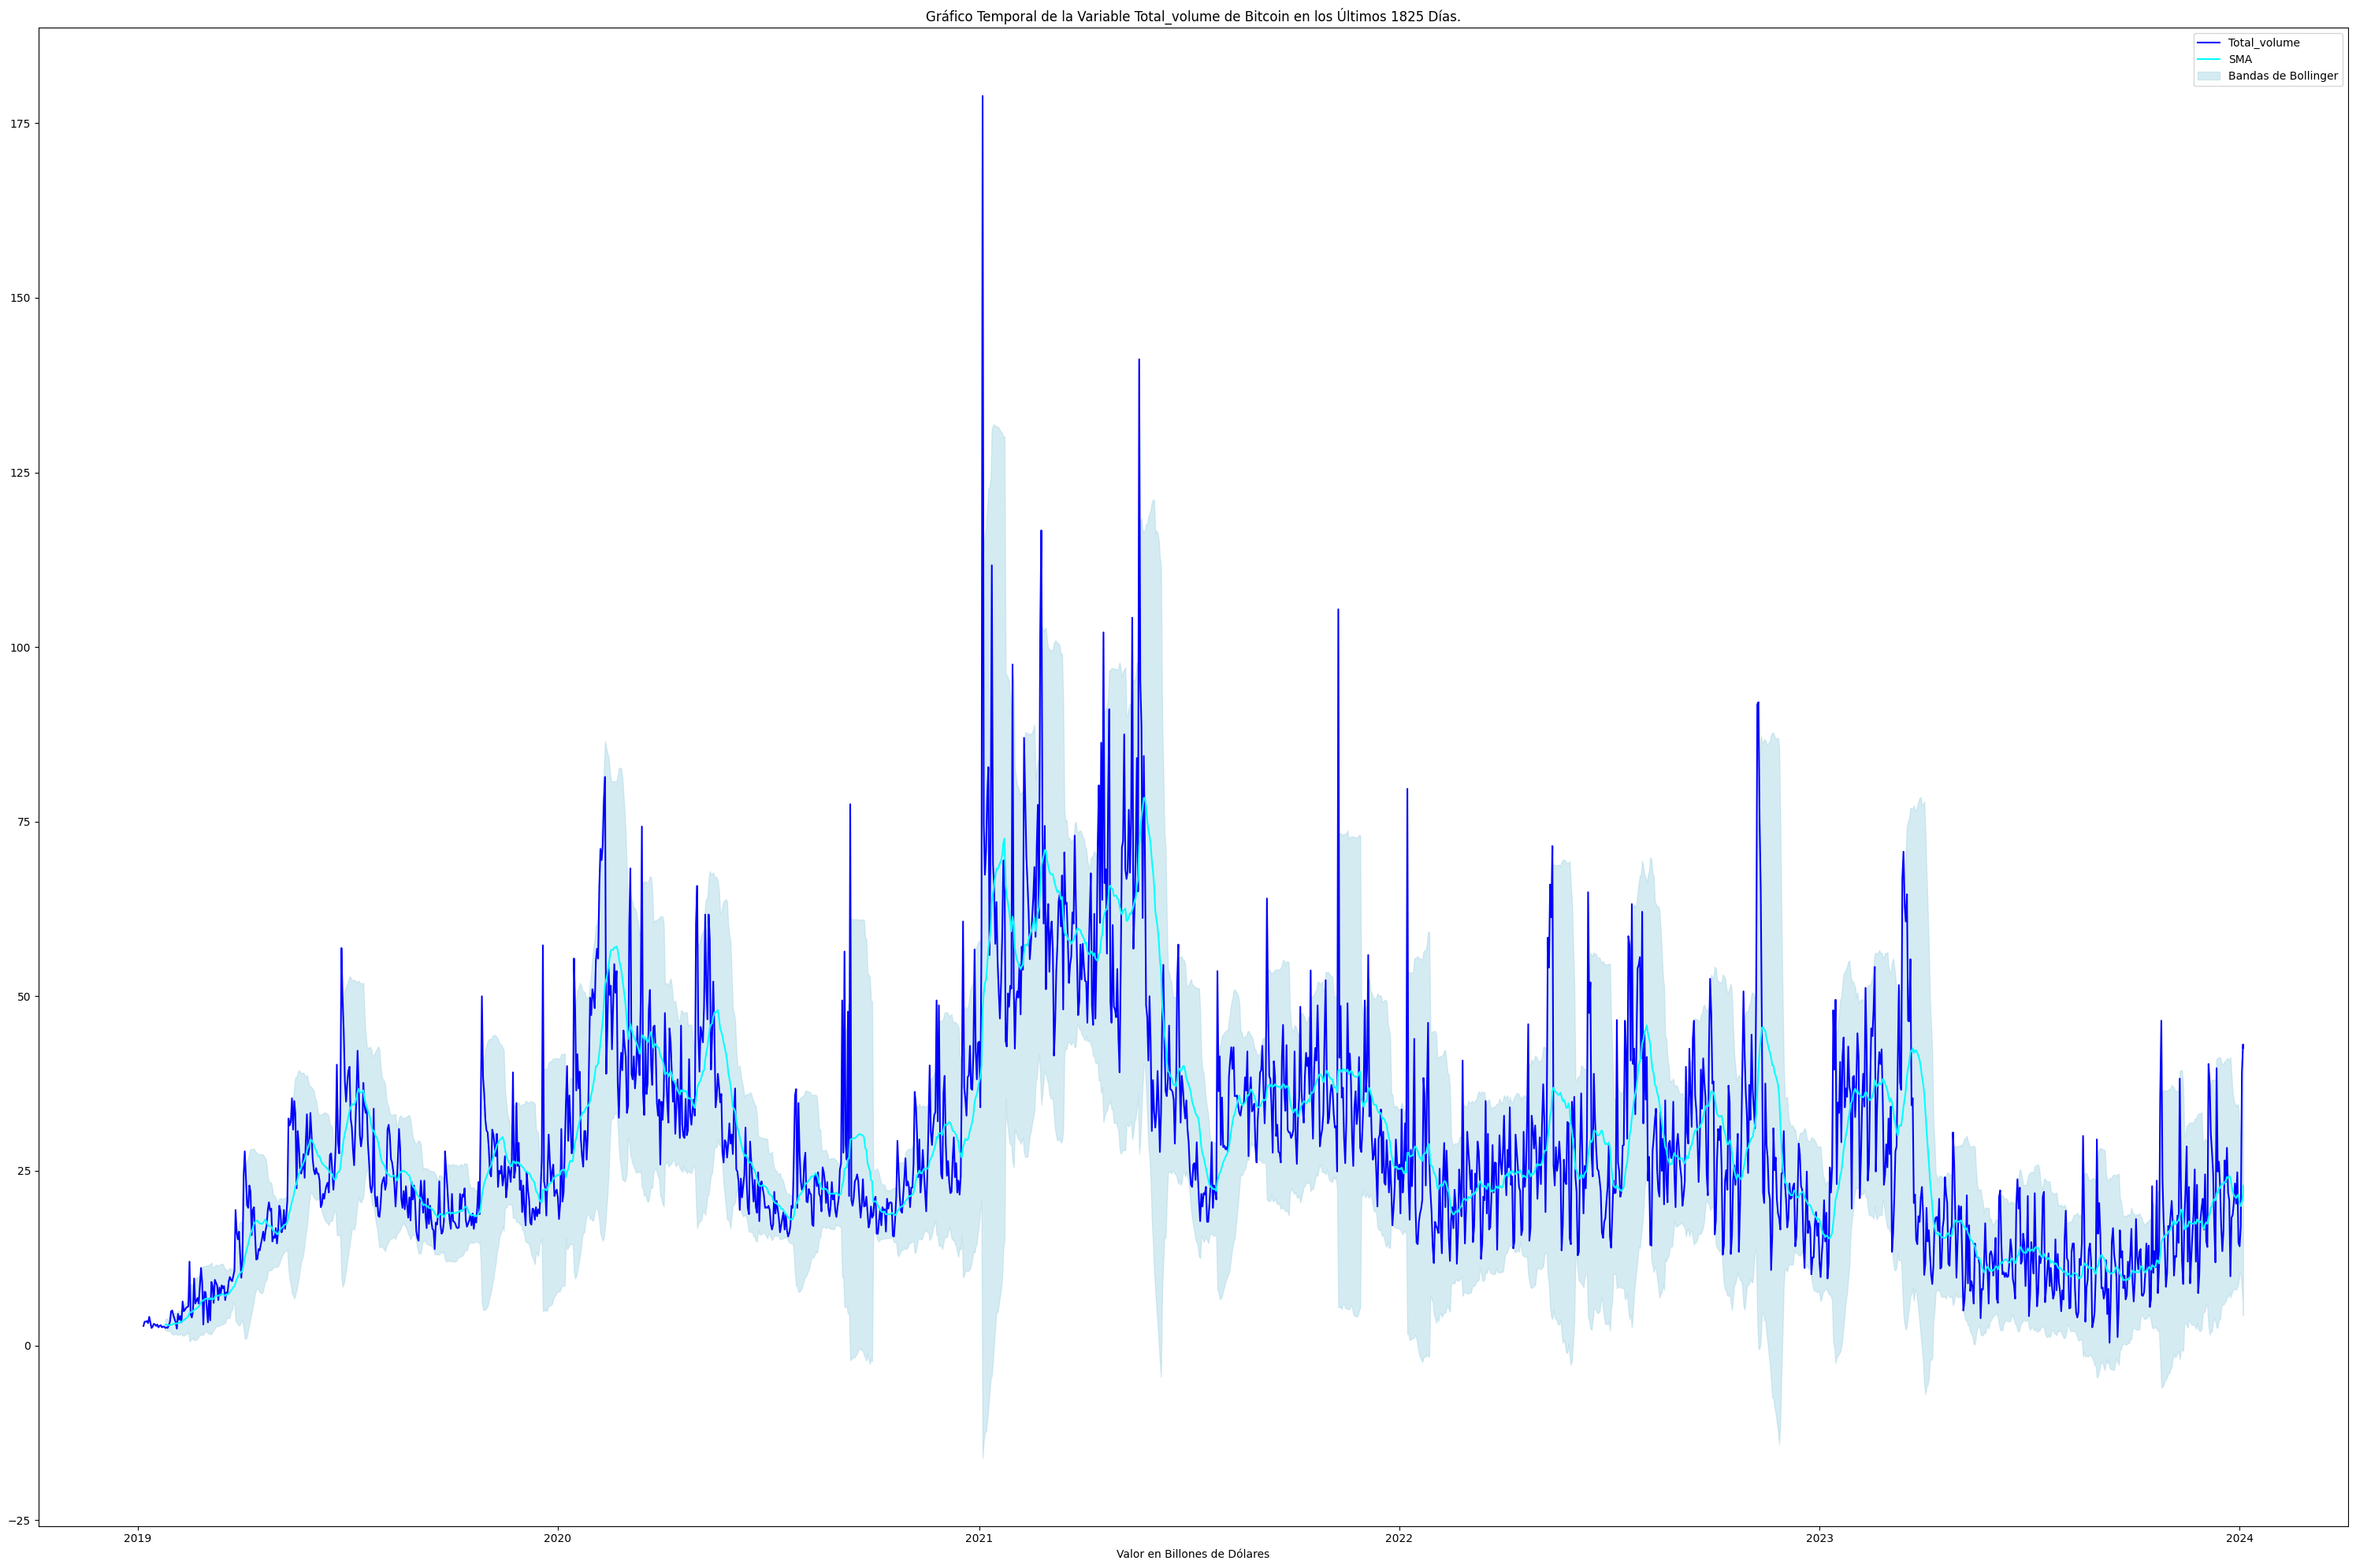

In [25]:
analisis_univariable('total_volume')

***MEDIDAS DE TENDENCIA CENTRAL, DE DISPERSIÓN Y POSICIÓN***

Los datos del volumen total de Bitcoin sugieren una alta heterogeneidad y volatilidad en la actividad de trading a lo largo de los últimos 5 años. Un promedio de 28.9B USD con una desviación estándar de 17.1B USD muestra que el volumen diario de trading ha variado ampliamente, oscilando entre 11.8B y 46.0B USD la mayor parte del tiempo. La existencia de valores extremadamente bajos y máximos históricos subraya la irregularidad y la posibilidad de picos de trading, posiblemente influenciados por eventos de mercado significativos. El coeficiente de variación del 59% refuerza la idea de una fluctuación significativa en el volumen de trading en comparación con el promedio, lo cual es un dato crucial para los inversores que buscan comprender la liquidez y el riesgo del mercado.

***HISTOGRAMA***

Punto de Volumen Común: La mayor frecuencia de volumen de trading se agrupa alrededor de un rango más bajo, lo que indica que hay un "punto dulce" en el volumen de trading que es más común. Para las predicciones, este rango puede ser considerado como el estado típico del mercado en términos de liquidez.

Potenciales Picos de Actividad de Trading: Los valores menores hacia el extremo derecho del gráfico representan días con un volumen excepcionalmente alto, posiblemente relacionados con eventos específicos del mercado o noticias significativas. Estos picos son importantes para predecir reacciones del mercado ante eventos similares en el futuro.

Volatilidad del Volumen: La variabilidad en la frecuencia de los volúmenes de trading, que se extiende desde muy bajos hasta extremadamente altos, refleja la naturaleza volátil del mercado de Bitcoin. Esta volatilidad puede ser utilizada para anticipar posibles fluctuaciones en el precio y para establecer estrategias de trading basadas en volúmenes anormales.

***GRÁFICO DE DENSIDAD***

En este gráfico se puede inferir que la mayoría de los valores de volumen de trading se concentran alrededor de un rango específico, con un pico claramente definido que sugiere un nivel de volumen más común y típico. Para las predicciones, este nivel central podría ser considerado como un indicador de normalidad en la actividad de trading, y cualquier desviación significativa de este rango podría señalar una actividad de mercado atípica que merecería una investigación adicional para entender las causas subyacentes, como noticias del mercado o cambios en la política económica que puedan influir en la oferta y la demanda de Bitcoin.

***DIAGRAMA DE CAJA Y BIGOTES***

El diagrama de caja para el "total_volume" de Bitcoin indica que la mayoría de los días, el volumen de trading se ha mantenido dentro de un rango relativamente estable, como lo demuestra la longitud de la caja. Sin embargo, los valores atípicos destacados sugieren que ha habido días con un volumen de trading significativamente más alto que la norma. Esta información es extremandamente valiosa para identificar patrones de comportamiento del mercado en relación con eventos externos o cambios en la confianza del mercado, lo cual puede ser útil para predecir y prepararse para futuras fluctuaciones en la actividad de trading de Bitcoin. Importante identificar el rango de fecha de estos puntos atípicos para buscar información relevante de esos días.


***GRAFICO TEMPORAL***

Volatilidad del Volumen de Trading: Se observan picos significativos en el volumen de trading, lo que indica períodos de alta actividad en el mercado. Estos picos pueden coincidir con eventos del mercado, anuncios importantes, o cambios regulatorios que afectan la percepción de los inversores, por lo que es importante analizar estos piks en caso de hacer analisis de mercado o de sentimientos.

Tendencias y Patrones: Aunque hay fluctuaciones, se puede observar una tendencia general constante y patrones a lo largo del tiempo. Por ejemplo, períodos estacionales de mayor actividad y piks que siguen ciertos ciclos, como actualizaciones tecnológicas o halvings de Bitcoin.

Posibles Indicadores para la Predicción: La frecuencia y magnitud de los picos podrían utilizarse como indicadores para predecir la actividad futura. Por ejemplo, un aumento sostenido en el volumen podría prever un movimiento significativo en el precio de Bitcoin.

Este gráfico es muy útil para los traders y analistas que buscan comprender la dinámica del mercado desarrollando estrategias de inversión basadas en la actividad del volumen de las transacciones del bitcoin y sus patrones.

## 2.4. Análisis Bivariable y Multivariable:

### 2.4.1 Gráficos de Dispersión (bivariables).


Los análisis bivariables en un Análisis Exploratorio de Datos (EDA) son esenciales para examinar la relación entre dos variables distintas. Estos análisis ayudan a identificar patrones, correlaciones y posibles causas y efectos entre las variables. Se utilizan herramientas como diagramas de dispersión y cálculos estadísticos para visualizar y cuantificar cómo una variable puede influir o estar relacionada con otra, facilitando una comprensión más profunda de los datos.

#### Diagrama de Dispersión.

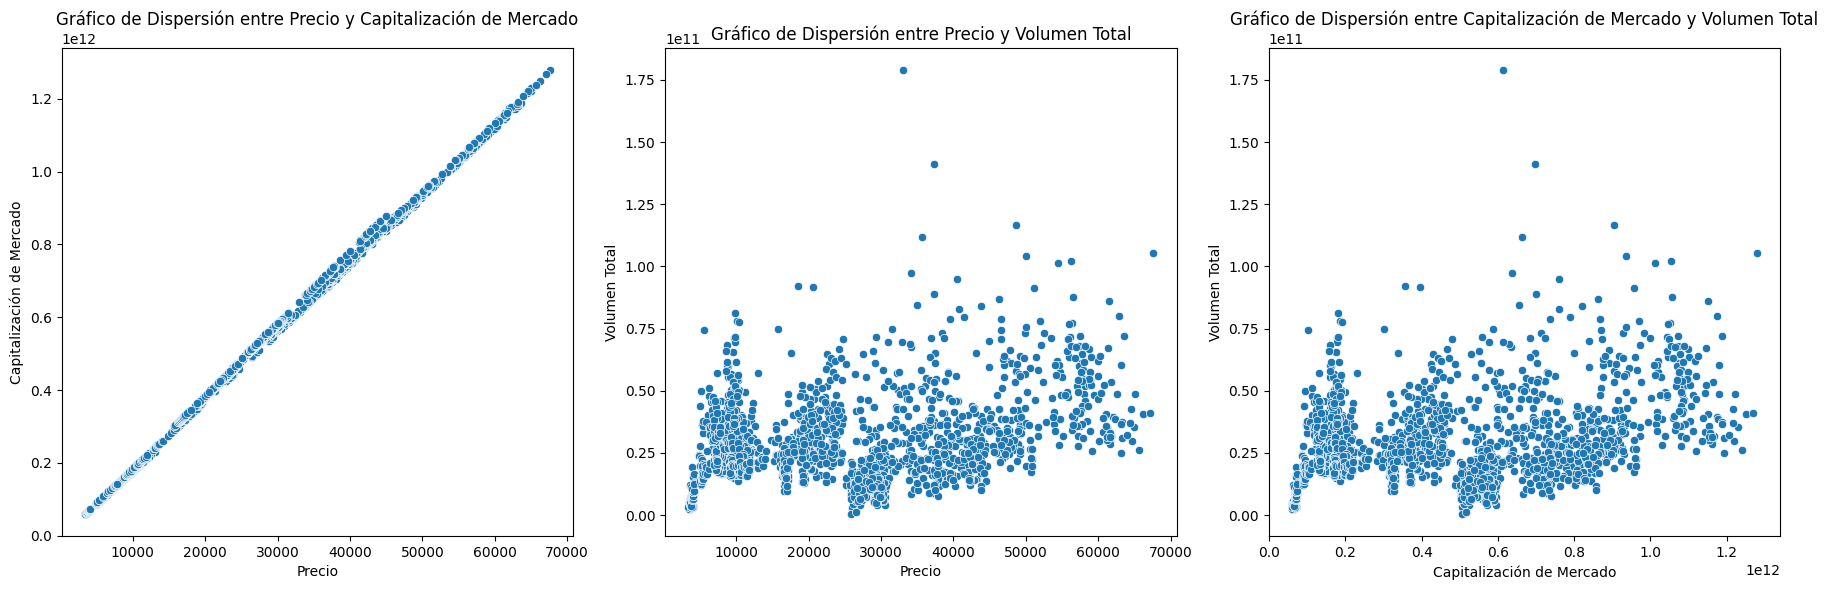

In [26]:
df = datos_historicos('bitcoin', 1825)
# Hacer un conjunto de plots de 1 fila y 3 columnas.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de Dispersión entre 'price' y 'market_cap'
sns.scatterplot(data=df, x='price', y='market_cap', ax=axes[0])
axes[0].set_title('Gráfico de Dispersión entre Precio y Capitalización de Mercado')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Capitalización de Mercado')

# Gráfico de Dispersión entre 'price' y 'total_volume'
sns.scatterplot(data=df, x='price', y='total_volume', ax=axes[1])
axes[1].set_title('Gráfico de Dispersión entre Precio y Volumen Total')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Volumen Total')

# Gráfico de Dispersión entre 'market_cap' y 'total_volume'
sns.scatterplot(data=df, x='market_cap', y='total_volume', ax=axes[2])
axes[2].set_title('Gráfico de Dispersión entre Capitalización de Mercado y Volumen Total')
axes[2].set_xlabel('Capitalización de Mercado')
axes[2].set_ylabel('Volumen Total')

plt.tight_layout()
plt.show()


***GRÁFICO DE DISPERSIÓN ENTRE PRECIO Y CAPITALIZACIÓN DE MERCADO***

Normalmente se esperaría ver una relación lineal positiva fuerte, ya que a medida que el precio de Bitcoin aumenta, la capitalización de mercado también debería aumentar, lo que reflejaría una correlación directa entre estos dos indicadores.

***GRÁFICO DE DISPERSIÓN ENTRE PRECIO Y VOLUMEN TOTAL***

La relación aquí puede ser más dispersa sin una tendencia clara, ya que el volumen de trading puede verse afectado por muchos factores además del precio, incluyendo la volatilidad del mercado y eventos externos. Sin embargo, se podrían esperar algunos agrupamientos donde el volumen aumenta en los niveles de precios más altos o más bajos debido a la actividad de trading intensificada durante los movimientos de precios significativos.


***GRÁFICO DE DISPERSIÓN ENTRE CAPITALIZACIÓN DE MERCADO Y VOLUMEN TOTAL***

Esta relación puede ser menos directa, pero podría mostrar que cuando la capitalización de mercado es alta, hay más interés en Bitcoin, lo que podría llevar a un volumen de trading más alto. No obstante, esta relación también podría ser no lineal y más dispersa, reflejando que el volumen de trading no solo depende del tamaño del mercado sino también de la liquidez y otros factores de mercado.

### 2.4.2 Gráficos Temporales (multivariable).

La comparación de gráficos temporales es fundamental para entender cómo las variables evolucionan y se relacionan entre sí a lo largo del tiempo. Permite identificar tendencias, ciclos y anomalías, facilitando la toma de decisiones basada en patrones históricos. Además, destacan la sincronización y el impacto de eventos externos en las variables observadas, lo que es crucial para el análisis predictivo y la planificación estratégica.

#### Conjunto de Gráficos Temporales.

<ipython-input-27-040d5c008b1e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation=90)
<ipython-input-27-040d5c008b1e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation=90)
<ipython-input-27-040d5c008b1e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels, rotation=90)


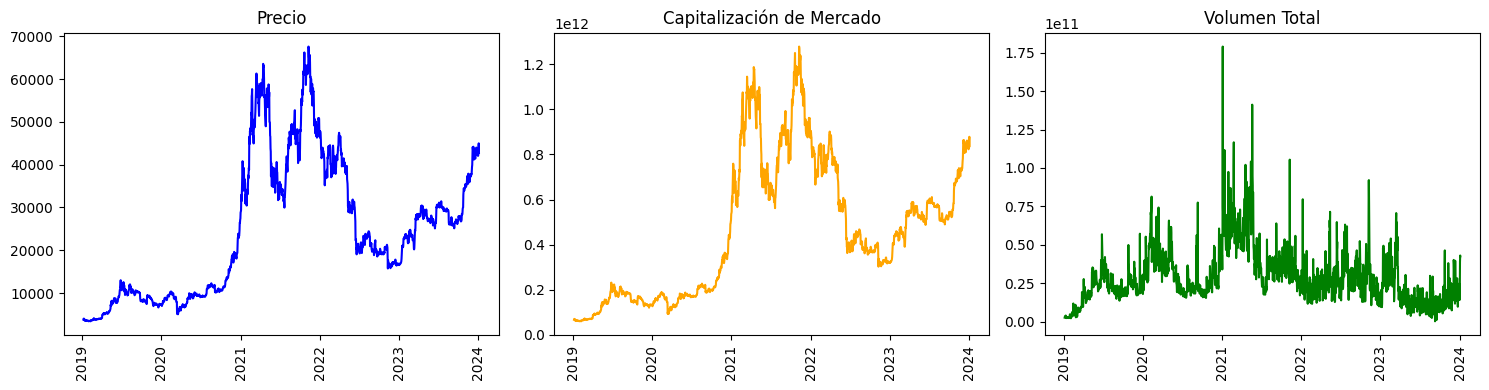

In [27]:
# Conjunto de gráficos temporales.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.plot(df['timestamp'], df['price'], color='blue')
ax1.set_title('Precio')
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, rotation=90)

ax2.plot(df['timestamp'], df['market_cap'], color='orange')
ax2.set_title('Capitalización de Mercado')
ax2.set_xticklabels(labels, rotation=90)

ax3.plot(df['timestamp'], df['total_volume'], color='green')
ax3.set_title('Volumen Total')
ax3.set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()

Correlación: Los gráficos de precio y capitalización de mercado estarán correlacionados ya que la capitalización es un derivado directo del precio. Sin embargo, la correlación con el volumen puede no ser tan directa.

Eventos de Mercado: Los picos en los gráficos de precio y capitalización de mercado pueden coincidir con eventos conocidos en el mercado de criptomonedas, mientras que los picos en el volumen pueden estar asociados tanto con estos eventos como con la reacción de los traders a los mismos.

Volatilidad: El gráfico de precio y capitalización de mercado puede mostrar la volatilidad de la valoración de Bitcoin, mientras que el gráfico de volumen puede reflejar la volatilidad o estabilidad de la actividad comercial.

Indicadores de Comportamiento del Mercado: Mientras que el precio y la capitalización de mercado pueden ser considerados indicadores de la valoración del activo, el volumen es un indicador de la actividad del mercado y podría ser usado para evaluar la liquidez y la fuerza detrás de los movimientos de precios.

#### Gráfico Temporal Multivariable.

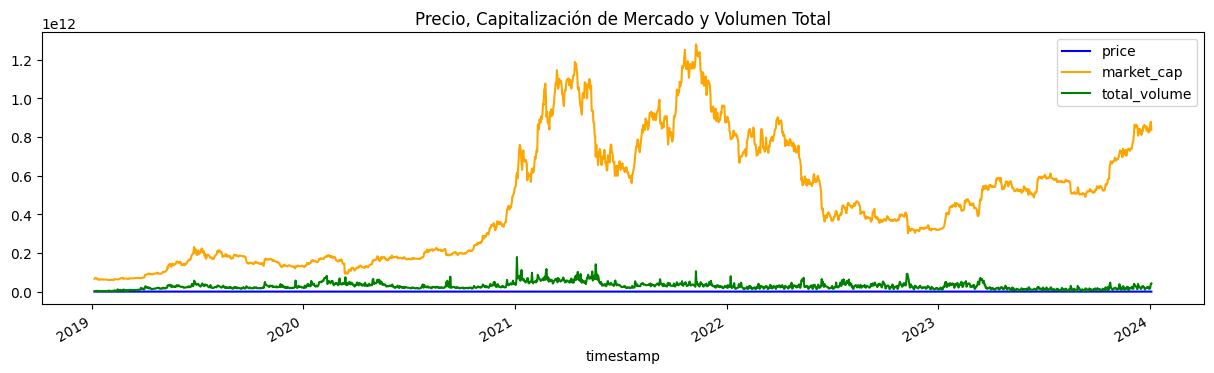

In [28]:
# Gráfico temporal con las variables precio, capitalización de mercado y volumen total.
colors = ['blue','orange','green']
fig, ax = plt.subplots(figsize=(15, 4))
df.set_index('timestamp').plot(ax=ax, color = colors)
ax.set_title('Precio, Capitalización de Mercado y Volumen Total')
plt.show()

Correlación Precio-Capitalización de Mercado: Dado que las líneas de "price" y "market_cap" se mueven en conjunto, esto refleja una correlación directa entre estos dos parámetros, lo cual es esperado ya que la capitalización de mercado es producto del precio por la cantidad de monedas en circulación.

Volumen de Trading: La línea de "total_volume" parece ser relativamente plana en comparación con las otras dos, lo que podría sugerir que, aunque el precio y la capitalización de mercado han experimentado grandes fluctuaciones, el volumen de trading no ha tenido cambios tan extremos.

Picos y Valles: Los picos en las líneas de "price" y "market_cap" pueden indicar períodos de gran interés o adopción de Bitcoin, mientras que los valles pueden reflejar períodos de menor confianza o eventos adversos en el mercado.

Tendencias: Si las líneas de "price" y "market_cap" muestran una tendencia alcista reciente, esto podría indicar una recuperación o un nuevo ciclo de crecimiento en el interés y la valoración de Bitcoin.

#### Gráfico Temporal Apilado.

Text(0, 0.5, 'Valores')

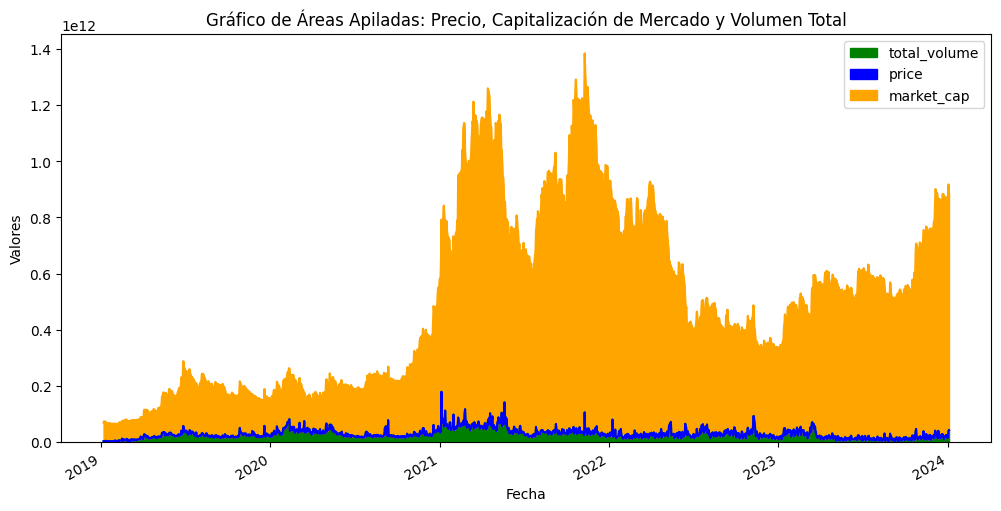

In [29]:
# Gráfico áreas apiladas
df_apilado = df.copy()
df_apilado.set_index('timestamp', inplace = True)
df_apilado = df_apilado[['total_volume', 'price', 'market_cap']]
colors = ['green', 'blue', 'orange']
df_apilado.plot(kind='area', stacked=True, figsize=(12, 6), color = colors)

plt.title('Gráfico de Áreas Apiladas: Precio, Capitalización de Mercado y Volumen Total')
plt.xlabel('Fecha')
plt.ylabel('Valores')

Los movimientos significativos en el precio pueden ser un precursor de cambios proporcionales en la capitalización de mercado. Por lo tanto, al predecir el precio de Bitcoin, también se puede inferir la dirección probable de la capitalización de mercado total. Además, períodos de volumen de trading consistentemente alto que no corresponden con incrementos en la capitalización de mercado podrían indicar una mayor distribución de Bitcoin entre los inversores, lo cual podría ser una señal de una base de inversores en crecimiento y potencialmente una mayor estabilidad en los precios a largo plazo.







#### Gráfico Temporal Normalizado.

Este código cambia los números en una lista para que estén todos entre 0 y 1. Imagina que tienes una fila de niños de diferentes alturas; este código hace que el niño más bajo sea 0, el más alto sea 1, y todos los demás niños sean un número entre 0 y 1 según su altura. Esto es útil para comparar las alturas de manera justa, sin que importe cuán altos o bajos son en realidad.

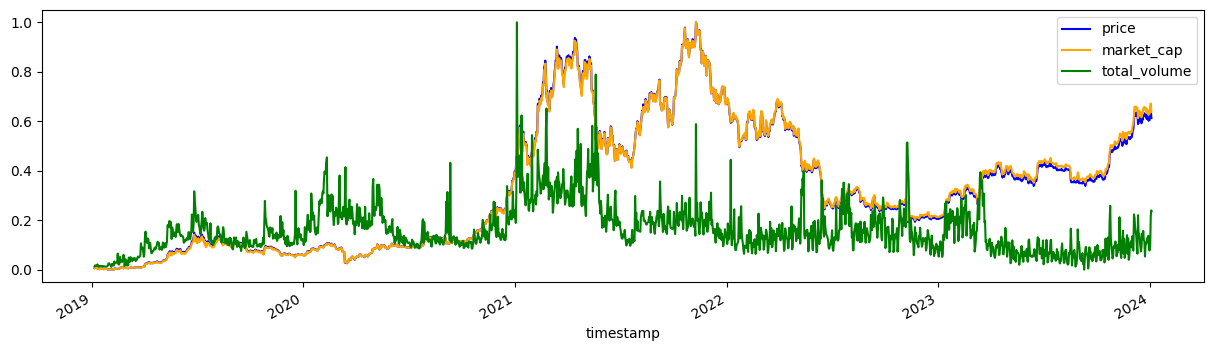

In [30]:
# Este método toma el tamaño que tiene el dato y lo compara mediante un cociente con el rango total de los datos
df_normalizado = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
df_normalizado.drop('timestamp', inplace = True, axis = 1)
df_timestamp = pd.DataFrame(df['timestamp'])
df_normalizado = pd.concat([df_timestamp, df_normalizado], axis = 1)
# Ploteo
fig, ax = plt.subplots(figsize=(15, 4))
colors = ['blue', 'orange', 'green']
df_normalizado.set_index('timestamp').plot(ax=ax, color = colors)
plt.show()

Volatilidad Sincronizada: Los picos y caídas en el precio y la capitalización de mercado tienden a ocurrir al mismo tiempo, lo cual es esperado ya que la capitalización de mercado es producto del precio y el suministro circulante. Los picos agudos en volumen también parecen coincidir con estos movimientos, sugiriendo que los cambios significativos en el precio suelen ir acompañados de un aumento en la actividad de trading.

Picos de Volumen como Indicadores: Los picos pronunciados en el volumen podrían ser indicativos de movimientos de precios importantes inminentes. Un volumen de trading elevado podría preceder a una subida o caída en el precio, sirviendo como un posible indicador anticipado de la volatilidad del mercado. Esto en el análisis técnico, sería un "rectángulo", espacio creado porlos soportes inferior y superior, donde al ingresar el valor del volumen total por debajo, sale disparadamente por arriba y viceversa.

Correlación Precio-Volumen: En algunos casos, un aumento en el volumen no resulta en un cambio correspondiente en la capitalización de mercado, lo que podría sugerir que se están realizando muchas transacciones sin un cambio significativo en la acumulación de valor. Esto podría interpretarse como una señal de que el mercado está en una fase de distribución o acumulación y una confianza constante hacia el valor de la criptomoneda.

Tendencias y Consolidaciones: Periodos donde el precio y la capitalización de mercado se mueven lateralmente con un volumen relativamente bajo pueden ser fases de consolidación, después de las cuales es común ver movimientos de precios más definidos. Estos patrones podrían ser utilizados para anticipar rupturas potenciales, ya sea al alza o a la baja.

### 2.4.3 Gráficos de Disperción Interactivos.

***PLOTLY***

Esta biblioteca de python, permite la identificación de puntos de datos al pasar el cursor sobre puntos individuales. Plotly puede mostrar información específica como el precio exacto, el volumen de trading y otros datos relevantes en ese punto. Esto permite a los usuarios identificar rápidamente los valores atípicos o puntos de interés específicos sin tener que referirse a tablas de datos adicionales.

Además Plotly permite a los usuarios hacer zoom en áreas específicas del gráfico para ver los datos más de cerca. Esto es particularmente útil cuando los puntos están muy agrupados y es difícil discernir la información en un gráfico estático. También se puede seleccionar y filtrar rangos de datos directamente en el gráfico para analizar segmentos específicos, como un rango de precio particular, lo que facilita el análisis de tendencias dentro de subconjuntos de datos. Si los datos están correlacionados con el tiempo, los gráficos interactivos pueden permitir a los usuarios rastrear cómo las relaciones entre variables, como el precio y el volumen, han cambiado con el tiempo.

#### Gráfico dispersión 3 variables.

In [31]:
# Price vs Market_cap vs Total_volume
fig = px.scatter_3d(df, x='price', y='market_cap', z='total_volume', color='price', symbol='market_cap', size='total_volume')
fig.show()

Volumen de Trading en Relación con el Precio y la Capitalización de Mercado: Los puntos más grandes que representan mayor volumen de trading pueden no alinearse directamente con los precios más altos o la capitalización de mercado, lo que indica que los días de mayor volumen no siempre son los días de precios más altos. Esto puede sugerir que un gran volumen de trading puede ocurrir durante los períodos de volatilidad del mercado, independientemente de si el precio está en su punto más alto o no.

Distribución y Densidad de Datos: La concentración de puntos puede revelar áreas de mayor y menor actividad de mercado. Un agrupamiento denso de puntos en ciertos niveles de precio y capitalización de mercado puede indicar rangos de 'soporte' o 'resistencia' donde el precio ha tendido a estabilizarse o ha luchado por moverse más allá, respectivamente.

Anomalías o Outliers: Puntos que se desvíen sustancialmente de la tendencia general podrían indicar eventos atípicos o días con condiciones de mercado inusuales. Estos pueden ser de particular interés para la predicción, ya que pueden señalar directamente a eventos excepcionales que afectaron al mercado y podrían volver a afectarlo. Importante analizar los puntos aislados más gorditos y alejados de la concentración general, en particular los más amarillos.

In [32]:
# Timestamp vs Market_cap vs Total_volume
fig = px.scatter_3d(df, x='timestamp', y='market_cap', z='total_volume', color='price', symbol='market_cap', size='price')
fig.show()

#### Gráfico de Burbujas

In [33]:
# Precio vs capitalización de mercado, con burbujas de tamaño volumen total de transacciones
fig = px.scatter(df, x="price", y="market_cap", color = 'price', size="total_volume")
fig.show()

Consistencia del Mercado: La uniformidad del gradiente de colores y la densidad de los puntos muestran que la relación entre precio y capitalización de mercado es consistente a lo largo del tiempo. No hay puntos anómalos significativos que sugieran desviaciones importantes de esta tendencia.

Análisis para Predicciones: Para predecir movimientos futuros, se podría asumir que esta tendencia continuará a menos que haya un cambio fundamental en el mercado de Bitcoin. Los analistas podrían buscar patrones en el comportamiento del precio en relación con la capitalización de mercado para identificar potenciales señales de compra o venta.

In [34]:
# # Precio vs volumen total, con burbujas de tamaño capitalización de mercado
fig = px.scatter(df, x="price", y="total_volume", color = 'price', size="market_cap")
fig.show()

Puntos Anómalos: Puntos que se destacan por su volumen significativamente alto en comparación con otros en el mismo rango de precios pueden indicar eventos de mercado específicos que provocaron un aumento en la actividad de trading.

Rango de Precios con Mayor Actividad de Trading: El gradiente de color muestra que a medida que el precio aumenta, también lo hace el volumen de trading, lo que podría reflejar una mayor participación o interés en el mercado a precios más altos. Esto también podría indicar una mayor liquidez o una mayor volatilidad en esos niveles de precio.

In [35]:
# Precio vs capitalización de mercado, con burbujas de tamaño volumen total de transacciones
fig = px.scatter(df, x="timestamp", y="price", color = 'total_volume', size="total_volume")
fig.show()

La correlación entre picos de volumen y cambios significativos en el precio sugiere que un aumento en el volumen podría preceder a la volatilidad positiva del precio. Observando los patrones históricos, períodos con volumen elevado y creciente, particularmente aquellos con un cambio rápido de color hacia tonos más cálidos, podrían ser indicativos de un inminente aumento de precio. Alternativamente, si el volumen alto no resulta en un cambio de precio sostenido, podría indicar una inminente corrección del precio. Estos patrones podrían ser utilizados para predecir tendencias futuras, especialmente en la identificación de condiciones de mercado que puedan señalar un cambio de tendencia o la consolidación del precio de Bitcoin.

### 2.4.4 Correlación:

<ipython-input-36-35f060ca5fb4>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-36-35f060ca5fb4>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-36-35f060ca5fb4>:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



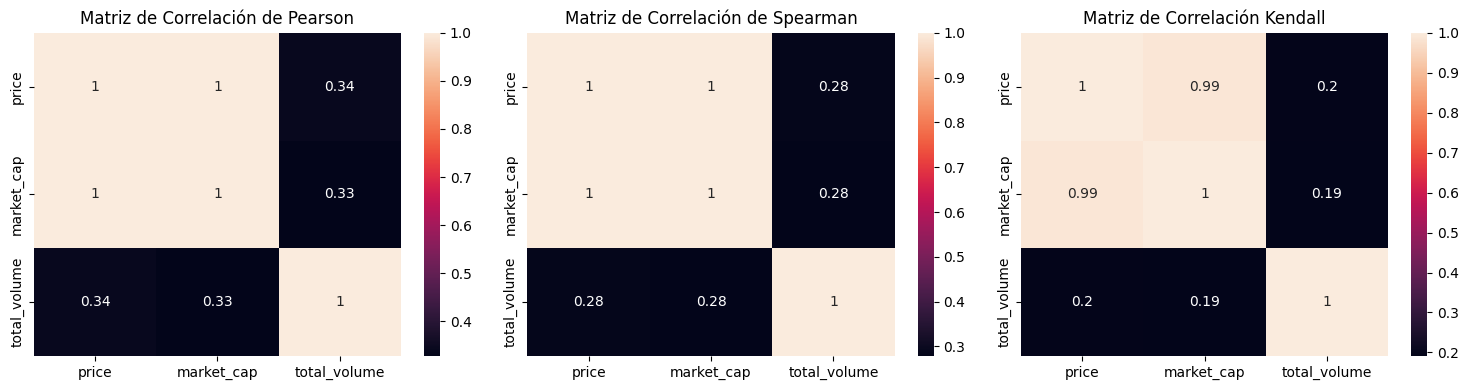

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Matriz de Correlación de Pearson
correlations_pearson = df.corr(method='pearson')
sns.heatmap(correlations_pearson, annot=True, ax=axes[0])
axes[0].set_title('Matriz de Correlación de Pearson')

# Matriz de Correlación de Spearman
correlations_spearman = df.corr(method='spearman')
sns.heatmap(correlations_spearman, annot=True, ax=axes[1])
axes[1].set_title('Matriz de Correlación de Spearman')

# Matriz de Correlación Kendall
correlations_kendall = df.corr(method='kendall')
sns.heatmap(correlations_kendall, annot=True, ax=axes[2])
axes[2].set_title('Matriz de Correlación Kendall')

plt.tight_layout()
plt.show()

Las matrices de correlación presentadas muestran una correlación perfecta entre el precio y la capitalización de mercado de Bitcoin en las medidas de Pearson y Spearman, lo que indica una relación directa y fuerte, como se esperaría dado que la capitalización de mercado se calcula multiplicando el precio por el suministro circulante. La correlación con el volumen total es significativamente menor, sugiriendo que el volumen de trading no está influenciado por los cambios en el precio y la capitalización de mercado o viceversa. Esto puede ser útil para predecir que los movimientos significativos en precio y capitalización de mercado no necesariamente resultan en cambios proporcionales en el volumen de trading. Cuidado.

# **3. ENTRENAR Y EVALUAR MODELOS PREDICTIVOS, DE CLASIFICACIÓN, AGRUPAMIENTO U OTROS**

**Precio**: Predecir el precio futuro de una criptomoneda es a menudo el enfoque principal para los inversores interesados en comprar a un precio bajo y vender a un precio alto. Si tu estrategia se centra en el trading a corto o mediano plazo, esta podría ser la variable más relevante.

**Capitalización de Mercado**: La capitalización de mercado, que se calcula multiplicando el precio actual por el número total de monedas en circulación, es un indicador del valor total del mercado de una criptomoneda. Es útil para comprender la estabilidad y el crecimiento a largo plazo de la criptomoneda. Si estás interesado en inversiones a largo plazo o en evaluar la fortaleza y la dominancia de una moneda en el mercado, esta podría ser una variable objetivo adecuada.

**Volumen Total de Transacciones**: El volumen de transacciones indica cuánto de una criptomoneda se ha comprado y vendido en un período determinado. Un alto volumen de transacciones puede ser un indicador de alta liquidez o interés en la criptomoneda. Si tu estrategia se basa en comprender la popularidad o la liquidez de la criptomoneda, entonces el volumen podría ser un buen objetivo.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [188]:
# Importar los datos de la API
df = datos_historicos('bitcoin', 90) # ¡¡un total de 10 años de datos!!

In [189]:
# # Aplicar validación cruzada para una evaluación más robusta
# scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
# print("Cross-validated R-squared scores:", scores)
# print("Mean R-squared:", np.mean(scores))

## 3.1 Regresión Lineal: Asumamos que la relación es lineal.

In [204]:
# Crear copia df
df_m1 = df.copy()

# Dividir timestamp en columnas year, month y year
df_m1['day'] = df_m1['timestamp'].dt.day
df_m1['month'] = df_m1['timestamp'].dt.month
df_m1['year'] = df_m1['timestamp'].dt.year

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_m1[['day', 'month', 'year']]
y = df_m1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # "respuesta a la pregunta fundamental de la vida, el universo y todo lo demás"

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 2366783.055421945
R-squared: 0.9210767400981905


Predicción

In [191]:
X_pred = [[31,12,2023],
          [1,5,2024],
          [1,5,2028],
          [31,12,2030]]
y_pred = model.predict(X_pred)

# Convertir X_pred a una columna del DataFrame
df_pred = pd.DataFrame(X_pred, columns=['day', 'month', 'year'])

# Convertir y_pred a una columna en el DataFrame
df_pred['prediction_price'] = y_pred
df_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



day  month  year  prediction_price
0   31     12  2023      44712.632728
1    1      5  2024      69277.464212
2    1      5  2028     363247.610140
3   31     12  2030     559160.388101

Con un R-squared de aproximadamente 0.921, el modelo de regresión lineal explica el 92% de la variabilidad en los datos de las criptomonedas, lo que indica un ajuste muy bueno. Sin embargo, para las predicciones, sería mucho mejor considerar modelos no lineales, a pesar de ser este un excelente modelo.

## 3.2 Regresión Polinómica: Una opción "unos grados" más arriesgada que la anterior.

In [222]:
# Crear copia df
df_pol = df.copy()

# Dividir timestamp en columnas year, month y year
df_pol['day'] = df_pol['timestamp'].dt.day
df_pol['month'] = df_pol['timestamp'].dt.month
df_pol['year'] = df_pol['timestamp'].dt.year

# Dividir variables predictoras de objetivo.
X = df_pol[['day','month','year']]
y = df_pol['price']  # La variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluye la creación de características polinómicas
# y luego aplicar una regresión lineal
degree = 6  # Puedes cambiar el grado del polinomio según sea necesario
pipeline = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 368739.04635186924
R-squared: 0.9879149560850116


In [223]:
X_pred = [[31,12,2023],
          [1,5,2024],
          [1,5,2028],
          [31,12,2030]]
y_pred = pipeline.predict(X_pred)

# Convertir X_pred a una columna del DataFrame
df_pred = pd.DataFrame(X_pred, columns=['day', 'month', 'year'])

# Convertir y_pred a una columna en el DataFrame
df_pred['prediction_price'] = y_pred
df_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



day  month  year  prediction_price
0   31     12  2023      4.247044e+04
1    1      5  2024     -1.329037e+06
2    1      5  2028     -9.190335e+06
3   31     12  2030      4.995811e+07

Al igual que con el modelo lineal, un R-squared de aproximadamente 0.987, en el modelo de regresión polinómica, explica casi el 99% de la variabilidad en los datos de las criptomonedas, lo que indica un excelente ajuste. Sin embargo, para las predicciones, aún así es preferible considerar modelos específicos de series de tiempo. Observa que un par de predicciones dieron números negativos, cosa muy extraña.

## 3.3 Facebook Prophet: Algoritmo para predecir series temporales, de los más potentes para hallar patrones de estacionalidad en los datos.

Creación de un modelo para probar rendimiento.

In [42]:
criptomoneda = 'bitcoin'
days = 160
df = datos_historicos(criptomoneda,days)

df.dropna(inplace=True)

# Cantidad de días a predecir
periods = 10

# Crear una copia de df para el modelo prophet
df_fb = df.copy()


# Crear un dataframe solo con las columnas fecha y precio, ordenar por fecha y resetear el índice
df_fb = df_fb[['timestamp','price']].sort_values('timestamp').reset_index()
# Eliminar la columna índice
df_fb.drop(['index'], axis = 1, inplace = True)

# Renombrar las columnas para el modelo Prophet
df_fb = df_fb[['timestamp','price']].rename(columns = {'timestamp': 'ds', 'price': 'y'})
# Ordenar por ds (por si las dudas)
df_fb = df_fb.sort_values('ds')

# Dividir los datos en train y test
train_data = df_fb.iloc[:len(df_fb)-periods] # todos los valores menos los últimos 'periods' datos
test_data = df_fb.iloc[len(df_fb)-periods:] # los últimos 'periods' datos

# Instanciar modelo prophet con captura de patrones diarios, semanales y anuales
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
# Agregar captura de estacionalidad mensual con una complejidad de la curva de la estacionalidad con un orden de fourier de 5
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# Ajustar el modelo
model.fit(train_data)
# Crear dataframe para las predicciones con diez periodos (días)
future = model.make_future_dataframe(periods = periods, freq = 'D')
# Crear dataframe con las predicciones
forecast = model.predict(future)

# Extraer las predicciones de los últimos 10 días de las columnas ds y yhat
forecast = pd.DataFrame({'timestamp': forecast[-periods:]['ds'], 'price_prediction': forecast[-periods:]['yhat'] })
# Establecer la fecha como índice con una frecuencia en días.
forecast = forecast.set_index('timestamp')
forecast.index.freq = "D"

# Evaluar el modelo
# Agregar a test data los valores de la predicción
test_data['predictions'] = forecast['price_prediction'].values

a = test_data[['y','predictions']]
fig = px.line(a, x = test_data['ds'], y = a.columns, template = 'plotly_dark', title = 'Evaluación del Modelo Facebook Prophet')
fig.update_xaxes(title_text='Fecha')  # Nombre personalizado para el eje X
fig.update_yaxes(title_text='Valor en USD')  # Nombre personalizado para el eje Y

# Actualizar leyendas de labels para reflejar los nombres correctos
fig.for_each_trace(lambda t: t.update(name = {'y': f'Valores reales de {criptomoneda.capitalize()}','predictions': 'Valores predichos por Prophet'}[t.name]))

fig.show()

# Evaluar del modelo
from sklearn import metrics

def evaluacion_modelo(y_true, y_pred):

  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  print('Evaluación del Modelo:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

evaluacion_modelo(test_data['y'], test_data['predictions'])

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxl0bk4w/7jjphbld.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxl0bk4w/xh03g732.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18314', 'data', 'file=/tmp/tmpuxl0bk4w/7jjphbld.json', 'init=/tmp/tmpuxl0bk4w/xh03g732.json', 'output', 'file=/tmp/tmpuxl0bk4w/prophet_modelcgxo66f4/prophet_model-20240104025758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:57:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-42-d595433fe7b7>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

Evaluación del Modelo:-
MSE is : 13160940.578109272
MAE is : 3286.435825939168
RMSE is : 3627.8010665014795
MAPE is : 7.655355682452939
R2 is : -15.362796735302972



El modelo Prophet alcanza un rendimiento óptimo de predicción cuando se alimenta con series temporales de criptomonedas que abarcan un período específico, de 160 a 270 días. Fuera de este intervalo temporal, la estabilidad predictiva del modelo se reduce notablemente, dando lugar a proyecciones con una alta volatilidad. La evaluación del modelo arroja luz sobre esta situación: un MSE de 1,520,714.61 y un RMSE de 1,233.17, junto con un MAE de 1,039.89, indican variaciones considerables entre las predicciones y los valores reales. Además, un MAPE del 2.44% refleja desviaciones en términos porcentuales, mientras que un valor de R2 de -0.788 sugiere que el modelo actual puede no capturar adecuadamente la variabilidad de los datos en escenarios fuera del rango de días mencionado. Estas métricas subrayan la necesidad de ajustar el modelo o de restringir su uso al intervalo de días donde su precisión es más alta.








Predicción del modelo Prophet.

In [43]:
criptomoneda = 'bitcoin'
days = 160
df = datos_historicos(criptomoneda,days)

# Crear una copia de df para el modelo prophet
df_fb = df.copy()

# Cantidad de días a predecir
periods = 10

# Eliminar nulos
df.dropna(inplace=True)

# Crear un dataframe solo con las columnas fecha y precio, ordenar por fecha y resetear el índice
df_fb = df_fb[['timestamp','price']].sort_values('timestamp').reset_index()
# Eliminar la columna índice
df_fb.drop(['index'], axis = 1, inplace = True)
# Renombrar las columnas para el modelo Prophet
df_fb = df_fb[['timestamp','price']].rename(columns = {'timestamp': 'ds', 'price': 'y'})
# Ordenar por ds (por si las dudas)
df_fb = df_fb.sort_values('ds')


# Instanciar modelo prophet con captura de patrones diarios, semanales y anuales
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
# Agregar captura de estacionalidad mensual con una complejidad de la curva de la estacionalidad con un orden de fourier de 5
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# Ajustar el modelo
model.fit(df_fb)
# Crear dataframe para las predicciones con diez periodos de 10 días
future = model.make_future_dataframe(periods = periods, freq = 'D')
# Crear daataframe con las predicciones
forecast = model.predict(future)


forecast = pd.DataFrame({'Date': forecast[-periods:]['ds'], 'Pred': forecast[-periods:]['yhat'] })

forecast = forecast.set_index('Date')

forecast.index.freq = "D"

forecast = forecast.reset_index()

# Crear gráfico
a = forecast['Pred']
ul = df_fb['ds'].iloc[-1].day
# Crear el trazo para los datos hasta diciembre de 2022
trace1 = go.Scatter(
    x=df_fb['ds'][len(df_fb)-periods*4:],  # O la columna de fechas correspondiente
    y=df_fb['y'][len(df_fb)-periods*4:],  # O la columna de predicciones correspondiente
    mode='lines',
    name=f'Precios de la Criptomoneda hasta el {ul} de Diciembre 2023',
    line=dict(color='blue')  # Puedes elegir el color que prefieras
)

# Crear el trazo para los datos a partir de enero de 2023
trace2 = go.Scatter(
    x=forecast['Date'],  # O la columna de fechas correspondiente
    y=forecast['Pred'],  # O la columna de predicciones correspondiente
    mode='lines',
    name=f'Predicción de Precios para los Siguientes {periods} Días',
    line=dict(color='red')  # Puedes elegir un color diferente para resaltar esta sección
)

# Figura con ambos trazos
fig = go.Figure(data=[trace1, trace2])

# Layout con títulos y demás configuraciones
fig.update_layout(
    title=f'Predicción de Precios Diarios para los Siguientes {periods} Días con Modelo Facebook Prophet',
    xaxis_title='Fecha',
    yaxis_title='Valor en USD',
    template='plotly_dark'
)

fig.show()

# # Extraer las predicciones de los últimos 10 días de las columnas ds y yhat
# forecast = pd.DataFrame({'timestamp': forecast[-10:]['ds'], 'price_prediction': forecast[-10:]['yhat'] })

# Predicción en detalle
fig = px.line(forecast, x='Date', y='Pred', template='plotly_dark', title='Detalle de Predicciones Diarias 2023 - 2024')
fig.update_xaxes(title_text='Fecha')  # Nombre personalizado para el eje X
fig.update_yaxes(title_text='Valor en USD')  # Nombre personalizado para el eje Y
fig.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxl0bk4w/4yu0sc1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxl0bk4w/lw6fd59g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99625', 'data', 'file=/tmp/tmpuxl0bk4w/4yu0sc1n.json', 'init=/tmp/tmpuxl0bk4w/lw6fd59g.json', 'output', 'file=/tmp/tmpuxl0bk4w/prophet_modelvtqiaoy0/prophet_model-20240104025759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:57:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


La predicción hecha por Prophet sugiere un aumento significativo en el precio en el corto plazo. Prophet, que es un modelo de pronóstico diseñado para capturar tendencias diarias, semanales y anuales, así como efectos de vacaciones, parece estar identificando una tendencia alcista para el período proyectado. Este tipo de proyección podría estar influenciada por patrones estacionales previamente observados, tendencias subyacentes en los datos históricos, o eventos especiales que el modelo ha aprendido que están asociados con movimientos de precios similares.

## 3.4 ARIMA: algoritmo exclusivo para predicciones con series temporales.

El modelo ARIMA (Autoregressive Integrated Moving Average) es una técnica de análisis de series temporales que combina modelos autorregresivos (AR), integración (I) para diferenciar y hacer estacionarios los datos, y medias móviles (MA) para suavizar las fluctuaciones aleatorias, con el fin de predecir futuros puntos de datos en una serie temporal.

### Crear la estructura del modelo ARIMA

In [44]:
df = datos_historicos('bitcoin',1825)
# Asumiendo que df_arima es tu DataFrame y tiene una columna 'timestamp'
df_arima = df.copy()

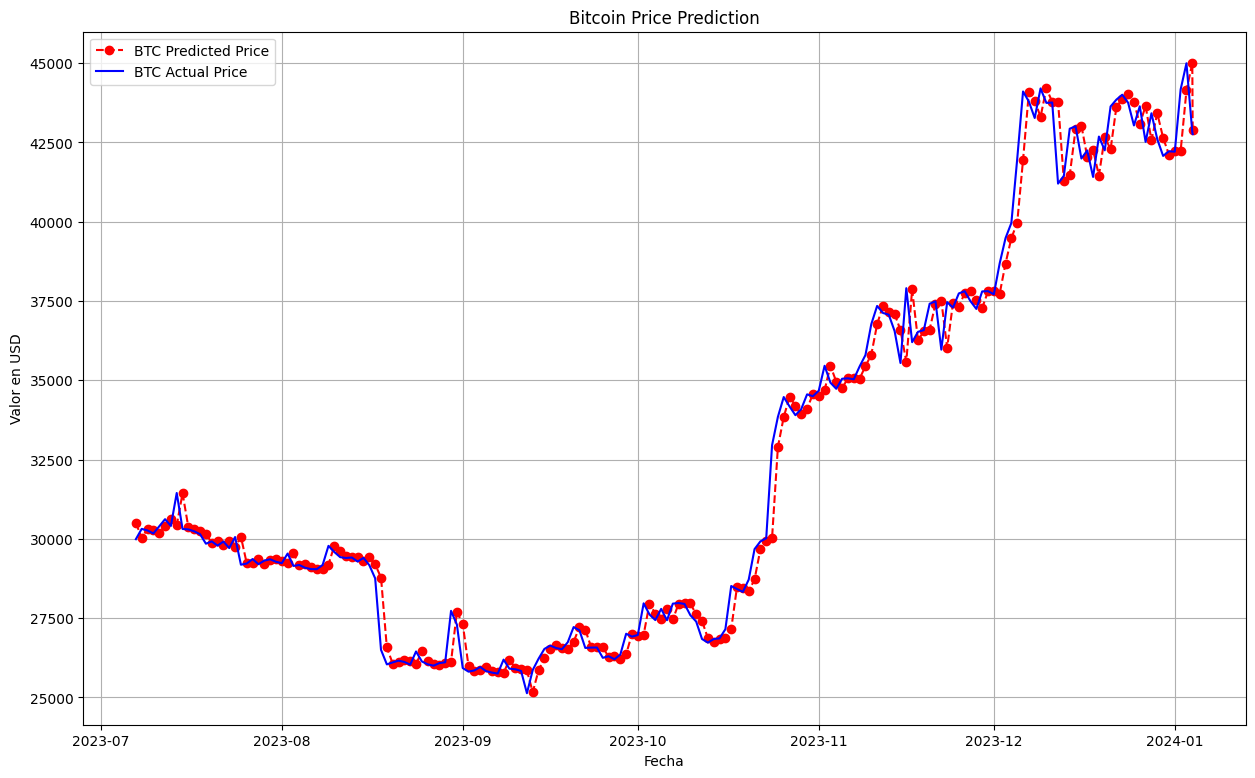

In [45]:
# Elegir una serie (por ejemplo, 'price')
serie = df_arima['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
n = len(serie)
train = list(serie[:round((n*0.9),)])
test = list(serie[round((n*0.9),):])

# Ajustar el modelo ARIMA (ajusta los parámetros según tu análisis)
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()

# Inicializar la lista para almacenar las predicciones
model_predictions = []
n_test_obser = len(test)

# Bucle para agregar las predicciones al modelo
for i in range(n_test_obser):
  model = ARIMA(train, order=(1,2,1))
  model_fit = model.fit()
  output = model_fit.forecast(steps=len(test))
  yhat = output[0]
  model_predictions.append(yhat)
  actual_test_value = test[i]
  train.append(actual_test_value)

# Plotear la imagen
plt.figure(figsize=(15, 9))
plt.grid(True)

date_range = df['timestamp'][round((n*0.9),):]
plt.plot(date_range, model_predictions[-len(date_range):], color='red', marker='o', linestyle='dashed', label='BTC Predicted Price')
plt.plot(date_range, test, color='blue', label='BTC Actual Price')

plt.title(f'{criptomoneda.capitalize()} Price Prediction')
plt.xlabel('Fecha')
plt.ylabel('Valor en USD')
plt.legend()
plt.show()

### Evaluar el Modelo

In [46]:
def evaluacion_modelo(y_true, y_pred):

  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  print('Evaluación del Modelo:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')

evaluacion_modelo(test, model_predictions)

Evaluación del Modelo:-
MSE is : 497075.006639727
MAE is : 446.5298897886024
RMSE is : 705.0354648099108
MAPE is : 1.3137575101748467
R2 is : 0.9866504112220673



### Gráfico de Autocorrelación ACF

Muestra la correlación entre la serie temporal y sus lags. Cada barra en el gráfico de ACF representa la correlación entre la serie y su lag correspondiente. Por ejemplo, la primera barra muestra la correlación de la serie consigo misma, por lo que siempre es 1. Las barras subsiguientes representan la correlación con el primer lag, el segundo lag, y así sucesivamente. Si las barras están dentro del área sombreada (el área de confianza), se considera que no hay correlación estadísticamente significativa entre esos lags y la serie. Barras que sobresalen significativamente del área sombreada indican una correlación estadísticamente significativa.

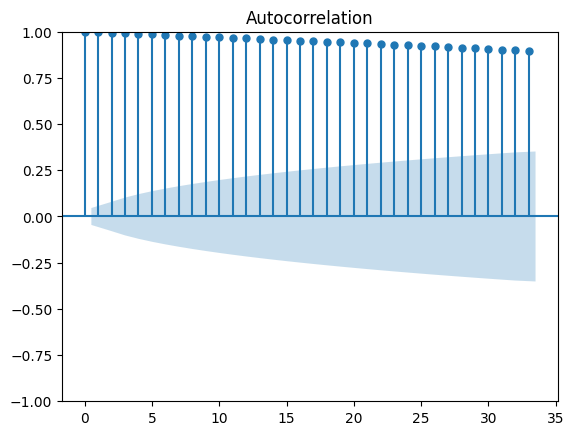

In [47]:
# Graficar autocorrelación (ACF)
plot_acf(serie)
plt.show()

El gráfico de autocorrelación muestra lo siguiente:

Alta Autocorrelación en Lags Iniciales: Las barras de autocorrelación son altas y positivas para los primeros lags, lo que indica una fuerte correlación positiva entre los valores de la serie temporal y sus lags iniciales.

Decaimiento Lento: La disminución gradual de las barras sugiere que la autocorrelación permanece significativa incluso en lags más altos. Este decaimiento lento es típico de una serie temporal que no es estacionaria, lo que podría implicar que la serie temporal tiene una tendencia o una raíz unitaria.

Significancia Estadística: Las barras que se extienden más allá de la banda azul sombreada indican autocorrelaciones que son estadísticamente significativas. En este gráfico, casi todas las barras son significativas, lo que confirma aún más la no estacionariedad y la presencia de autocorrelación en la serie temporal.

Necesidad de Diferenciación: Dado que la serie temporal parece no estacionaria, una diferenciación puede ser necesaria para eliminar la tendencia y alcanzar la estacionariedad antes de ajustar un modelo ARIMA. El parámetro d en ARIMA(p,d,q) sería mayor que cero.

Posible Modelo ARIMA: Para una serie temporal con estas características, podrías empezar considerando un modelo ARIMA con un término de diferenciación (d > 0). El número de términos AR (p) y MA (q) dependerá del análisis adicional de los gráficos PACF y de los resultados después de la diferenciación.

### Gráfico de Autocorrelación Parcial

Muestra la correlación entre la serie y sus lags después de eliminar los efectos de los lags intermedios. Es decir, el PACF en el lag k es la correlación entre la serie y su lag k-ésimo que no se explica por correlaciones en todos los lags 1 a k-1.

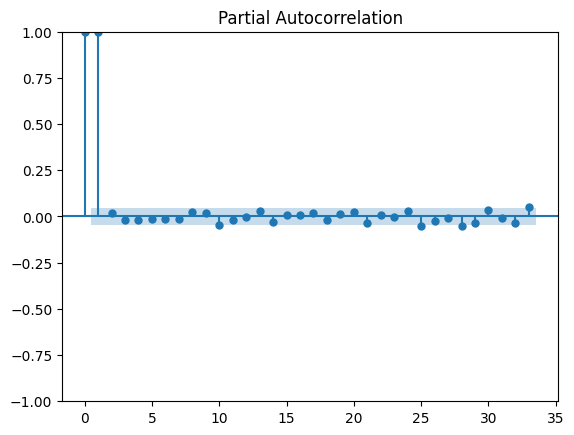

In [48]:
# Graficar PACF
plot_pacf(serie)
plt.show()

Significancia en el Primer Lag: La barra del primer lag es alta y se encuentra fuera del área sombreada, lo que sugiere una correlación parcial significativa en el primer lag. Esto implica que el primer lag tiene una fuerte relación directa con el valor actual de la serie, después de tener en cuenta las correlaciones intermedias.

Correlaciones Insignificantes en Lags Posteriores: Las barras correspondientes a los lags posteriores al primero están en su mayoría dentro del área sombreada, lo que indica que no hay correlaciones parciales significativas para esos lags. Esto sugiere que los lags más allá del primero no agregan información predictiva significativa adicional una vez que se ha tenido en cuenta el primer lag.

Modelo ARIMA Sugerido: Un gráfico PACF con una correlación parcial significativa en el primer lag y no significativas en los lags posteriores sugiere que un modelo AR(1) podría ser apropiado para la serie temporal. Esto significa que el modelo ARIMA podría configurarse con p=1, d (el grado de diferenciación) basado en la necesidad de hacer la serie estacionaria, y q=0, asumiendo que no hay una correlación significativa en los errores pasados una vez que se ha tomado en cuenta el primer lag.

Estacionariedad: Dado que las barras de PACF para lags más altos no son significativas, podría ser una indicación de que la serie temporal ya es estacionaria en términos de correlación parcial, aunque esto debe confirmarse con pruebas estadísticas de estacionariedad, como la prueba de Dickey-Fuller aumentada.

### Predicción

In [49]:
# Predecir los siguientes x días
steps = 10
model_predictions = model_fit.forecast(steps=steps)

# Identificar y guardar la última fecha del dataframe df_arima
last_date = df_arima['timestamp'].iloc[-1]

# Crear lista de los siguientes 10 días al último día del dataframe df_arima
prediction_dates = [last_date + pd.Timedelta(days=x) for x in range(1, steps + 1)]

# Selección de solo los últimos 30 días de df_arima para graficar
last_30_days = df_arima[-30:]

# Plotly
trace_actual = go.Scatter(x=last_30_days['timestamp'], y=last_30_days['price'], mode='lines+markers', name=f'Precio Actual de {criptomoneda.capitalize()}')
trace_predicted = go.Scatter(x=prediction_dates, y=model_predictions, mode='lines+markers', name=f'Predicción de {criptomoneda.capitalize()}')

# Crear la figura y agregar los datos
fig = go.Figure(data=[trace_actual, trace_predicted])

# Actualizar el diseño de la figura
fig.update_layout(
    title=f'Predicción de la Criptomoneda {criptomoneda.capitalize()} para los Próximos {steps} Días',
    xaxis_title='Fecha',
    yaxis_title='Valor en USD',
    legend_title='Leyenda',
    hovermode='x unified',
    template='plotly_dark'
)

fig.show()

En el estudio sobre los precios del Bitcoin, seleccioné y dividí los datos en un conjunto de entrenamiento y uno de prueba. Ajusté un modelo ARIMA que reflejó la autoregresión en los precios. Implementé un enfoque de predicción y visualicé los resultados con un gráfico que comparó las predicciones del modelo con los precios reales, lo que demostró que el modelo podía capturar la tendencia de los precios de manera efectiva.

Evalué el rendimiento del modelo con métricas estándar, obteniendo resultados que validaron su precisión. Los gráficos ACF y PACF confirmaron la idoneidad del modelo ARIMA elegido. Concluí que el modelo ARIMA es una herramienta potente para predecir los precios de Bitcoin y que la metodología empleada es sólida para la predicción en series temporales financieras.

## 3.5 K-Means y PCA: identificación de patrones en los precios, en la capitalización de mercado y en el volumen total de las criptomonedas.

### 3.5.1 Procesamiento de los datos y creación del Codo de Jambú: El procedimiento más adecuado para decidir la cantidad perfecta de clusters para una agrupación.

In [50]:
# Descargar los datos de la API Coingecko
df = datos_historicos('bitcoin',1825)
df_km = df.copy()

In [51]:
# Crear columnas día, mes y año
df_km['day'] = df_km['timestamp'].dt.day
df_km['month'] = df_km['timestamp'].dt.month
df_km['year'] = df_km['timestamp'].dt.year

In [52]:
# Eliminar columna timestamp
df_km.drop('timestamp', axis=1, inplace=True)

In [53]:
df_km

price    market_cap  total_volume  day  month  year
0      3787.307857  6.607097e+10  2.763832e+09    6      1  2019
1      4013.520091  7.008417e+10  3.435733e+09    7      1  2019
2      3989.668718  6.960213e+10  3.360164e+09    8      1  2019
3      3973.591255  6.941869e+10  3.482431e+09    9      1  2019
4      3982.225913  6.960928e+10  3.230523e+09   10      1  2019
...            ...           ...           ...  ...    ...   ...
1821  42208.202176  8.275962e+11  1.418373e+10    1      1  2024
1822  44168.681187  8.638049e+11  1.695900e+10    2      1  2024
1823  44994.673887  8.783950e+11  3.908995e+10    3      1  2024
1824  42821.558989  8.382084e+11  4.314616e+10    4      1  2024
1825  42762.409009  8.367607e+11  4.259114e+10    4      1  2024

[1826 rows x 6 columns]

In [54]:
# Escalar variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_km)
df_scaled

array([[-1.29982959, -1.30945785, -1.52901488, -1.105369  , -1.60170963,
        -1.41891376],
       [-1.28576295, -1.29634104, -1.48968069, -0.99173294, -1.60170963,
        -1.41891376],
       [-1.28724611, -1.29791654, -1.49410464, -0.87809687, -1.60170963,
        -1.41891376],
       ...,
       [ 1.26258329,  1.34555699,  0.59757515, -1.4462772 , -1.60170963,
         2.105211  ],
       [ 1.12745168,  1.21421033,  0.83503226, -1.33264113, -1.60170963,
         2.105211  ],
       [ 1.12377353,  1.20947862,  0.80254009, -1.33264113, -1.60170963,
         2.105211  ]])

In [55]:
df_km.shape

(1826, 6)

WCSS es la suma de las distancias al cuadrado entre cada punto de un cluster y el centroide de ese cluster. Un valor bajo de WCSS indica que los puntos dentro de un cluster son similares entre sí, lo que sugiere un buen agrupamiento. Esta métrica se utiliza comúnmente para determinar el número óptimo de clusters al graficar WCSS contra el número de clusters y buscando el punto donde la disminución de WCSS se estabiliza, conocido como el "método del codo".

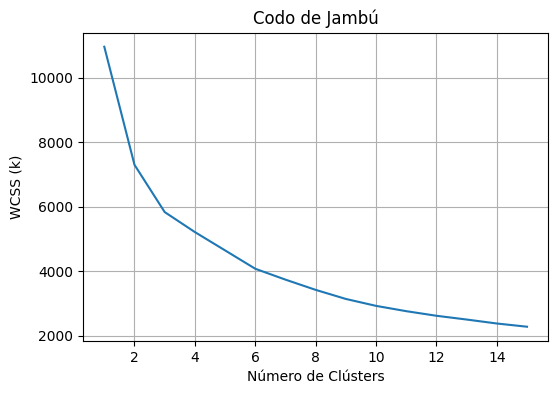

In [56]:
# Codo de Jambú
wcss = []
for i in range(1,16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.grid()
plt.plot(range(1,16), wcss)
plt.title('Codo de Jambú')
plt.xlabel('Número de Clústers')
plt.ylabel('WCSS (k)')
plt.show()

### 3.5.2 Creación del Modelo K-Means: Clustering mediante Patrones.

In [57]:
# Crear el modelo
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_scaled)

In [58]:
# Crear etiquetas para cada registro que ajusto el modelo
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [59]:
# Cantidad de etiquetas
labels.shape

(1826,)

In [60]:
# Etiqueta menor y mayor
labels.min(), labels.max()

(0, 2)

In [61]:
# Crear dataframe con los centroides (están escalados)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_km.columns])
cluster_centers

price market_cap total_volume       day     month      year
0 -0.961792  -0.976854    -0.187008  0.009362  0.007770 -1.064071
1  0.186228   0.216150    -0.394101  0.032782  0.081660  1.026768
2  1.407722   1.382995     1.019014 -0.073621 -0.155416  0.135899

In [62]:
# Transformación escalar inversa (desescalar xD)
cluster_centers = scaler.inverse_transform(cluster_centers)

# Transformar a dataframe
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_km.columns])
cluster_centers

price    market_cap  total_volume        day     month         year
0   9223.446744  1.678338e+11  2.568782e+10  15.809655  6.550345  2019.503448
1  27685.304710  5.328434e+11  2.215028e+10  16.015759  6.805158  2022.469914
2  47328.715364  8.898494e+11  4.628892e+10  15.079404  5.987593  2021.205955

#### Categorización de los centroides

Centroide 0: Tiene un precio bajo, una capitalización de mercado y un volumen total relativamente bajos en comparación con los otros centroides, correspondientes al año 2019.

Centroide 1: Muestra un precio, una capitalización de mercado y un volumen total significativamente más altos que el Centroide 0, y está asociado al año 2022.

Centroide 2: Presenta los valores más altos en todas las métricas económicas y está vinculado al año 2021.

Estos centroides estan indicando distintas etapas o condiciones del mercado de criptomonedas en diferentes años. El análisis detallado de estos clusters podría proporcionar insights sobre el comportamiento del mercado en cada uno de esos periodos.

In [63]:
# Concatenar las etiquetas (labels) de los clusters con el dataset original (df_km)
df_cluster = pd.concat([df_km, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

price    market_cap  total_volume  day  month  year  cluster
0  3787.307857  6.607097e+10  2.763832e+09    6      1  2019        0
1  4013.520091  7.008417e+10  3.435733e+09    7      1  2019        0
2  3989.668718  6.960213e+10  3.360164e+09    8      1  2019        0
3  3973.591255  6.941869e+10  3.482431e+09    9      1  2019        0
4  3982.225913  6.960928e+10  3.230523e+09   10      1  2019        0

In [74]:
# Obtener la frecuencia de cada cluster

cantidad_registros_0 = 0
cantidad_registros_1 = 0
cantidad_registros_2 = 0

for i in df_cluster['cluster']:
    if i == 0:
        cantidad_registros_0 += 1
    elif i == 1:
        cantidad_registros_1 += 1
    else:
        cantidad_registros_2 += 1
total = cantidad_registros_0 + cantidad_registros_1 + cantidad_registros_2
print(f'Cluster 0: {cantidad_registros_0} registros, un {round(cantidad_registros_0*100/total,)}% del total. \nCluster 1: {cantidad_registros_1} registros, un {round(cantidad_registros_1*100/total,)}% del total. \nCluster 2: {cantidad_registros_2} registros, un {round(cantidad_registros_2*100/total,)}% del total.')
print(f'')

Cluster 0: 725 registros, un 40% del total. 
Cluster 1: 697 registros, un 38% del total. 
Cluster 2: 404 registros, un 22% del total.



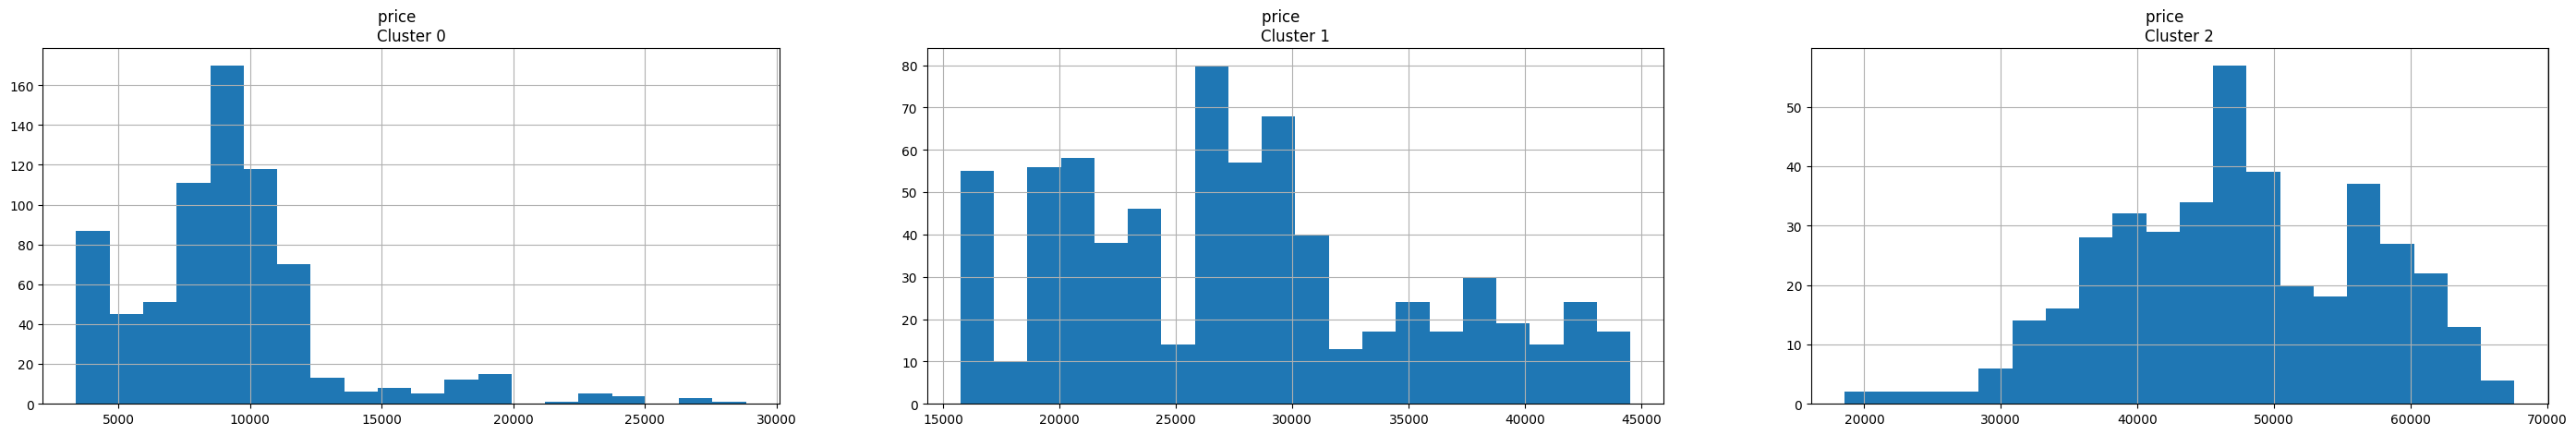

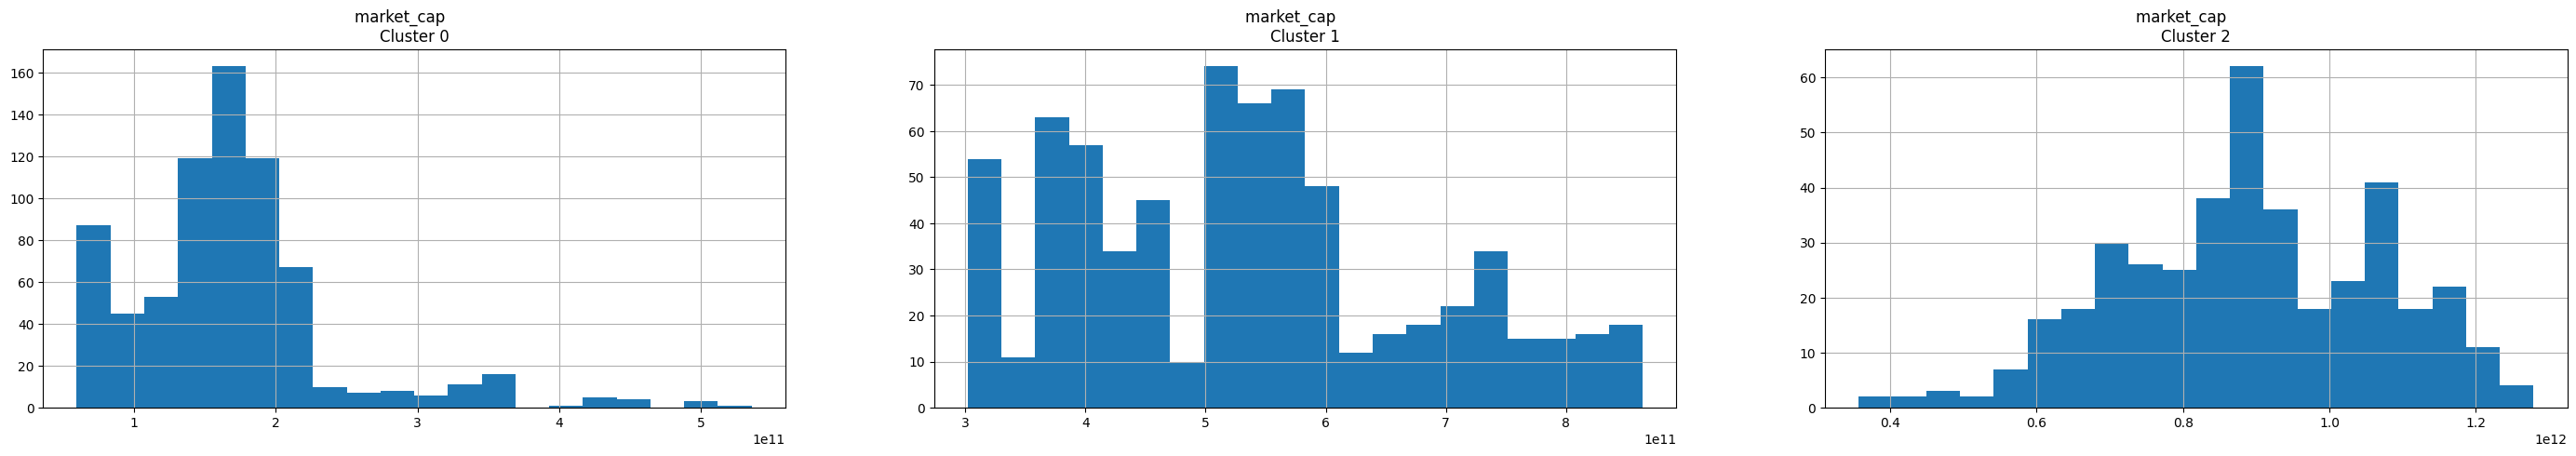

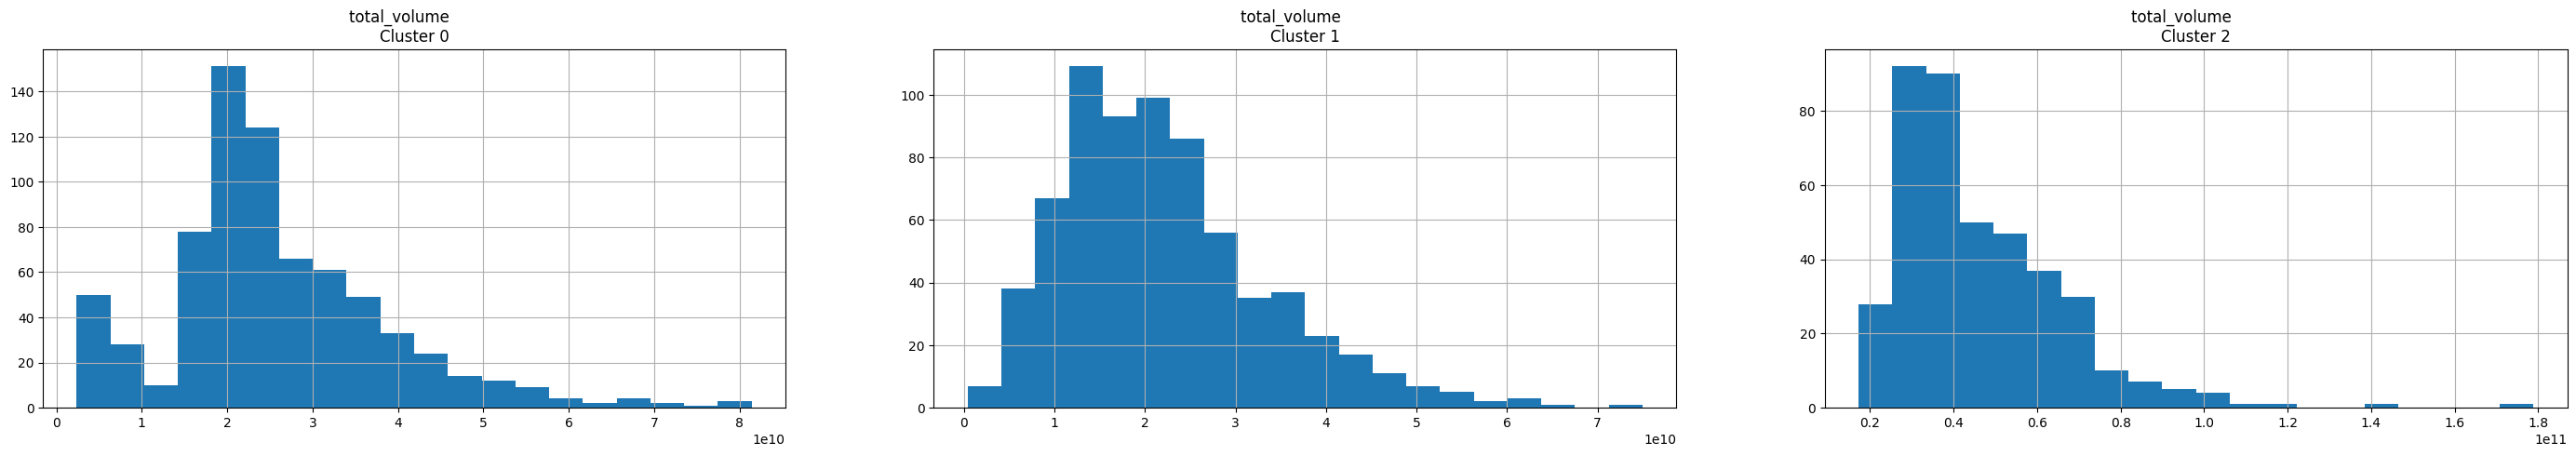

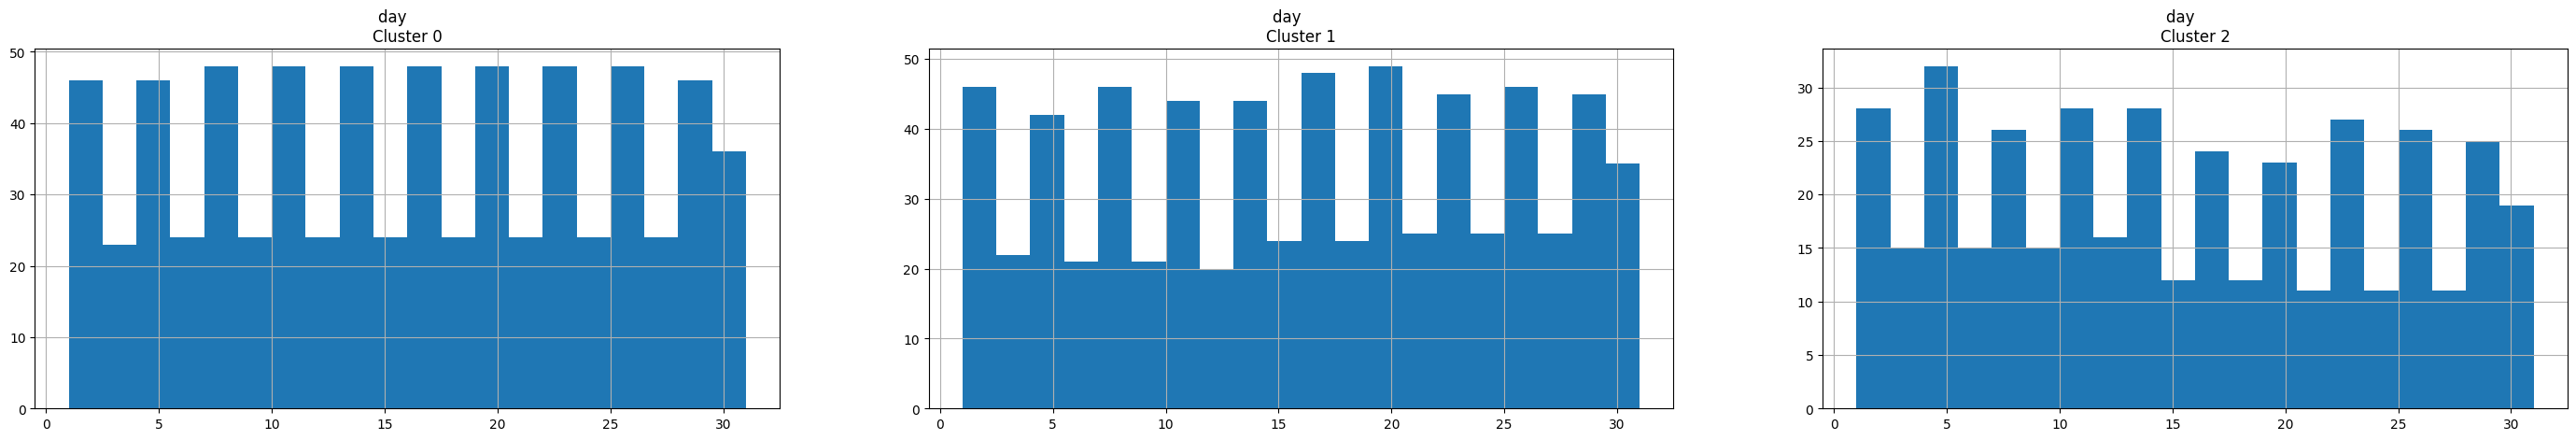

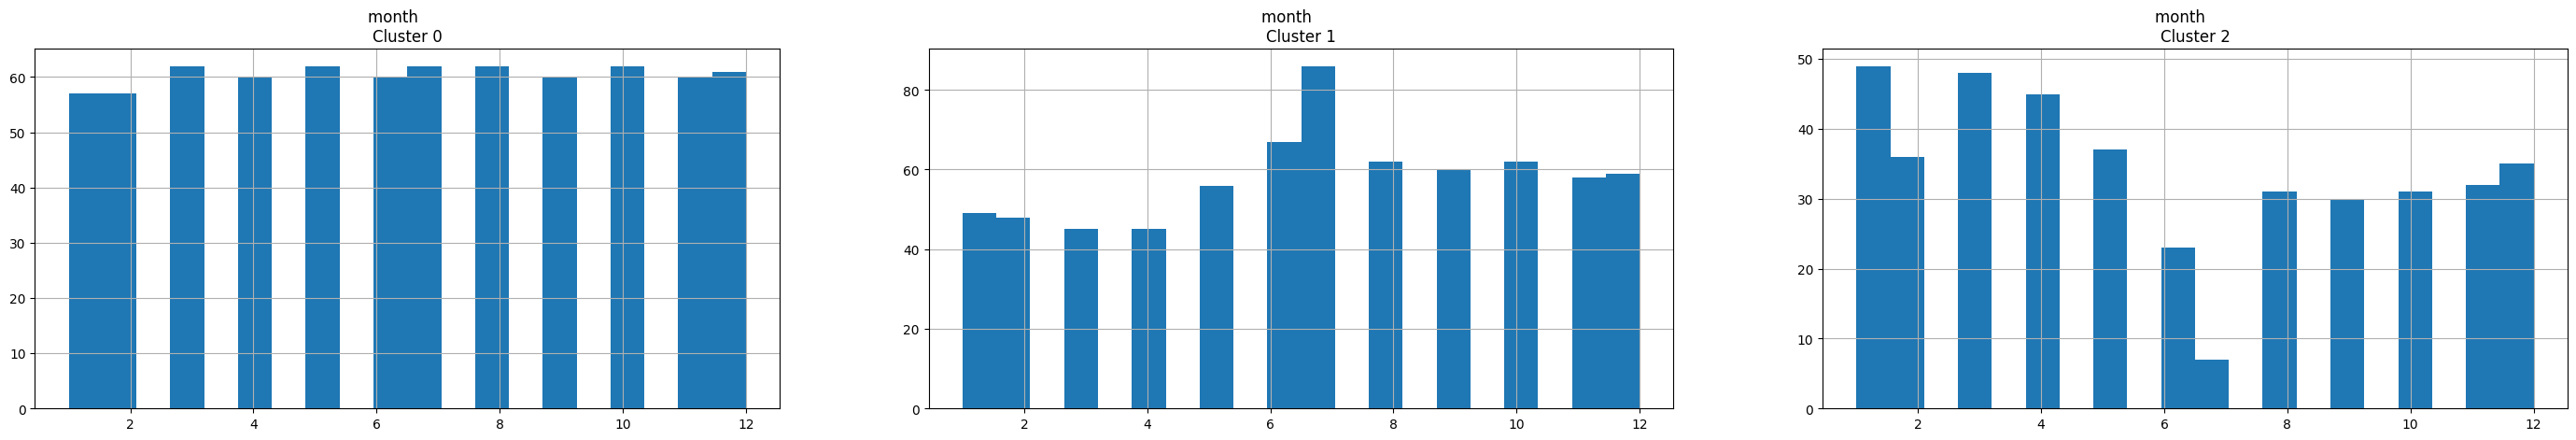

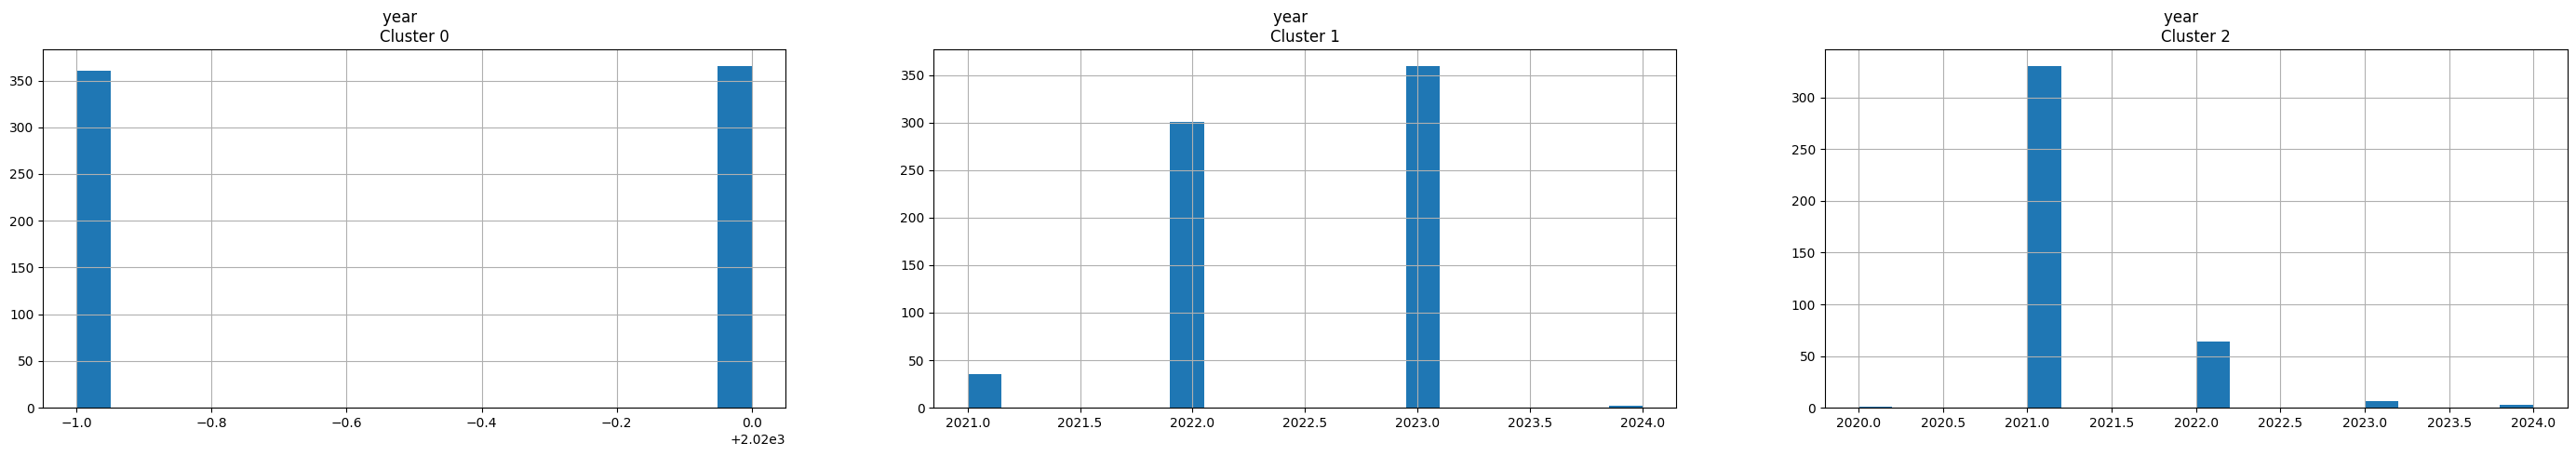

In [65]:
# Graficar histogramas para cada variable de cada cluster

for i in df_km.columns:
    plt.figure(figsize = (35,5)) # grafico
    for j in range(3): # 3 gráficos para cada una de las columnas del bucle anterior
        plt.subplot(1,3,j+1) # dibujar en 1 fila, 8 columnas, donde el actual sea j+1
        cluster = df_cluster[df_cluster['cluster'] == j] # me quedo con los clientes marcados en el cluster j-ésimo
        cluster[i].hist(bins = 20) # dibujamos un histograma para la columna i-ésima, con el número total de divisiones sea de 20, para compararlos graficamente entre sí
        plt.title('{}      \nCluster {}'.format(i,j)) # título para cada gráfico
    plt.show()

### 3.5.3 Análisis de Componentes Principales: Identificando clústers gráficamente.

In [68]:
# PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[-2.57248241,  0.65514195],
       [-2.54734482,  0.67568151],
       [-2.55201315,  0.66835725],
       ...,
       [ 2.68487957,  0.79613304],
       [ 2.58132895,  0.95779415],
       [ 2.56779531,  0.93662801]])

In [69]:
# Crear Dataframe
df_pca = pd.DataFrame(data = principal_components, columns = ['pca1','pca2'])
df_pca.head()

pca1      pca2
0 -2.572482  0.655142
1 -2.547345  0.675682
2 -2.552013  0.668357
3 -2.552799  0.668630
4 -2.557548  0.654336

In [70]:
# Concatenar las etiquetas a los componentes principales
df_pca = pd.concat([df_pca, pd.DataFrame({'cluster':labels})], axis = 1 )
df_pca.head()

pca1      pca2  cluster
0 -2.572482  0.655142        0
1 -2.547345  0.675682        0
2 -2.552013  0.668357        0
3 -2.552799  0.668630        0
4 -2.557548  0.654336        0

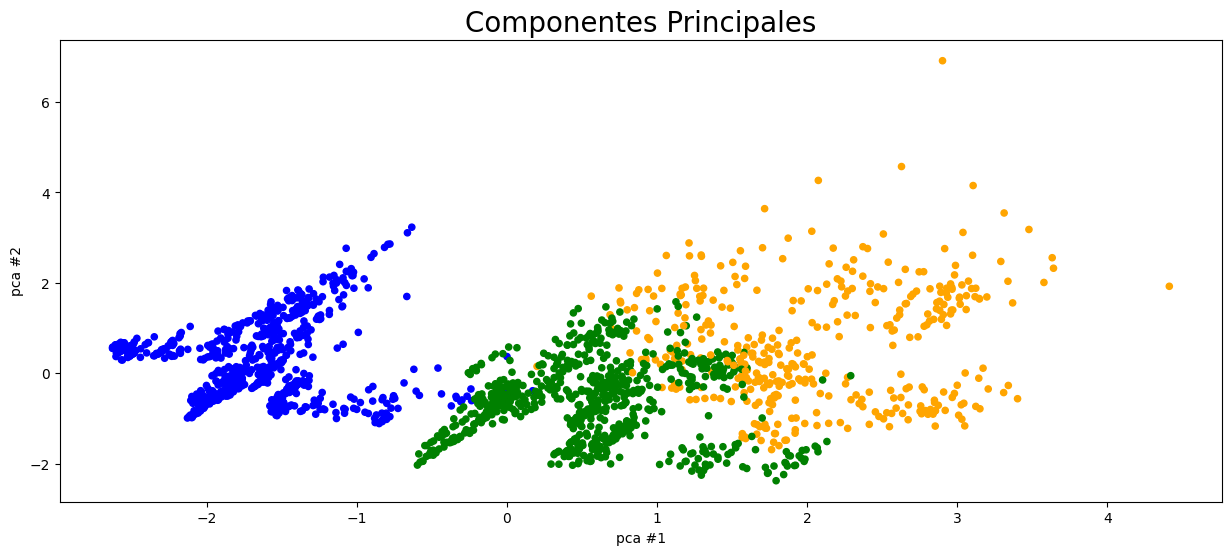

In [73]:
# visualizar
fig = plt.figure(figsize = (15,6))

# Creamos solo un gráfico dentro de la figura
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('pca #1', fontsize = 10)
ax.set_ylabel('pca #2', fontsize = 10)
ax.set_title('Componentes Principales', fontsize = 20)

# Crear un array con ocho colores para cada cluster
color_theme = np.array(['blue', 'green', 'orange'])

# Graficar
ax.scatter(x = df_pca.pca1, y = df_pca.pca2, c = color_theme[df_pca.cluster], s = 20)
plt.show()

Los clusters identificados por colores (azul, verde y naranja) parecen tener variaciones internas, con algunos puntos más dispersos que otros, lo que puede indicar variabilidad dentro de los grupos.

Los grupos están bien definidos y separados, lo que indica que la variabilidad en los datos puede ser explicada eficazmente por estas dos componentes principales.

La dirección de la dispersión de los puntos sugiere las principales variaciones en los datos; por ejemplo, un grupo podría estar disperso a lo largo de la componente principal 1 (horizontal), mientras otro a lo largo de la componente principal 2 (vertical).

No hay una superposición significativa entre los grupos, lo que sugiere una buena clasificación por el algoritmo k-means.

El grupo de color naranja se extiende más a lo largo del eje horizontal (PCA1), lo que podría indicar que esta componente tiene una mayor varianza en este grupo comparado con los otros dos.

## 3.6 K-Means y PCA: identificación de patrones en las primeras 250 criptomonedas ordenadas por capitalización de mercado.

### 3.6.1 Preprocesamiento de los datos y creación del Codo de Jambú: El procedimiento más adecuado para decidir la cantidad perfecta de clusters para una agrupación.

In [148]:
# Descargar los datos de la API Coingecko
df_km = df_propiedades_avanzadas.copy()

id symbol           name  \
0                  bitcoin    btc        Bitcoin   
1                 ethereum    eth       Ethereum   
2                   tether   usdt         Tether   
3              binancecoin    bnb            BNB   
4                   solana    sol         Solana   
..                     ...    ...            ...   
245  jito-governance-token    jto           Jito   
246              swissborg   borg      SwissBorg   
247          vulcan-forged    pyr  Vulcan Forged   
248                   blox    cdt           Blox   
249            bitkub-coin    kub    Bitkub Coin   

                                                 image  current_price  \
0    https://assets.coingecko.com/coins/images/1/la...   43110.000000   
1    https://assets.coingecko.com/coins/images/279/...    2231.360000   
2    https://assets.coingecko.com/coins/images/325/...       1.002000   
3    https://assets.coingecko.com/coins/images/825/...     315.430000   
4    https://assets.coingecko.com/coins/images/4128...     100.640000   
..                                                 ...            ...   
245  https://assets.coingecko.com/coins/images/3322...       1.570000   
246  https://assets.coingecko.com/coins/images/2117...       0.181451   
247  https://assets.coingecko.com/coins/images/1477...       7.450000   
248  https://assets.coingecko.com/coins/images/1231...       0.264309   
249  https://assets.coingecko.com/coins/images/1576...       2.000000   

       market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0    844199488770                1             9.050057e+11  3.718944e+10   
1    267960604858                2             2.679606e+11  3.374988e+10   
2     92252485891                3             9.225249e+10  6.824140e+10   
3     48490435084                4             4.849044e+10  3.056279e+09   
4     43247805100                5             5.693276e+10  5.361597e+09   
..            ...              ...                      ...           ...   
245     180508009              246             1.569635e+09  1.240698e+08   
246     178619729              247             1.786197e+08  3.942992e+06   
247     177984947              249             3.723893e+08  2.558326e+07   
248     177854111              248             2.636519e+08  1.768090e+05   
249     177715708              250             2.200194e+08  1.666269e+06   

         high_24h       low_24h  price_change_24h  \
0    45469.000000  41805.000000      -2149.135767   
1     2383.280000   2148.360000       -138.304393   
2        1.008000      0.988917          0.001919   
3      332.710000    301.090000          2.320000   
4      109.780000     93.680000         -7.131896   
..            ...           ...               ...   
245      1.930000      1.510000         -0.348342   
246      0.190775      0.174415         -0.003972   
247      8.250000      7.310000         -0.783758   
248      0.281856      0.215434          0.003285   
249      2.120000      1.950000         -0.100334   

     price_change_percentage_24h  market_cap_change_24h  \
0                       -4.74851          -4.228993e+10   
1                       -5.83645          -1.651862e+10   
2                        0.19180           1.578077e+08   
3                        0.74191           3.325182e+08   
4                       -6.61769          -3.126606e+09   
..                           ...                    ...   
245                    -18.15597          -4.028433e+07   
246                     -2.14235          -3.893299e+06   
247                     -9.52140          -1.867533e+07   
248                      1.25868           1.687406e+06   
249                     -4.77411          -8.417785e+06   

     market_cap_change_percentage_24h  circulating_supply  total_supply  \
0                            -4.77049        1.958904e+07  2.100000e+07   
1                            -5.80662        1.201855e+08  1.201855e+08   
2                         

In [149]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      250 non-null    object 
 1   symbol                                  250 non-null    object 
 2   name                                    250 non-null    object 
 3   image                                   250 non-null    object 
 4   current_price                           250 non-null    float64
 5   market_cap                              250 non-null    int64  
 6   market_cap_rank                         250 non-null    int64  
 7   fully_diluted_valuation                 243 non-null    float64
 8   total_volume                            250 non-null    float64
 9   high_24h                                250 non-null    float64
 10  low_24h                                 250 non-null    float6

In [150]:
# Eliminar columnas de tipo objeto, a excepción de la columna ID
df_km.drop(['symbol', 'name', 'image', 'ath_date','atl_date', 'roi', 'last_updated'], axis=1, inplace=True)

id  current_price    market_cap  market_cap_rank  \
0                  bitcoin   43110.000000  844199488770                1   
1                 ethereum    2231.360000  267960604858                2   
2                   tether       1.002000   92252485891                3   
3              binancecoin     315.430000   48490435084                4   
4                   solana     100.640000   43247805100                5   
..                     ...            ...           ...              ...   
245  jito-governance-token       1.570000     180508009              246   
246              swissborg       0.181451     178619729              247   
247          vulcan-forged       7.450000     177984947              249   
248                   blox       0.264309     177854111              248   
249            bitkub-coin       2.000000     177715708              250   

     fully_diluted_valuation  total_volume      high_24h       low_24h  \
0               9.050057e+11  3.718944e+10  45469.000000  41805.000000   
1               2.679606e+11  3.374988e+10   2383.280000   2148.360000   
2               9.225249e+10  6.824140e+10      1.008000      0.988917   
3               4.849044e+10  3.056279e+09    332.710000    301.090000   
4               5.693276e+10  5.361597e+09    109.780000     93.680000   
..                       ...           ...           ...           ...   
245             1.569635e+09  1.240698e+08      1.930000      1.510000   
246             1.786197e+08  3.942992e+06      0.190775      0.174415   
247             3.723893e+08  2.558326e+07      8.250000      7.310000   
248             2.636519e+08  1.768090e+05      0.281856      0.215434   
249             2.200194e+08  1.666269e+06      2.120000      1.950000   

     price_change_24h  price_change_percentage_24h  market_cap_change_24h  \
0        -2149.135767                     -4.74851          -4.228993e+10   
1         -138.304393                     -5.83645          -1.651862e+10   
2            0.001919                      0.19180           1.578077e+08   
3            2.320000                      0.74191           3.325182e+08   
4           -7.131896                     -6.61769          -3.126606e+09   
..                ...                          ...                    ...   
245         -0.348342                    -18.15597          -4.028433e+07   
246         -0.003972                     -2.14235          -3.893299e+06   
247         -0.783758                     -9.52140          -1.867533e+07   
248          0.003285                      1.25868           1.687406e+06   
249         -0.100334                     -4.77411          -8.417785e+06   

     market_cap_change_percentage_24h  circulating_supply  total_supply  \
0                            -4.77049        1.958904e+07  2.100000e+07   
1                            -5.80662        1.201855e+08  1.201855e+08   
2                             0.17135        9.204799e+10  9.204799e+10   
3                             0.69047        1.538562e+08  1.538562e+08   
4                            -6.74209        4.301149e+08  5.662166e+08   
..                                ...                 ...           ...   
245                         -18.24535        1.150000e+08  1.000000e+09   
246                          -2.13316        9.845049e+08  9.845049e+08   
247                          -9.49624        2.389770e+07  5.000000e+07   
248                           0.95785        6.745792e+08  1.000000e+09   
249                          -4.52244        8.885000e+07  1.100000e+08   

       max_supply           ath  ath_change_percentage        atl  \
0    2.100000e+07  69045.000000              -37.82761  67.810000   
1             NaN   4878.260000              -54.44893   0.432979   
2             NaN      1.320000              -24.39135   0.572521   
3    2.000000e+08    686.310000              -54.26671   0.039818   
4             NaN    259.960000              -61.51

In [151]:
# Identificar nulos
df_km.isnull().sum().sort_values(ascending = False)

max_supply                                103
fully_diluted_valuation                     7
total_supply                                5
id                                          0
market_cap_change_percentage_24h            0
atl_change_percentage                       0
atl                                         0
ath_change_percentage                       0
ath                                         0
circulating_supply                          0
market_cap_change_24h                       0
current_price                               0
price_change_percentage_24h                 0
price_change_24h                            0
low_24h                                     0
high_24h                                    0
total_volume                                0
market_cap_rank                             0
market_cap                                  0
price_change_percentage_1h_in_currency      0
dtype: int64

***Observación de las Variables***

id: Identificador único de la criptomoneda.

symbol: Símbolo corto de la criptomoneda, como BTC para Bitcoin.

name: Nombre completo de la criptomoneda.

image: URL de la imagen de la criptomoneda.

current_price: Precio actual de la criptomoneda.

market_cap: Capitalización de mercado total, calculada multiplicando el precio actual por el suministro circulante.

market_cap_rank: Rango de la criptomoneda basado en su capitalización de mercado.

fully_diluted_valuation: Valoración totalmente diluida, calculada usando el precio actual y el suministro máximo.

total_volume: Volumen total de trading en las últimas 24 horas.

high_24h: El precio más alto en las últimas 24 horas.

low_24h: El precio más bajo en las últimas 24 horas.

price_change_24h: Cambio en el precio en las últimas 24 horas.

price_change_percentage_24h: Cambio porcentual en el precio en las últimas 24 horas.

market_cap_change_24h: Cambio en la capitalización de mercado en las últimas 24 horas.

market_cap_change_percentage_24h: Cambio porcentual en la capitalización de mercado en las últimas 24 horas.

circulating_supply: Cantidad de monedas en circulación.

total_supply: Cantidad total de monedas que existirán en total.

max_supply: Máximo número de monedas que existirán.

ath (All-Time High): Precio más alto de todos los tiempos de la criptomoneda.

ath_change_percentage: Cambio porcentual desde el precio más alto de todos los tiempos.

ath_date: Fecha en que se alcanzó el precio más alto de todos los tiempos.

atl (All-Time Low): Precio más bajo de todos los tiempos de la criptomoneda.

atl_change_percentage: Cambio porcentual desde el precio más bajo de todos los tiempos.

atl_date: Fecha en que se alcanzó el precio más bajo de todos los tiempos.

roi (Return on Investment): Retorno de la inversión desde la fecha de lanzamiento de la moneda.

last_updated: Última vez que se actualizó la información de la moneda.

price_change_percentage_1h_in_currency: Cambio porcentual del precio en la última hora en una moneda específica.

Frecuencia de caché/actualización: cada 45 segundos.

In [152]:
# Identificar filas duplicadas
df_km.duplicated().sum()

0

In [153]:
# Eliminar la columna con datos nulos y otras que no aportan significativamente al modelo
df_km.drop(['max_supply'], axis=1, inplace = True)
df_km.drop(['market_cap_rank'], axis=1, inplace = True)
df_km.drop(['high_24h'], axis=1, inplace = True)
df_km.drop(['low_24h'], axis=1, inplace = True)
df_km.drop(['price_change_24h'], axis=1, inplace = True)
df_km.drop(['market_cap_change_24h'], axis=1, inplace = True)

In [155]:
# Imputar nulos por el promedio de su columna
df_km.fillna(df_km.mean(), inplace=True)

<ipython-input-155-6e69cf84ea64>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [157]:
# Preparar un dataframe igual a df_km, pero sin la columna ID
df_scaled = df_km.copy()
df_scaled.drop(['id'], axis = 1, inplace = True)

# Escalar variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

array([[ 8.58948297, 14.90216947, 14.96363364, ..., -0.03706757,
        -0.02113908, -0.1419437 ],
       [ 0.31479496,  4.64884105,  4.33461804, ..., -0.12931715,
         0.39733635, -0.06637334],
       [-0.13667594,  1.52237198,  1.40295044, ..., -0.12912609,
        -0.07985936, -0.70312747],
       ...,
       [-0.13537073, -0.11595914, -0.13005728, ..., -0.12832174,
        -0.07942787, -0.02839459],
       [-0.13682527, -0.11596147, -0.13187155, ..., -0.12990771,
        -0.06517473,  2.76125241],
       [-0.13647393, -0.11596393, -0.13259955, ..., -0.12938699,
        -0.07953828, -0.59946965]])

In [158]:
df_scaled.shape

(250, 13)

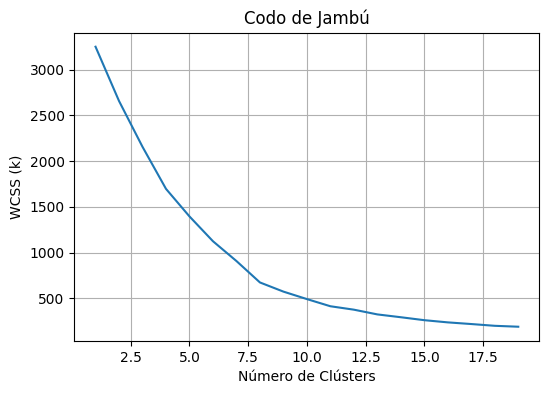

In [160]:
# Codo de Jambú
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.grid()
plt.plot(range(1,20), wcss)
plt.title('Codo de Jambú')  # Título del gráfico
plt.xlabel('Número de Clústers')  # Etiqueta del eje x
plt.ylabel('WCSS (k)')  # Etiqueta del eje y
plt.show()

### 3.6.2 Creación del Modelo K-Means: Clustering mediante Patrones.

In [161]:
# Crear el modelo
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_scaled)

In [162]:
# Crear etiquetas para cada registro que ajusto el modelo
labels = kmeans.labels_
labels

array([2, 7, 7, 4, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 1, 4, 5, 4, 0, 0,
       0, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 4, 4, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0,
       0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4,
       4, 0, 1, 0, 4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 0, 0, 4, 4,
       4, 0, 0, 0, 0, 0, 4, 0], dtype=int32)

In [163]:
# Cantidad de etiquetas
labels.shape

(250,)

In [164]:
# Etiqueta menor y mayor
labels.min(), labels.max()

(0, 7)

In [165]:
# Hacer una copia de df_km para entregar el nombre de las columnas a cluster_centers
df_centroides = df_km.copy()
df_centroides.drop(['id'], axis = 1, inplace = True)

In [166]:
# Crear dataframe con los centroides (están escalados)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_centroides.columns])
cluster_centers

current_price market_cap fully_diluted_valuation total_volume  \
0     -0.121811  -0.090537               -0.091095    -0.125314   
1      9.175491  -0.054586               -0.075752    -0.125657   
2      8.589483  14.902169               14.963634     6.660333   
3     -0.136879  -0.115607               -0.126798    -0.158928   
4     -0.085360  -0.074823               -0.068410    -0.049346   
5     -0.136879  -0.018540                0.023781    -0.085720   
6     -0.136751  -0.114298               -0.125735     0.003895   
7      0.089060   3.085607                2.868784     9.192095   

  price_change_percentage_24h market_cap_change_percentage_24h  \
0                   -0.360597                        -0.366826   
1                    0.228361                         0.207160   
2                    0.197810                         0.186872   
3                   -0.354733                        -0.363625   
4                    0.647903                         0.662615   
5                   -0.401343                        -0.407833   
6                    9.855848                         9.856143   
7                    0.432092                         0.424219   

  circulating_supply total_supply       ath ath_change_percentage       atl  \
0          -0.063994    -0.063777 -0.082989             -0.544990 -0.117299   
1          -0.065609    -0.065540  8.687129              0.564594  9.347188   
2          -0.065609    -0.065540  5.007942              1.168216 -0.037068   
3          15.777237    15.778753 -0.140192             -0.279625 -0.129910   
4          -0.062616    -0.062772 -0.108804              1.142072  0.019242   
5          -0.001808    -0.027816 -0.140192             -0.641739 -0.129910   
6          -0.065609    -0.065540 -0.140051              0.071336 -0.129865   
7          -0.065604    -0.065538  0.041724              1.111776 -0.129222   

  atl_change_percentage price_change_percentage_1h_in_currency  
0             -0.066036                              -0.016990  
1             -0.079173                              -0.106931  
2             -0.021139                              -0.141944  
3             -0.078694                              -0.792152  
4             -0.062148                              -0.044612  
5             15.704201                              -0.069530  
6             -0.078339                               8.197874  
7              0.158738                              -0.384750

In [167]:
# Transformación escalar inversa (desescalar xD)
cluster_centers = scaler.inverse_transform(cluster_centers)

# Transformar a dataframe
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_centroides.columns])
cluster_centers

current_price    market_cap fully_diluted_valuation  total_volume  \
0  7.443590e+01  1.606691e+09            2.707571e+09  1.859737e+08   
1  4.600500e+04  3.627153e+09            3.627153e+09  1.841059e+08   
2  4.311000e+04  8.441995e+11            9.050057e+11  3.718944e+10   
3  1.351054e-09  1.977993e+08            5.677246e+08  2.669325e+06   
4  2.545116e+02  2.489837e+09            4.067185e+09  6.002426e+08   
5  9.590000e-06  5.652939e+09            9.592608e+09  4.018882e+08   
6  6.315380e-01  2.713489e+08            6.314655e+08  8.905748e+08   
7  1.116181e+03  1.801065e+11            1.801065e+11  5.099564e+10   

  price_change_percentage_24h market_cap_change_percentage_24h  \
0                   -9.339539                        -9.326227   
1                   -4.497330                        -4.603560   
2                   -4.748510                        -4.770490   
3                   -9.291330                        -9.299890   
4                   -1.048008                        -0.856146   
5                   -9.674540                        -9.663630   
6                   74.656520                        74.786770   
7                   -2.822325                        -2.817635   

  circulating_supply  total_supply           ath ath_change_percentage  \
0       1.491719e+13  4.672012e+13  7.671910e+02            -86.168213   
1       8.356925e+04  8.356950e+04  1.183890e+05            -54.859665   
2       1.958904e+07  2.100000e+07  6.904500e+04            -37.827610   
3       1.463310e+17  4.200000e+17  6.345090e-09            -78.680540   
4       2.764011e+13  7.336308e+13  4.209619e+02            -38.565300   
5       5.892912e+14  9.999824e+14  8.616000e-05            -88.898130   
6       4.297129e+08  1.000000e+09  1.890000e+00            -68.777670   
7       4.608409e+10  4.608409e+10  2.439790e+03            -39.420140   

            atl atl_change_percentage price_change_percentage_1h_in_currency  
0  9.211116e+00          1.493670e+04                               1.144227  
1  6.921860e+03          8.131085e+02                               0.995783  
2  6.781000e+01          6.320543e+04                               0.937995  
3  9.477219e-11          1.327299e+03                              -0.135154  
4  1.089371e+02          1.911649e+04                               1.098637  
5  5.636025e-11          1.696966e+07                               1.057512  
6  3.262537e-02          1.709684e+03                              14.702611  
7  5.027500e-01          2.565934e+05                               0.537250

#### Categorización de los centroides

**Centroide 0**: Criptomoneda de precio bajo con una capitalización y valoración total moderadas, experimentando una caída significativa en las últimas 24 horas.

**Centroide 1**: Criptomoneda de alto valor, con un volumen considerable y una caída moderada en las últimas 24 horas, con una oferta limitada y un valor histórico alto.

**Centroide 2**: Criptomoneda importante con una de las mayores capitalizaciones de mercado, mostrando una disminución similar en precio y valor de mercado en el último día.

Centroide 3: Criptoactivo con un precio extremadamente bajo, valoración diluida relativamente alta y una disminución drástica en las últimas 24 horas, con una oferta circulante masiva.

Centroide 4: Activo de precio medio, con capitalización y valoración total considerables, con una ligera caída en las últimas 24 horas y una gran oferta circulante.

Centroide 5: Criptomoneda con valoración muy baja por unidad, pero con una capitalización de mercado sorprendentemente alta y una gran cantidad de tokens en circulación.

Centroide 6: Criptoactivo con un precio unitario bajo, experimentando un notable aumento en las últimas 24 horas, con una oferta circulante y total en el rango medio.

***Centroide 7***: Criptomoneda de alto valor con una sólida capitalización de mercado, enfrentando una leve caída en las últimas 24 horas y con una oferta circulante que coincide con su oferta total.

In [168]:
# Concatenar las etiquetas (labels) de los clusters con el dataset original (df_km)
df_cluster = pd.concat([df_km, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

id  current_price    market_cap  fully_diluted_valuation  \
0      bitcoin      43110.000  844199488770             9.050057e+11   
1     ethereum       2231.360  267960604858             2.679606e+11   
2       tether          1.002   92252485891             9.225249e+10   
3  binancecoin        315.430   48490435084             4.849044e+10   
4       solana        100.640   43247805100             5.693276e+10   

   total_volume  price_change_percentage_24h  \
0  3.718944e+10                     -4.74851   
1  3.374988e+10                     -5.83645   
2  6.824140e+10                      0.19180   
3  3.056279e+09                      0.74191   
4  5.361597e+09                     -6.61769   

   market_cap_change_percentage_24h  circulating_supply  total_supply  \
0                          -4.77049        1.958904e+07  2.100000e+07   
1                          -5.80662        1.201855e+08  1.201855e+08   
2                           0.17135        9.204799e+10  9.204799e+10   
3                           0.69047        1.538562e+08  1.538562e+08   
4                          -6.74209        4.301149e+08  5.662166e+08   

        ath  ath_change_percentage        atl  atl_change_percentage  \
0  69045.00              -37.82761  67.810000            63205.43311   
1   4878.26              -54.44893   0.432979           513112.13542   
2      1.32              -24.39135   0.572521               74.73150   
3    686.31              -54.26671   0.039818           788169.01624   
4    259.96              -61.51272   0.500801            19878.23442   

   price_change_percentage_1h_in_currency  cluster  
0                                0.937995        2  
1                                1.062722        7  
2                                0.011778        7  
3                                0.970088        4  
4                                1.815532        0

In [169]:
# Obtener la frecuencia de cada cluster

cantidad_registros_0 = 0
cantidad_registros_1 = 0
cantidad_registros_2 = 0
cantidad_registros_3 = 0
cantidad_registros_4 = 0
cantidad_registros_5 = 0
cantidad_registros_6 = 0
cantidad_registros_7 = 0

for i in df_cluster['cluster']:
    if i == 0:
        cantidad_registros_0 += 1
    elif i == 1:
        cantidad_registros_1 += 1
    elif i == 2:
        cantidad_registros_2 += 1
    elif i == 3:
        cantidad_registros_3 += 1
    elif i == 4:
        cantidad_registros_4 += 1
    elif i == 5:
        cantidad_registros_5 += 1
    elif i == 6:
        cantidad_registros_6 += 1
    else:
        cantidad_registros_7 += 1

total = cantidad_registros_0 + cantidad_registros_1 + cantidad_registros_2 + cantidad_registros_3 + cantidad_registros_4 + cantidad_registros_5 + cantidad_registros_6 + cantidad_registros_7

print(f'Cluster 0: {cantidad_registros_0} registros, un {round(cantidad_registros_0*100/total,)}% del total. \nCluster 1: {cantidad_registros_1} registros, un {round(cantidad_registros_1*100/total,)}% del total. \nCluster 2: {cantidad_registros_2} registros, un {round(cantidad_registros_2*100/total,)}% del total. \nCluster 3: {cantidad_registros_3} registros, un {round(cantidad_registros_3*100/total,)}% del total. \nCluster 4: {cantidad_registros_4} registros, un {round(cantidad_registros_4*100/total,)}% del total. \nCluster 5: {cantidad_registros_5} registros, un {round(cantidad_registros_5*100/total,)}% del total. \nCluster 6: {cantidad_registros_6} registros, un {round(cantidad_registros_6*100/total,)}% del total. \nCluster 7: {cantidad_registros_7} registros, un {round(cantidad_registros_7*100/total,)}% del total.')
print(f'')

Cluster 0: 166 registros, un 66% del total. 
Cluster 1: 2 registros, un 1% del total. 
Cluster 2: 1 registros, un 0% del total. 
Cluster 3: 1 registros, un 0% del total. 
Cluster 4: 76 registros, un 30% del total. 
Cluster 5: 1 registros, un 0% del total. 
Cluster 6: 1 registros, un 0% del total. 
Cluster 7: 2 registros, un 1% del total.



### 3.6.3 Análisis de Componentes Principales: Identificando clústers gráficamente.

In [170]:
# PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[ 2.13891274e+01, -1.52709298e+00],
       [ 6.01417446e+00,  1.25532828e-01],
       [ 5.19797173e+00,  1.62221825e+00],
       [ 8.28321358e-01,  1.15308139e+00],
       [ 7.73872233e-01,  2.03579314e-01],
       [ 4.56013325e-01, -2.01861875e-01],
       [ 1.26745891e+00,  1.46603285e+00],
       [ 6.43444870e-01,  9.12207929e-02],
       [-3.97601472e-03, -3.48985552e-01],
       [-8.80510821e-02, -3.78320708e-01],
       [-2.32466242e-01, -7.33905173e-01],
       [-2.64590558e-01, -6.19828773e-01],
       [ 2.66454685e-02,  8.05274179e-01],
       [-2.51045719e-01, -7.85937185e-01],
       [-1.23113153e-01, -8.28528125e-02],
       [-4.30853798e-02,  6.69940669e-01],
       [ 7.72562379e+00, -1.25507703e+00],
       [-6.35075356e-02,  1.25980993e+00],
       [-3.70416843e-01, -1.23706713e+00],
       [ 1.34672688e-01,  1.28396388e+00],
       [-3.38641875e-01, -5.71232284e-01],
       [-2.62966341e-01, -6.02247124e-01],
       [-1.94310607e-01, -5.66096985e-01],
       [-3.

In [171]:
# Crear Dataframe
df_pca = pd.DataFrame(data = principal_components, columns = ['pca1','pca2'])
df_pca.head()

pca1      pca2
0  21.389127 -1.527093
1   6.014174  0.125533
2   5.197972  1.622218
3   0.828321  1.153081
4   0.773872  0.203579

In [172]:
# Concatenar las etiquetas a los componentes principales
df_pca = pd.concat([df_pca, pd.DataFrame({'cluster':labels})], axis = 1 )
df_pca.head()

pca1      pca2  cluster
0  21.389127 -1.527093        2
1   6.014174  0.125533        7
2   5.197972  1.622218        7
3   0.828321  1.153081        4
4   0.773872  0.203579        0

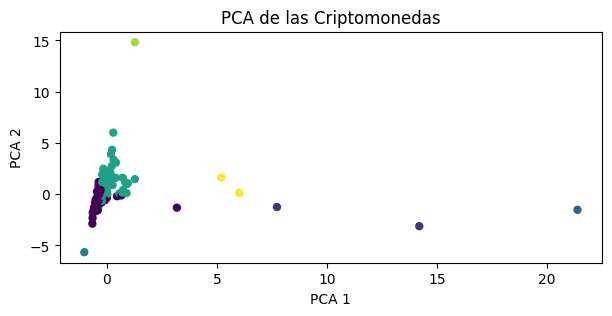

In [173]:
# Visualizar los clusters en un gráfico PCA
fig = plt.figure(figsize = (7,3))
plt.scatter(df_pca['pca1'], df_pca['pca2'], c = df_pca['cluster'], cmap = 'viridis', s= 25)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA de las Criptomonedas')
plt.show()


Cada punto colorido simboliza la posición promedio de las criptomonedas dentro de su respectivo grupo en el espacio reducido de PCA. Se observa que la mayoría de las criptomonedas púrpuras y verdes, están agrupadas cerca del origen, indicando que comparten características más comunes, mientras que las criptomonedas representadas por puntos de otros colores tienen características distintivas que las separan de las demás y entre sí, sugiriendo que poseen características únicas en comparación con el resto, ya sea en términos de volatilidad, capitalización de mercado o factores de precio.

# **4. ANALISIS DE CORRELACIÓN ENTRE COINS**

In [ ]:
# Seteo de cantidad de columnas y filas para mostrar
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [ ]:
# df con el ranking de criptomonedas por capitalización de mercado
df_propiedades_avanzadas.head(2)

In [ ]:
# Obtener una lista de criptomonedas ordenadas por ranking de capitalizacion de mercado
lista_criptomonedas = df_propiedades_avanzadas['id']
lista_criptomonedas = pd.DataFrame(lista_criptomonedas)
lista_criptomonedas = list(lista_criptomonedas['id'])

In [ ]:
# Obtener un dataframe solamente con la columna timestamp (a 365 días), al que se le agregarán columnas de precios de distintas criptomonedas
df = datos_historicos('bitcoin', 365)
precios_criptomonedas = df['timestamp']
precios_criptomonedas = pd.DataFrame(precios_criptomonedas)

In [ ]:
# Agregar columna con los precios de la criptomoneda
for name in lista_criptomonedas:
  try:
    df = datos_historicos(name, 365)
    precios_criptomonedas[f'price_{name}'] = df['price']
    precios_criptomonedas.to_csv('precios_criptomonedas.csv', index=False)

  except Exception as e:
    continue

In [ ]:
precios_criptomonedas.head(2)

Por alguna razón, que hasta el momento de entrega no he podido comprender, el bucle no se ejecuta correctamente siempre. Por lo tanto, realicé el trabajo de manera "manual", obteniendo los precios de un año de 74 criptomonedas y lo guardé en un csv que ya está publicado en la red.

In [ ]:
# Leer csv
df_prices = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSDsizTUwiehVndz21xtYQz2cJe65XW-A0dKGKIA1Ln6_-Bq-xcmarQqNflQ70zw-qJd-komQX6vn-P/pub?gid=568601036&single=true&output=csv')
df_prices

In [ ]:
# Matriz de correlación
cm = df_prices.corr()
plt.figure(figsize=(60, 45))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.show()

Existen 2701 combinaciones de parejas de criptomonedas, sin embargo, solo nos quedaremos con las que tengan una correlación fuerte, es decir, mayor al 90%. Para eso crearemos un bucle for anidado, para que ingrese a la tabla de correlaciones e imprima y grafique, solo las mayores a este porcentaje.

In [ ]:
df_prices

In [ ]:
contador = 0
porcentaje = 0.9
for idx, i in enumerate(cm.columns):
  for j in cm.columns[idx + 1:]:
    if abs(cm[i][j]) >= porcentaje:  # Absoluto para correlación positiva o negativa
      contador += 1
      print(f"{contador}.- La correlación entre {i} y {j} es de un {round((cm[i][j])*100,1)}%.")
      print()
      plt.scatter(df_prices[i], df_prices[j])
      plt.xlabel(i.capitalize())
      plt.ylabel(j.capitalize())
      plt.show()
      print()
      print()


In [ ]:
total_correlaciones = round(((df_prices.shape[1]-1)**2-74)/2,)
print(f'En total, existen {total_correlaciones} correlaciones de menor o mayor fuerza, gracias a estas {df_prices.shape[1]-1} criptomonedas.')
print(f'Solo {contador} de estas correlaciones tienen un porcentaje igual o superior al {round(porcentaje*100,)}%.')
print(f'Esto significa, que solo un {round(contador*100/total_correlaciones,2)}% de estas combinaciones, están "fuertemente correlacionadas".')

# **5. IDENTIFICACIÓN DE FACTORES QUE INFLUYEN EN PRECIOS**

Un factor importante que influye en el precio de esta criptomoneda, es el volumen total de transacciones. Observando patrones históricos, períodos con volumen elevado y creciente, particularmente aquellos con un cambio rápido de color hacia tonos más cálidos, podrían ser indicativos de un inminente aumento de precio. Esto sucede, como con cualquier tipo de activo, que cuando los cambios en la oferta y la demanda aumentan o disminuyen, pueden afectar el precio fuertemente.

Importante hecho, la tasa de emisión de nuevos bitcoins se reduce a la mitad aproximadamente cada cuatro años en un evento conocido como "halving", lo cual ha influido en el precio históricamente. No es ningún secreto que el próximo año el valor del Bitcoin probablemente se mantendrá sostenidamente en una racha alcista.

La percepción pública y el sentimiento hacia Bitcoin pueden causar fluctuaciones de precios significativas. Las noticias positivas pueden llevar a incrementos rápidos, mientras que las noticias negativas pueden causar caídas precipitadas. Las decisiones y políticas de los gobiernos respecto a las criptomonedas, también pueden afectar su adopción y, por ende, su precio. Las regulaciones restrictivas o las prohibiciones pueden disminuir el precio, mientras que las regulaciones favorables o las aclaraciones legales pueden aumentarlo.

Como vimos en el apartado #5, los movimientos de precios de otras criptomonedas también pueden impactar a Bitcoin, como por ejemplo la staked-ether (91.3% de correlación con bitcoin), ethereum (91.2% de correlación con bitcoin), wrapped-bitcoin (100%  de correlación con bitcoin) o rocket-pool-eth (93.3% de correlación con bitcoin). En el mercado de cripto, al menos entre las primeras 100 criptomonedas, existe un pequeño porcentaje de moendas que se correlacionan fuertemente.

Innovaciones tecnológicas, mejoras en la tecnología de blockchain o desarrollos en la escalabilidad y eficiencia de Bitcoin pueden influir en su adopción y precio.

Actividad de grandes inversoresLas compras o ventas significativas por parte de 'ballenas' (grandes tenedores de bitcoins) pueden influir en el mercado debido a su tamaño y al impacto en la liquidez.

A continuación, usaremos uno de los gráficos más potentes para identificar factores que influyen en los precios del bitcoin: Precio vs capitalización de mercado, con burbujas que crecen en relación al tamaño del volumen total de las transacciones. También es muy potente el gráfico de burbujas de tres dimensiones, pero para este apartado nos enfocaremos en el de dos dimensiones.

In [ ]:
# Buscaremos en internet si algunos de los factores descritos anteriormente, se encuentran presentes en las fechas que se registraron ciertos puntos atípicos,
# o en las fechas con mayor volumen de transacciones o con los picos más altos de precios.
fig = px.scatter(df, x="timestamp", y="price", color = 'total_volume', size="total_volume")
fig.show()

## Pick más alto de volumen transaccional y precio del bitcoin en 2019: 27 de junio.

In [ ]:
Image(url = 'https://previews.dropbox.com/p/thumb/ACKBWPI5uK5TW4r56xTzeOUA_aOJgW_E9ADaGdWQsSCIk9EEg9yo14YCQHcweKAT9-s3qr_I3nI-mWPlq_f8hEy0_jJV7dMFUJcaFDsA2T1a9GkiU2iCF3_2YA85ASZkiwCw-fW5bFGWZhG57pSjI0uE5JlNQJy3lPz3Qr6lPpizr_5o_W93ltHwZCl2KMJC4RHDNRrtI_9FOMKKUUUQh5yapp86qOUaeJLjT85KdLN7cc4SbW8c6THNyZ2_NEVwlW8q7wfAq8GsQL-wRC9Mi515D2DsnNyjBUWCqGzIZgDO029Ps-_P5WlC0CHIkMoRT4O8F0sslgQ4ViXUU0nO4Uy1/p.png')

***Resumen de 10 noticias sobre Bitcoin alrededor de la fecha del 27 de junio de 2019***

1.- Incremento en Remesas: El envío de remesas a través de Ripple aumentó en un 80% hacia México y Filipinas desde Estados Unidos y Europa.

2.- Blockchain en México: El gobierno federal de México mostró interés en la implementación de una blockchain pública nacional.

3.- Estafa en México: En Cancún, detienen al fundador de una empresa que ofrecía el token Agrocoin, resultando ser una estafa.

4.- Bitcoin y Turismo en Nicaragua: Aunque el mercado de criptomonedas en Nicaragua es pequeño, el sector turístico utiliza Bitcoin, especialmente en hoteles.

5.- Avances en Panamá: El mercado de criptomonedas en Panamá crece con la instalación de cajeros automáticos y aceptación en varios negocios.

6.- Ley de Criptomonedas en Paraguay: Paraguay espera una ley para regular las criptomonedas y el Banco Central advierte sobre el uso cauteloso de estas.

7.- Minería Ilegal en Paraguay: Se reporta el allanamiento de una granja de minería de criptomonedas que operaba ilegalmente.

8.- Minería y Energía en Paraguay: Mineros proponen aprovechar la represa de Itaipú para operaciones de minería de criptomonedas.

9.- Mercado en Perú: Perú se posiciona como un mercado fuerte en criptomonedas con transacciones significativas en LocalBitcoins.

10.- Casas de Cambio en Perú: Dos casas de cambio físicas en Perú permiten la compra de criptomonedas con moneda fiat.

11.- Libra, la criptomoneda de Facebook, principal motivo detrás de la subida
del bitcoin. La criptomoneda de Facebook que quiere ser el método de pago digital que todos utilicemos a diario con nuestro móvil.

## Uno de los picks más altos de volumen transaccional en 2021: 4 de enero.

In [ ]:
Image(url='https://previews.dropbox.com/p/thumb/ACJnfMwz48f5kc6C8iKnycqA3itSGIxZQOcn-aLTJFh9ua7qRdOYszobCt_um5Wtvl00-uNwqaY8FSPCrcrl3qIwhLVU2dZqcgHyj0Tjg8MMtOcKmawuHiVWc3VKwfstiX153wrl37mZ_L_IhWb7j-JtjjXf_TmlmMulZNmBA17Z4BB5HYflcMiLoOlp6qabg9sTmtwo3VtL5V4ybUZMw0MO7fHSHkQJhMWbGta30lrCtRpIVH1A953h4UMfGgc2Yy_HsXRpUZ6N82F6m3D_3yx70VD_gUf-2fcA1b4l31r_tm4gvhvvgkFHAxA6qW5nJJ176yBPrR8eAg8hRB_YntDw/p.png')

***Resumen de 8 noticias sobre Bitcoin alrededor de la fecha del 4 de enero de 2021:***

1.- Blockstream, importante firma de blockchain con sede en Vancouver, Canadá, comunicó que ha lanzado una billetera de hardware de código abierto, que funciona con baterías, para almacenar bitcoins (BTC) y activos digitales emitidos en Liquid Network, incluidos tokens como el ancla de la moneda estable (USDT). La billetera se llama Blockstream Jade (fuente: Cripto247).

2.- Los programas para pilotar y fomentar la adopción generalizada de la moneda digital del banco central de China, conocida yuan digital, continúan a buen ritmo. Como oferta de Año Nuevo, la ciudad de Shenzhen ofreció a sus residentes la opción de registrarse para participar en una lotería municipal. Los interesados ​​pudieron inscribirse en la lotería utilizando la plataforma de registro de eventos iShenzhen (fuente: Cripto247).

3.- El precio de Ether (ETH), la criptomoneda nativa de la blockchain Ethereum, alcanzó los USD 1161 por primera vez desde enero de 2018. Inmediatamente después de alcanzar un nuevo máximo de tres años, ETH se corrigió por debajo de los USD 900 (fuente: Cripto247).

4.- A medida que Bitcoin continúa registrando máximos históricos por sobre los USD 30.000, el interés de las redes sociales en la moneda digital también está estableciendo nuevos récords en numerosas métricas clave. Datos de Twitter mostraron que el número de cuentas de la red social del pajarito que tuitean sobre Bitcoin ha alcanzado un nuevo máximo histórico, eclipsando una marca de 64.000 vista por última vez durante el pico de 2017 (fuente: Cripto247).

5.- Análisis de Precio de Bitcoin: En enero de 2021, se debatió si el mercado de criptomonedas estaba al final de un rally alcista o si representaba una nueva oportunidad de compra. Bitcoin había alcanzado un máximo histórico de alrededor de 42,000, y en ese momento se negociaba alrededor de $34,500, lo que representaba un aumento del 290% en un año (fuente: Capital.com).

6.- Expectativas de un ETF de Bitcoin: El mercado estaba anticipando la aprobación de un ETF de Bitcoin, lo que contribuía a la subida de precios. Los traders estaban analizando los cambios en el libro de órdenes, observando algunas ventas pero con un volumen relativamente moderado (fuente: Cointelegraph).

7.- El Salvador Planea Hacer de BTC Moneda de Curso Legal: En la conferencia Bitcoin 2021 en Miami, el presidente de El Salvador, Nayib Bukele, anunció planes para hacer de Bitcoin una moneda de curso legal en el país. Esta noticia fue significativa, ya que El Salvador sería la primera nación en tomar tal medida (fuente: CoinMarketCap).

8.- El Impacto de Elon Musk en Bitcoin: Hubo discusiones sobre cómo los comentarios y acciones de Elon Musk afectaban el precio de Bitcoin. Se mencionó que Tesla estaba preparada para reanudar las transacciones de Bitcoin una vez que se confirmara que el 50% de la energía utilizada por los mineros era limpia (fuente: CoinMarketCap).

## El pick más alto de volumen transaccional en 2023: 15 de marzo.

In [ ]:
Image(url = 'https://previews.dropbox.com/p/thumb/ACKjHJE5NMWcVU8WUGowznCAQDFBN_aPSdznB4A6F2XQGss8FT2XZDgoPzXQqxuEGZT9DQ65sQj9qwvmI5Tf1hTSeCaXkUpEMOlmdkYeHs5JrP9uF0B8F37-Azb0UMI6kBu49y-zdC7KiUCKD4w1PF-YeNaYi-Lq_zU1G5KRJGUJAzEl7ReA7G5tegW3mGbcdowrtQq-d8Lqdehb35iCiogNvyui-VKDEftsa3K55cj32iNfODd0EKCStrnbJ0gCWdHgA5FUCcXEHZyUDIDQi4AHKU4curRP3OJjFiS7l7moDf9xiskiAFkyKVd01BdA4LK-SAoRY8n5SHXbTOty3c8T/p.png')

***Resumen de 11 noticias sobre Bitcoin alrededor de la fecha del 4 de enero de 2021:***

1.- El 15 de marzo, los mercados de renta variable de EE. UU. cayeron debido a problemas con Credit Suisse. Bitcoin y algunas altcoins, sin embargo, mantuvieron sus valores cerca de máximos recientes. Credit Suisse enfrentó una caída en sus acciones a mínimos históricos después de revelar debilidades en sus procesos de información financiera. A pesar de la inestabilidad en el mercado de valores, Bitcoin ha mostrado un aumento del 47% en 2023. Algunos analistas ven en Bitcoin un potencial refugio en medio de la crisis bancaria, aunque advierten sobre la incertidumbre en los patrones de inversión (fuente: cointelegraph.com).

2.- Bitcoin: ¿qué pasará con su cotización en 2023? Según el artículo de Sigel, el precio del Bitcoin se mantendrá entre los USD 10.000 y los USD 12.000 durante el primer trimestre de 2023, pero esto marcaría el final de su periodo de descensos. A pesar de ello, el valor del BTC se recuperará hasta llegar hasta tocar los USD 30.000 en el segundo trimestre del próximo año (fuente: Cripto noticias).

3.- En primer lugar, los analistas tienen los ojos puestos sobre el viernes 10 de marzo. Según determinó la justicia, desde esta fecha podría iniciar la devolución de los 140.000 bitcoins a los usuarios de Mt. Gox, el exchange que quebró en 2014 (fuente: Criptonoticias.com).

4.- A su vez, el 10 de marzo también se prevé que Estados Unidos anuncie los datos de empleo que tendrá un impacto en su economía nacional. Además, el 14 y 15 de marzo el gobierno de la potencia americana publicará el índice de precios del consumidor y la producción (CPI y PPI). «Eso básicamente nos mostrará en qué situación está la inflación en el país», comentó Bureau, para agregar: «Si ha vuelto a subir, no van a ser buenas noticias» (fuente: Criptonoticias.com).

5.- Sumado a ello, el 22 de marzo será la reunión de la Fed (Reserva Federal de Estados Unidos) para decidir qué tanto aumentarán las tasas de interés. El aumento «será probablemente de 25 puntos», pero si es de 50 puntos «va a ser salvaje», señaló Bureau (fuente: Criptonoticias.com).

6.- Asimismo, Deutscher mencionó que el mercado de las criptomonedas «no existe en el vacío». «Las condiciones macroeconómicas han sido el motor detrás de la mayoría de los precios de las criptomonedas durante años», expresó por lo que recomendó estar atento a los datos de inflación del 14 de marzo «que influirán en la decisión de la Fed el día 22» (fuente: Criptonoticias.com).

7.- El analista Michaël van de Poppe también coincidió en que los aumentos de la Fed y el desbloqueo de bitcoins de Mt. Gox son de los eventos más importantes de marzo para el mercado. Y, agregó, que a ello se suma la posible quiebra de la filial de Silvergate Bank, el banco de origen estadounidense que ofrece servicios financieros con criptomonedas (fuente: Criptonoticias.com).

8.- Nuevo máximo de 2023: los datos del IPC impulsan el precio de BTC por encima de USD 26,000. Bitcoin experimenta un nuevo despegue importante gracias a que las cifras del IPC se ajustan a las expectativas, lo que reduce las posibilidades de que la Fed endurezca las condiciones financieras. Bitcoin superó los USD 26,000 el 14 de marzo, cuando los datos del Índice de Precios al Consumo (IPC) de Estados Unidos mostraron señales de inflación mixtas (fuente: cointelegraph.com).

9.- Otro contexto que puede dar luces sobre este mes de marzo es el hecho de que estamos en el año previo a un nuevo halving en Bitcoin. Al tratarse de un evento considerado muy influyente para el mercado, vale la pena prestarle atención, como han apuntado diversos analistas recientemente. El marzo de 2019, año previo al tercer halving en la historia de bitcoin, la criptomoneda subió poco más de 7%. Pero en la oportunidad previa, durante el mes de marzo de 2015, BTC cerró marzo en rojo. La salvedad es que eso ocurrió durante la seguidilla de 5 marzos negativos y el de 2015 fue el de menor caída: poco más de 4%. Al momento de redacción de este artículo, bitcoin ha subido cerca de 2,5% este miércoles que da inicio a marzo de 2023. Hasta ahora, BTC acumula más de 40% de apreciación durante el año. Analistas y traders ya han augurado que este 2023 bitcoin se recuperará tras el largo mercado bajista que inició a finales de 2021. Por ahora, el mercado parece estar cumpliendo esos pronósticos (fuente: Criptonoticias.com).

10.- Además de los temores por las tasas de interés, la noche del miércoles fue testigo del colapso del banco de criptomonedas Silvergate Bank. Ese mismo día, el Departamento de Justicia de Estados Unidos movió 49.000 bitcoins incautados del marketplace de la darknet Silk Road a nuevas direcciones, lo que indicó que el gobierno podría estar interesado en vender pronto semejante suma. “Silvergate es uno de los tantos factores que están poniendo a prueba a bitcoin”, escribió Joe DiPasquale, CEO del administrador del fondo de criptomonedas BitBull Capital, en un email para CoinDesk. “Además de Silvergate, hay temor en el mercado por más subas en las tasas de interés por parte del FOMC y el debilitamiento en los precios del mercado de valores. La SEC también está mostrando un mayor escrutinio de las criptomonedas. En conjunto, el mercado siguió endureciéndose y volviendo a probar niveles de soporte”. DiPasquale agregó: “Tal como hemos dicho desde enero, creemos que probará su nivel de soporte por debajo de US20K antes de volver a subir. Consideramos que US18K será el próximo nivel importante”. (fuente: coindesk.com).

11.- Bitcoin arrancó el presente curso cotizando en los 16.814 dólares y, solo tres meses después, ha rebasado la barrera de los 28.000 dólares. Una subida superior al 70% que han hecho que la capitalización de la divisa vuelva a superar los 540.000 millones de dólares. La criptomoneda es la clase de activos con mejores resultados del mundo, por undécima vez en sus 14 años de existencia. Un rally que no está siendo tan fuerte en el resto de las divisas. Aunque, Ethereum ha dibujado un escenario similar pasando de los 1.100 dólares a los 1.800 dólares y recuperando los 220.000 millones de capitalización (fuente: dirigentesdigital.com).

# **6. DETECCIÓN DE OUTLIERS Y COMPORTAMIENTOS ANÓMALOS**

Este punto se estudió en el apartado 2.2.3 dentro del análisis exploratorio de datos (EDA) y en el punto 5. identificación de factores que influyen en precios.

#**7. CONCLUSIÓN**

Ya finalizado el proyecto, se puede ver en él un enfoque analítico robusto y meticuloso para la predicción del precio de Bitcoin, además de poder replicar el análisis, incluso los algoritmos de machine learning para cualquier otra criptomoneda que desees, gracias a la automatización del código, de principio a fin.

Apliqué métodos estadísticos avanzados, como EDA y modelos de Machine Learning para análisis de series temporales, como ARIMA y Prophet. A través de un examen detallado de las series temporales, he identificado patrones y tendencias significativas que subyacen en la volatilidad histórica de Bitcoin. Con un modelo ARIMA ajustado que ha alcanzado un R2 de aproximadamente 0.986, he logrado un ajuste predictivo notablemente preciso para un conjunto de datos específico.

Pero lo mejor, es en realidad, la posibilidad de ir jugando con la elección de la cantidad de días que tendrá el dataframe y la criptomoneda que prefieras analizar.

Por otra parte, al implementar gráficos de dispersión interactivos de Plotly, hemos enriquecido la capacidad del análisis exploratorio, permitiendo un entendimiento más profundo de las relaciones dinámicas entre precio, volumen de trading y capitalización de mercado, permitiendo acceder a datos muy específicos, si como yo, eres una persona que gusta curiosear entre el dinamismo de esta herramienta.

En general, las visualizaciones generadas no buscan sorprender al lector por sus particularidades, sino que han buscado proporcionar con claridad y comprensión la evaluación de información proporcionada por la API de Coingecko y las inferencias extraídas han sido cruciales para la formulación de estrategias de predicción. La implementación de estos modelos y herramientas en Python ha demostrado ser un activo valioso, ofreciendo una base sólida para tomar decisiones informadas y basadas en datos en el ámbito del trading de criptomonedas.

Mirando hacia el futuro, es evidente que los modelos y técnicas empleados ofrecen un gran potencial para prever la dirección del mercado de Bitcoin y otras criptomonedas. Sin embargo, debemos ser conscientes de la naturaleza intrínsecamente impredecible de este mercado, influenciado por factores económicos, regulatorios y tecnológicos en constante cambio. Por lo tanto, cualquier predicción debe ser tomada con cautela, validada continuamente con datos nuevos y ajustada según sea necesario para reflejar el paisaje cambiante de las criptomonedas.

Este proyecto sienta las bases para un monitoreo continuo, un análisis reflexivo y escalable, manteniendo siempre la rigurosidad y el escepticismo saludable y crucial, para ser exitoso en el campo de la predicción de las criptomonedas.

<div align="center">
    <img src="https://previews.dropbox.com/p/thumb/ACJYj_vJ-JQ0VMImJLiQ9ikZkhavh-gi4drC8x9kvaZ4NfgRAxFwaSHCMzWZGYs3NBwpoINy0wuhG9UeLyYA-VuaY1pnAUK8_7Eb3wokByfyEwmO4rjXKksY3CVC9tsi7vHBpXWHcFie0fDRZbUoT-Vb6wfD2NWVumwT50tF5HLiryLAHZVwVEZpRHLRTpCBvdoeqOtquhCgPlMH1fPYiS-0k723fwJyJ5nKqOfxt_Ai72z_Wx1jEQhf3h-CIqgRvJ0X5uL6DOmXb_Jdbwwgnuqhfs7OdwsrGWN-1ZrOmzZ0bEH9khch8BKGDaZZd-njnKMwG-wuuCDYsur2Zvhh9mpM/p.png" alt="criptomonedas"  width="400">
    
</div>

<div align="center">
<h5><b></b></h5><br>
</div>

<div align="center">
<h1><b>ANÁLISIS DE CRIPTOMONEDAS</b></h1><br>
<h5>PRUEBA TÉCNICA - DATA SCIENTIST</h1>
<h5><b>MYWACC</b></h5><br>
</div>


